<font face='Ubuntu' size = 4>

## Test Gradients
Calcualte the gradients of images

In [63]:
a = np.eye(5)
m = np.linspace(20, 0, 5)
n = np.linspace(0, 20, 5)
grid = np.meshgrid(m, n)
a = grid[0]
b = grid[1]
print("The a is \n", a)
#filter_kernal = 

sobelx=cv2.Sobel(a, cv2.CV_64F, dx=1, dy=0)
print("The sobelx is \n", sobelx)
sobely=cv2.Sobel(a, cv2.CV_64F, dx=0, dy=1)
print("The sobely is \n", sobely)
gradient = np.arctan2(sobely, sobelx) * 180 / np.pi
print("The gradient is \n", gradient)

print("---" * 10)
print("The a is \n", b)
sobelx=cv2.Sobel(b, cv2.CV_64F, dx=1, dy=0)
print("The sobelx is \n", sobelx)
sobely=cv2.Sobel(b, cv2.CV_64F, dx=0, dy=1)
print("The sobely is \n", sobely)
gradient = np.arctan2(sobely, sobelx) * 180 / np.pi
print("The gradient is \n", gradient)

a = np.linspace(-1, 1, 3)
a = np.meshgrid(a, a)
gradient = np.arctan2(a[1], a[0]) * 180 / np.pi
print(a[0])
print(a[1])
print(gradient)

The a is 
 [[20. 15. 10.  5.  0.]
 [20. 15. 10.  5.  0.]
 [20. 15. 10.  5.  0.]
 [20. 15. 10.  5.  0.]
 [20. 15. 10.  5.  0.]]
The sobelx is 
 [[  0. -40. -40. -40.   0.]
 [  0. -40. -40. -40.   0.]
 [  0. -40. -40. -40.   0.]
 [  0. -40. -40. -40.   0.]
 [  0. -40. -40. -40.   0.]]
The sobely is 
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
The gradient is 
 [[  0. 180. 180. 180.   0.]
 [  0. 180. 180. 180.   0.]
 [  0. 180. 180. 180.   0.]
 [  0. 180. 180. 180.   0.]
 [  0. 180. 180. 180.   0.]]
------------------------------
The a is 
 [[ 0.  0.  0.  0.  0.]
 [ 5.  5.  5.  5.  5.]
 [10. 10. 10. 10. 10.]
 [15. 15. 15. 15. 15.]
 [20. 20. 20. 20. 20.]]
The sobelx is 
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
The sobely is 
 [[ 0.  0.  0.  0.  0.]
 [40. 40. 40. 40. 40.]
 [40. 40. 40. 40. 40.]
 [40. 40. 40. 40. 40.]
 [ 0.  0.  0.  0.  0.]]
The gradient is 
 [[ 0.  0.  0.  0.  0.]
 [90. 90. 90

[[ 0.     0.     0.    ...  0.     0.     0.   ]
 [90.     0.    15.266 ... 21.23  28.94  90.   ]
 [90.    45.     0.    ... 26.48  48.6   90.   ]
 ...
 [90.    26.56  81.94  ... 13.39  28.5   90.   ]
 [90.    53.78  55.53  ...  2.246 21.61  90.   ]
 [ 0.     0.     0.    ...  0.     0.     0.   ]]


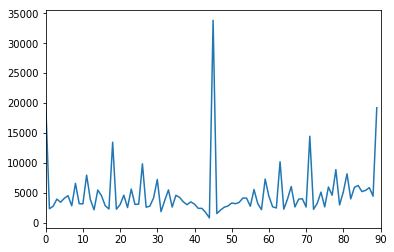

In [43]:
img = np.eye(5)

sobelx=cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0)
print(sobelx)
sobelx=cv2.convertScaleAbs(sobelx)
sobely=cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1)
sobely=cv2.convertScaleAbs(sobely)
gradient = np.arctan2(sobely, sobelx) * 180 / np.pi
print(gradient)

num_bins = 36
hist, bins = np.histogram(gradient.ravel(), 90, [0, 90])

plt.plot(hist)
plt.xlim([0, 90])
plt.show()

<font face='Ubuntu' size = 4>

## Histogram Calculation
Calculate the histogram of images

The version of opencv is 3.4.2
739.5
(array([731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743,
       744, 745, 746, 747, 748]),)
5.0


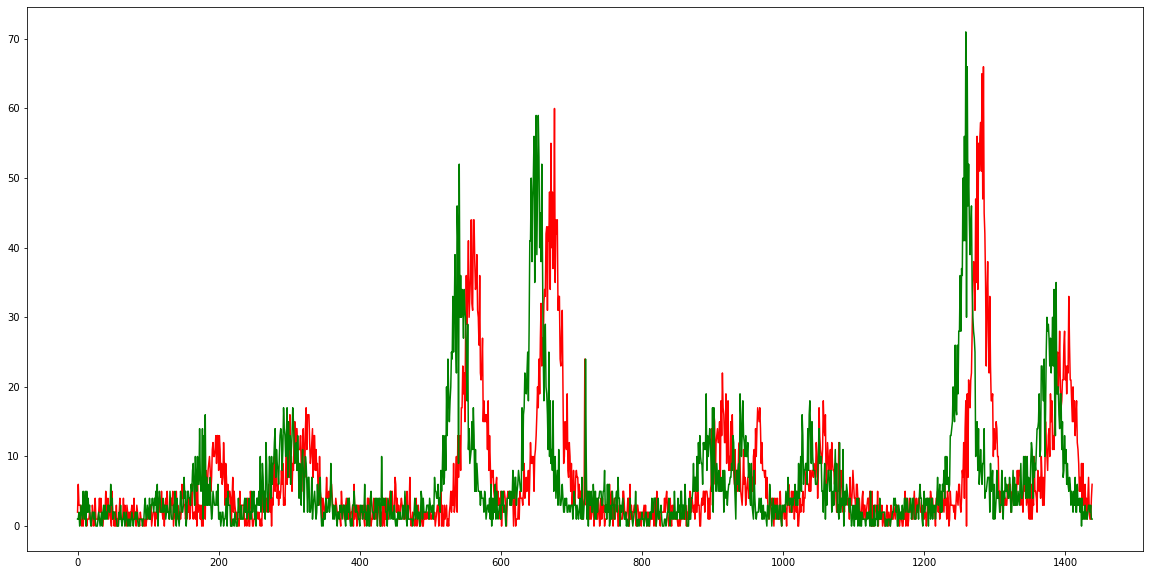

In [153]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from Utils_plot import plot_hist

print("The version of opencv is", cv2.__version__)
np.set_printoptions(suppress=True)

def HoG_cal(img, mag_thres = 50, bin_num = 360):
    '''
    Calculation the histogram of gradients direction
    '''
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Cal the magnitude and angle of Gradients
    sobelx=cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0)
    sobely=cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1)
    gradient = np.arctan2(sobely, sobelx) * 180 / np.pi
    magnitude = np.sqrt(sobelx ** 2 + sobely ** 2)

    # Set one Threshold which discard the low identity gradient
    mag_thres = magnitude.max() / 5
    gradient = (magnitude > mag_thres) * gradient
    gradient = (gradient < 0) * 360 + gradient
    hist, bins = np.histogram(gradient, bin_num)
    hist = hist[1:]
    
    return hist

img = cv2.imread('figures/img_clip.jpg')
img_rotate = cv2.imread('figures/img_clip_5.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rotate = cv2.cvtColor(img_rotate, cv2.COLOR_BGR2GRAY)

bin_num = 1440

hist = HoG_cal(img, bin_num= bin_num)
hist_r = HoG_cal(img_rotate, bin_num= bin_num)
correlation = np.correlate(hist, hist_r, mode= 'same')
angle = (np.argmax(correlation) + 1) * 360 / bin_num - 180
angle_thres = np.max(correlation) * 0.9
results = np.nonzero(correlation > angle_thres)

print(np.nonzero(correlation > angle_thres))
print(angle)
plt.figure(figsize=(20, 10))
plt.plot(hist, 'r')
plt.plot(hist_r, 'g')
plt.show()

<font face='Ubuntu' size = 4>

## Calculation the translation variable

821.793161324673
[148958  12702   5283   3247   2418   2003   1447    827    601    438
    333    321    321    304    293    322    125     43     10      4]
[  0.          41.08965807  82.17931613 123.2689742  164.35863226
 205.44829033 246.5379484  287.62760646 328.71726453 369.8069226
 410.89658066 451.98623873 493.07589679 534.16555486 575.25521293
 616.34487099 657.43452906 698.52418713 739.61384519 780.70350326
 821.79316132]


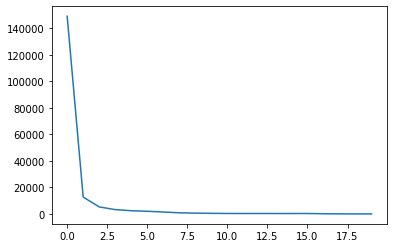

784.0841791542538
[148468  12779   5647   3746   2674   1779   1182    761    575    398
    432    379    320    244    255    236     88     26     10      1]
[  0.          39.20420896  78.40841792 117.61262687 156.81683583
 196.02104479 235.22525375 274.4294627  313.63367166 352.83788062
 392.04208958 431.24629853 470.45050749 509.65471645 548.85892541
 588.06313437 627.26734332 666.47155228 705.67576124 744.8799702
 784.08417915]


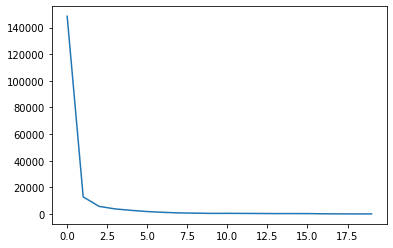

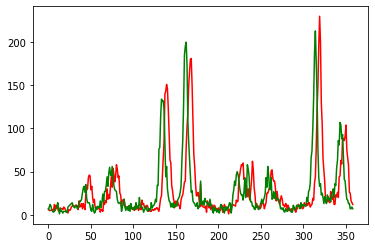

359
[2825.65329513 2832.14       2835.68376068 2803.51136364 2749.71954674
 2664.72316384 2540.09859155 2369.60674157 2159.03641457 1890.61731844
 1558.32033426 1200.94134078  822.85434174  468.49719101  199.03380282
   73.67231638  138.12747875  346.21875     682.0997151  1058.28285714
 1449.10888252]
15


5.0

In [71]:
def angle_HoG(base_HoG, rotate_HoG, limits = 10):
    '''
    Calculation the translation value of two hists
    '''
    m = base_HoG.shape[0]
    print(m)
    prop = 360 / (m + 1)
    
    index_limit = limits * (m + 1) // 360
    
    error = np.array([])
    for i in range(-index_limit, index_limit + 1):
        base_begin = max(0, i)
        base_end = min(m, m + i)

        rotate_begin = max(0, -i)
        rotate_end = min(m, m - i)

        base_line = base_HoG[base_begin:base_end]
        rotate_line = rotate_HoG[rotate_begin:rotate_end]

        error = np.append(error, np.mean((base_line - rotate_line) **2))

    print(error)
    print(np.argmin(error))
    prop = 360 / (m + 1)
    angle = prop * np.argmin(error) - limits
    
    return angle

hist = HoG_cal(img, bin_num= 360)
hist_r = HoG_cal(img_rotate, bin_num=360)
plt.plot(hist, 'r')
plt.plot(hist_r, 'g')
plt.show()
angle_HoG(hist, hist_r)

<font face='Ubuntu' size = 4>

## Correlation about the histogram

--------------------------------------------------


<Figure size 1440x720 with 0 Axes>

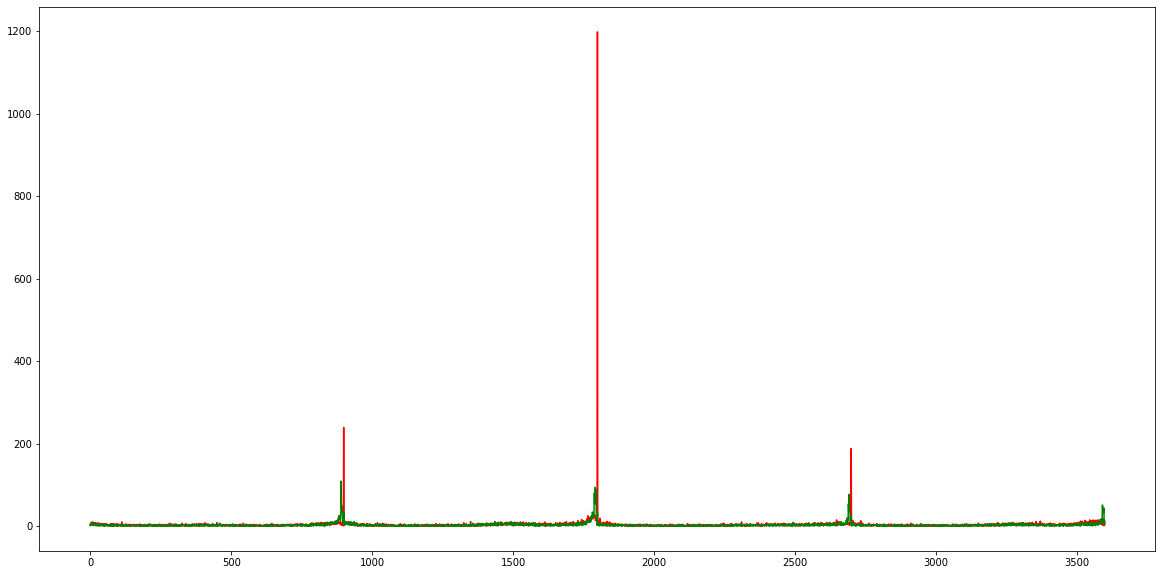

3599
[482.32908089 484.64057971 483.37032744 483.37224797 482.35794961
 482.29502027 482.14819103 481.5865162  482.64448944 482.43984962
 480.80948251 480.33468208 480.97515169 481.04881571 480.91683511
 480.39982679 481.68658009 481.85574149 481.21892126 480.32468281
 480.1464399  479.2648415  479.82224143 478.12010369 479.57731068
 479.50518135 477.88374101 479.04746835 478.63589301 479.21937895
 477.06726071 477.19798851 475.65699512 477.1743251  476.97817973
 477.13174512 475.6286944  477.08577166 474.2988242  476.54329128
 475.74921181 476.8530086  475.99627614 476.54266896 474.26309762
 474.63594734 473.77195994 474.01773455 473.63854733 473.0920526
 473.44298371 473.12828571 474.11682376 473.34151913 472.68969455
 470.92151826 472.02453638 471.91015402 470.97462218 471.39025086
 470.85465945 472.07407407 471.19709484 470.36247153 471.61685169
 471.74388162 470.05547653 468.05091013 470.35456355 467.64951677
 468.38135834 468.08380682 468.51036637 468.95797842 469.21402214
 468.4

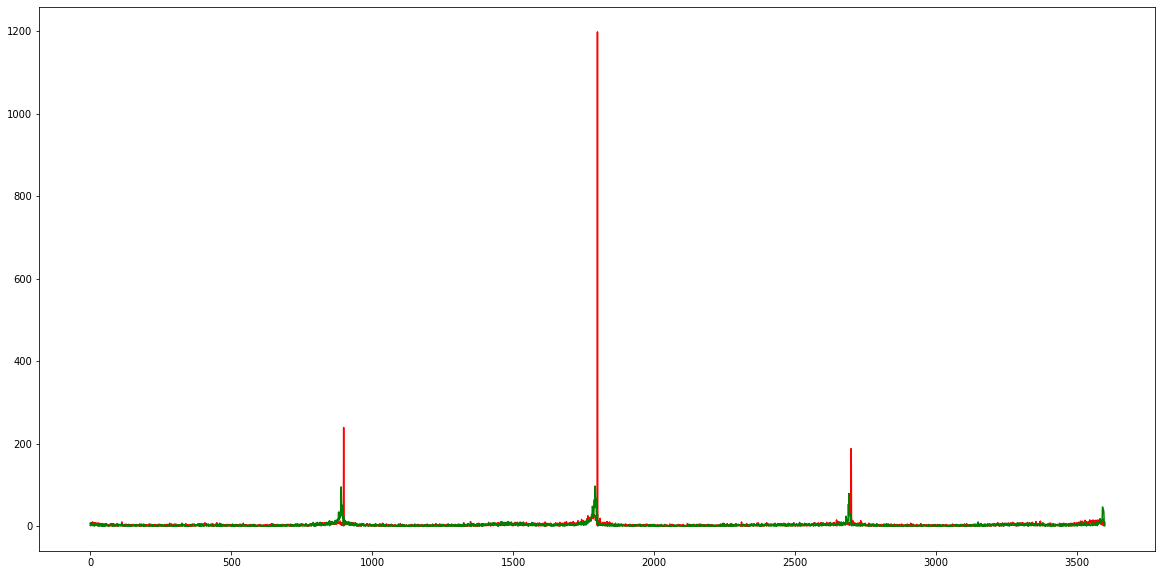

3599
[481.16410554 481.05072464 479.41118516 480.46784473 479.98291341
 480.46409959 480.35745297 480.5859375  478.78275962 478.90312319
 479.39259902 478.55231214 478.76971973 479.22183709 477.9309847
 478.81148961 478.9950938  477.26716676 479.25122584 477.26585928
 477.2049582  477.08299712 476.42235667 477.55270737 478.31183415
 476.42227979 477.38820144 476.63550058 476.76243888 475.92524439
 476.25812015 476.02183908 475.28813559 473.98535325 473.49612403
 476.33094145 474.83443329 474.5659782  474.93662174 474.06909404
 474.17225566 473.31604585 473.39530221 473.2720504  472.92241626
 472.40412135 472.5713877  472.06006865 471.74978553 471.99199543
 472.3732495  471.392      470.3758926  470.4363221  470.86925492
 470.54252283 469.90870185 470.18568169 469.06244654 469.6949829
 469.70133941 468.86666667 470.4166904  468.87101367 469.03899801
 466.11866818 466.38776671 466.04891923 467.51833949 468.00824332
 467.51435067 467.96221591 466.6861687  467.50255537 466.02639796
 466.41

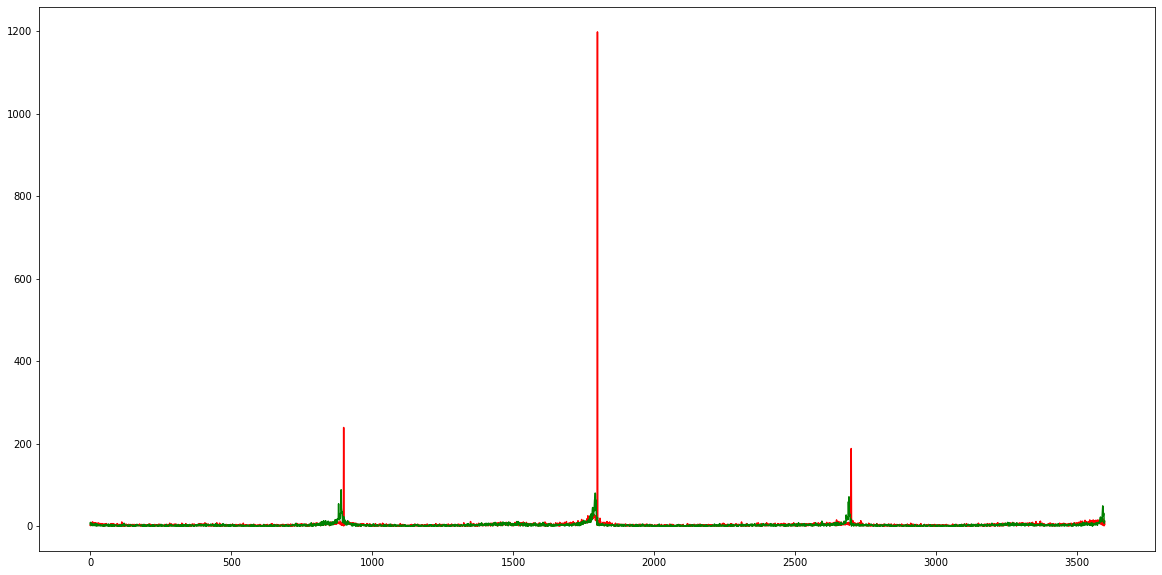

3599
[478.5700203  478.96811594 478.87945523 477.90556199 478.67130032
 478.32281413 477.01678726 478.81336806 475.59357825 478.05205321
 477.73171437 475.83323699 476.30626986 477.29953784 474.69939359
 476.26645497 476.60894661 475.33698788 476.14969714 475.98125721
 475.73508216 474.75878963 475.03630078 473.83726959 475.21854305
 474.9666091  474.71107914 471.74453395 473.86741444 473.74554342
 473.12647312 472.27241379 471.82907211 472.53589891 472.52512202
 473.19402985 471.58106169 473.23866896 471.8603384  471.47075688
 470.99598739 471.38194842 470.12002292 469.7591638  469.83194961
 469.16599886 468.87553648 469.72654462 468.61853017 469.56689537
 469.96227494 468.89314286 468.05341331 468.5759566  468.43876677
 467.64583333 466.14179743 468.14746149 466.31565441 466.97006842
 467.5337703  467.83304843 467.25633723 464.22351936 465.12581839
 467.05663062 465.95846373 466.10324232 463.38129087 464.96304719
 464.70332481 465.30482955 464.53308719 463.82282794 464.95032643
 463.

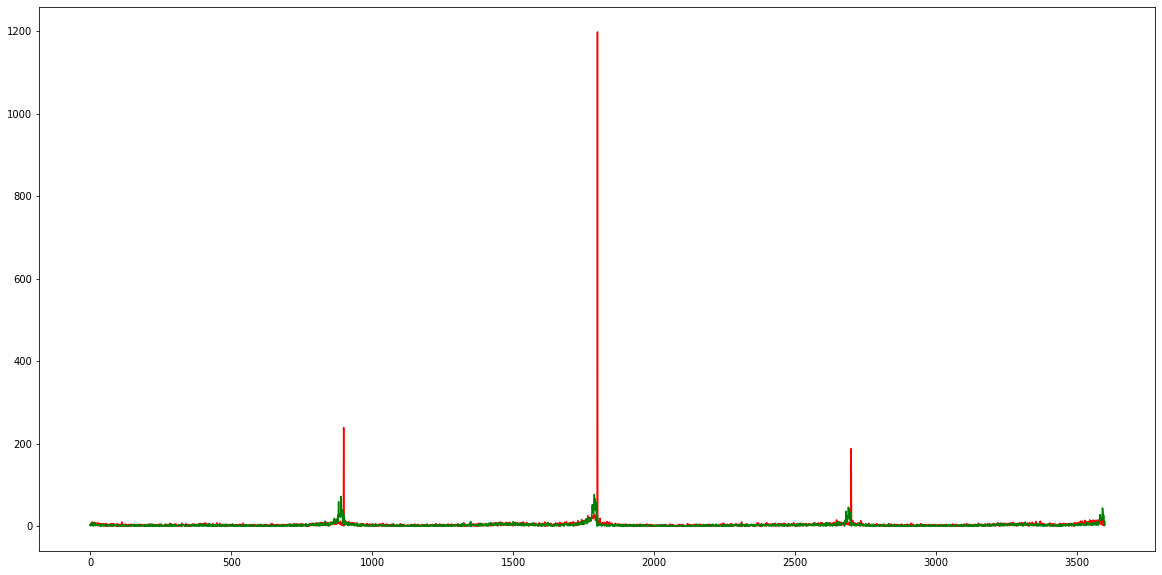

3599
[477.36967237 475.79072464 477.51811069 475.72827346 475.39386041
 475.35610886 475.5829233  474.1099537  475.98177611 474.04887218
 475.87597572 474.26589595 474.65125686 474.86106297 473.89893156
 474.0317552  473.52525253 474.22908252 472.44591866 472.87226067
 474.15566446 470.72305476 470.80207433 473.49395161 472.04578174
 472.61715602 471.19913669 470.70051784 471.79292494 472.53162737
 471.73124461 472.11551724 470.07526573 470.74468696 470.81739879
 469.23191734 469.70301291 469.1087206  469.71006596 468.55733945
 468.92433362 469.79713467 468.5084503  469.16838488 466.63985113
 468.00686892 468.24062947 466.57808924 467.11495568 467.73098914
 466.47299228 466.75714286 466.10511282 467.40719589 467.09534685
 466.68521689 465.09529244 465.14061609 463.57542059 466.17103763
 464.78483899 465.78717949 464.85075477 464.27505695 463.92371193
 465.16676153 462.11152205 463.53924915 464.25135058 463.47470153
 463.16766127 462.90426136 463.41408691 461.94264622 461.5787681
 461.9

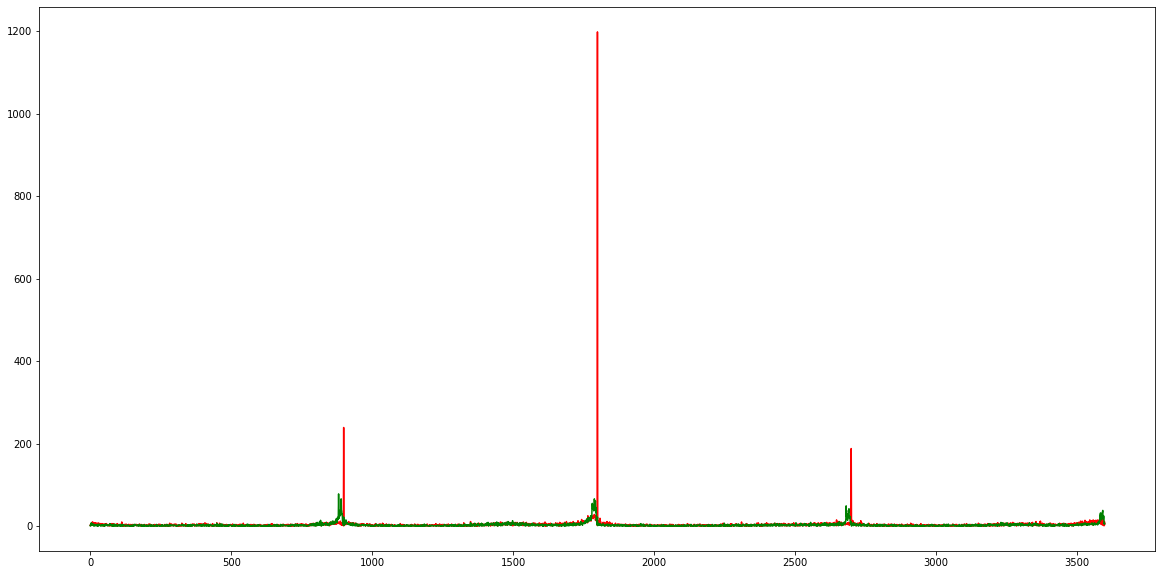

3599
[476.87184691 476.53188406 476.58910461 476.76767092 476.53518679
 476.99015634 476.54037627 474.43836806 476.38154469 475.16657027
 475.50563747 476.10375723 474.02195897 474.66233391 472.97054577
 474.2289261  473.8037518  473.68782458 472.79550043 473.91983852
 472.32199481 474.33746398 473.56986459 473.22292627 471.48977829
 472.35031664 471.47827338 471.87284235 471.53120506 472.32489937
 471.52716298 472.39568966 470.22866992 470.81820793 469.75509618
 471.69517796 470.73974175 470.93201377 470.49039289 469.36725917
 470.94181714 470.47421203 469.57547981 470.20962199 469.73575723
 467.52547224 468.81688126 469.37900458 467.26022305 467.67695826
 468.32609317 467.80485714 466.00628392 466.85436893 466.05195547
 465.96347032 465.65363766 464.24786081 466.51297405 465.87400228
 464.43516671 465.21509972 463.95300484 465.58285877 465.75747225
 463.38958452 463.07596017 462.12400455 463.5894228  462.64297897
 461.86246093 463.89715909 464.24027265 463.43611584 462.62077775
 462.

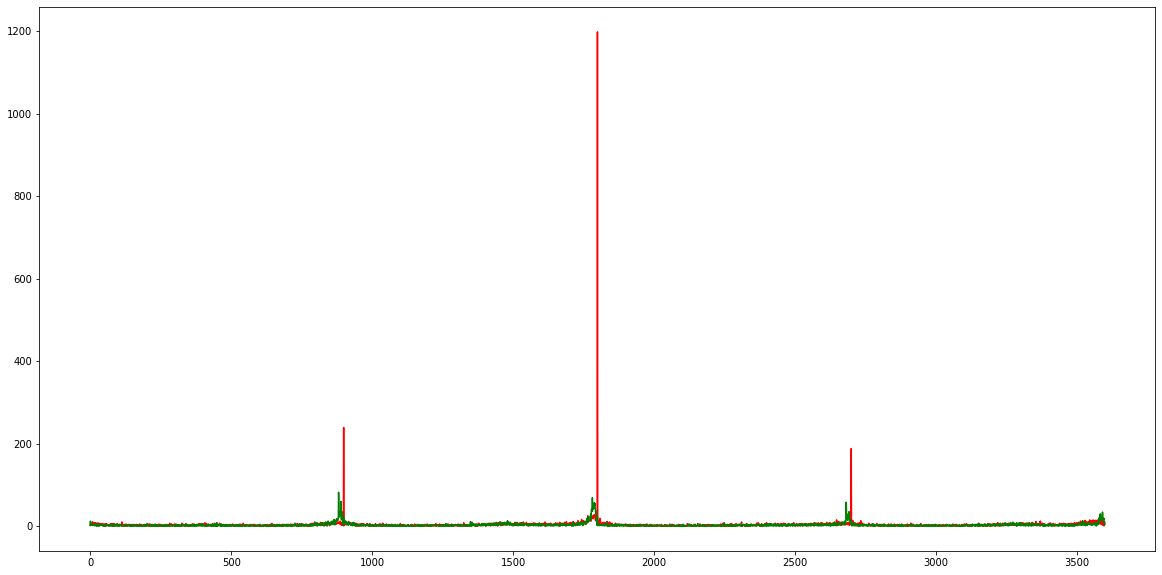

3599
[475.39025805 473.98086957 475.70414373 475.20307068 474.98436142
 473.70121598 473.80752533 475.29311343 473.25744865 474.51330249
 473.78808904 474.40028902 473.06732158 471.75852109 472.98498412
 473.38423788 472.91486291 472.77091748 471.83357369 472.15397924
 472.21072355 472.37348703 471.70411985 469.82315668 471.51914771
 471.16493955 471.13956835 471.20828539 471.27236123 470.43415756
 469.83558494 470.19310345 469.85033036 469.85554279 469.83921906
 470.01205511 468.19713056 467.20109007 469.1732148  467.66313073
 467.6787045  468.94985673 466.27012317 466.07560137 467.40709991
 467.45878649 467.21402003 466.04805492 464.05061481 465.56174957
 465.1546156  464.59428571 464.753499   465.10422616 464.88723951
 464.53396119 463.44393723 464.35396463 462.76760764 464.5436146
 463.63522371 463.52108262 463.26060951 463.37927107 461.1403359
 463.15537849 462.09473684 462.34158134 461.23201592 459.7120523
 462.29667519 461.18153409 462.65634763 459.39097104 459.98013057
 459.983

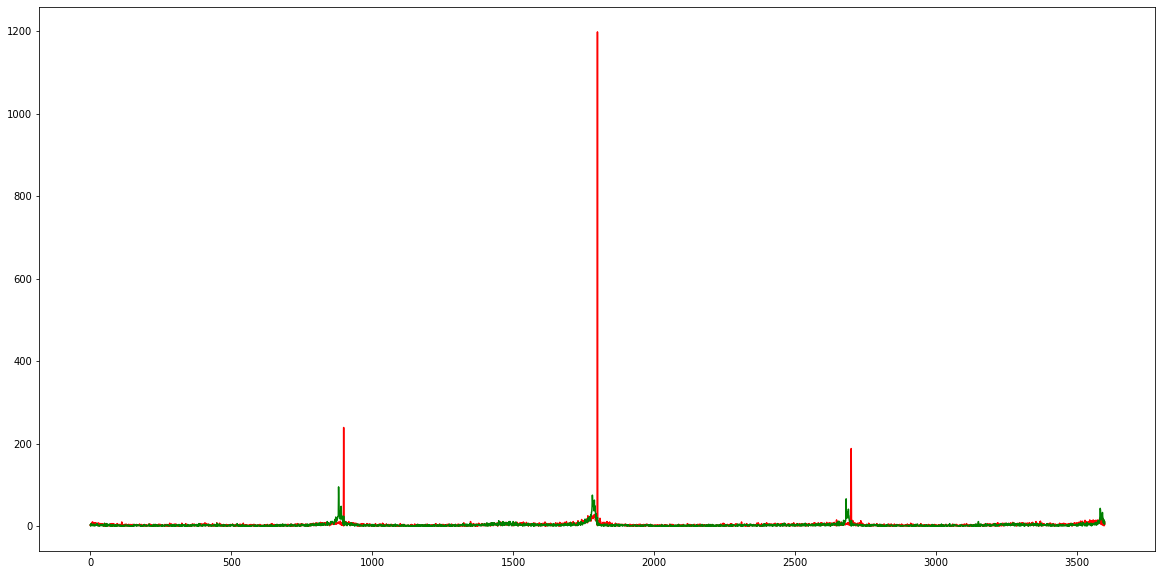

3599
[477.67178892 477.94927536 478.07823819 477.79837775 477.19374457
 476.37232195 476.13806078 475.39409722 475.18744576 476.4291498
 475.15755999 475.48468208 474.97052875 475.29116118 475.95697372
 474.33718245 473.40981241 472.81765724 473.38390539 473.21222607
 474.00317094 472.76253602 474.03889369 473.34130184 473.39130435
 471.85146805 472.3781295  472.31760644 473.11015243 473.08338125
 471.57832711 472.10574713 471.75610457 471.31533601 471.97128912
 471.97359357 471.3492109  470.72375215 470.32893605 470.15997706
 469.34508455 470.36876791 468.51904898 470.60280641 468.22273118
 468.78677733 468.65894134 467.60354691 468.72204747 466.95025729
 466.73506716 465.892      466.28191945 465.31981725 466.97944619
 466.70291096 466.17689016 465.02281803 465.38722555 465.06870011
 465.31404959 465.86239316 465.89888921 463.16628702 464.26530031
 464.14826409 463.44352774 463.55432309 463.42621552 462.18902786
 463.9658994  463.840625   463.51860267 463.64139693 460.76951462
 463.1

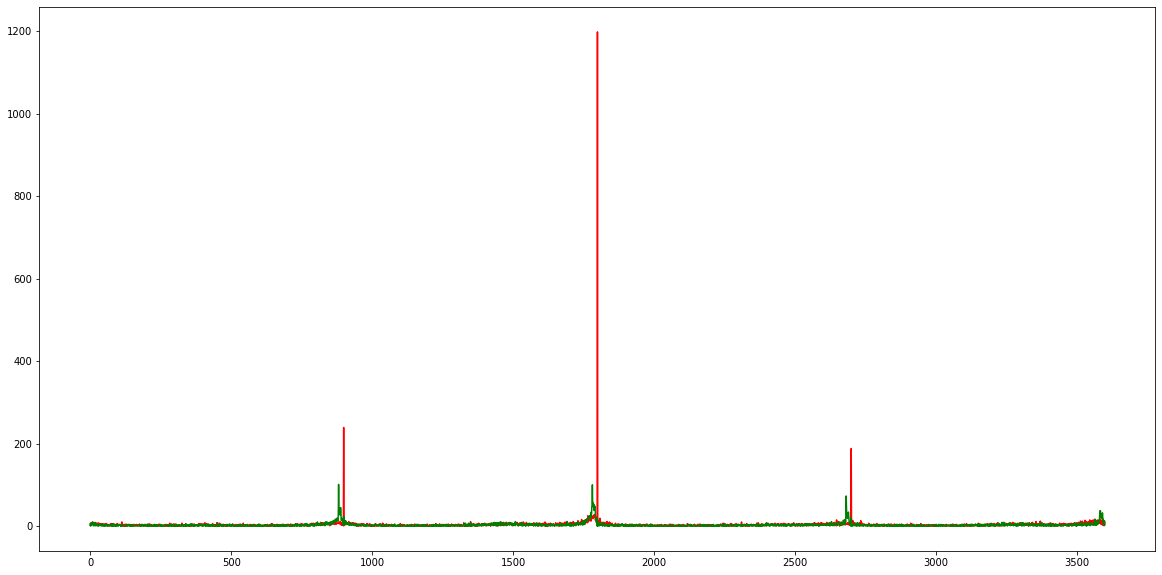

3599
[477.33314004 479.12202899 478.06780643 476.75       477.36055604
 479.36537348 477.26628075 478.50289352 477.32976569 477.71023713
 478.08239376 477.4517341  476.3646345  474.97689197 476.70199249
 476.02020785 477.11601732 475.51731102 475.65676377 475.15253749
 475.37907178 474.58386167 474.93632959 475.10599078 474.45695364
 474.0771445  475.30705036 474.16944764 471.52976704 474.64778608
 472.63236562 473.4158046  473.65670784 472.80040207 473.89606661
 473.43427095 470.38938307 473.20654045 472.07714368 472.98881881
 471.44167383 472.14527221 471.35892294 471.66523482 470.76209562
 471.99914139 471.52532189 468.47597254 470.85530455 469.40966266
 469.30322949 470.06971429 469.68494716 469.6022273  469.87667713
 468.28652968 468.64593438 466.91186537 468.55631594 468.13112885
 466.97805643 467.53960114 464.73939049 463.6953303  466.02391119
 466.69123506 465.60739687 466.70022753 465.88171737 465.48607163
 464.96845695 466.16590909 463.8193695  465.11868257 465.17002555
 463.

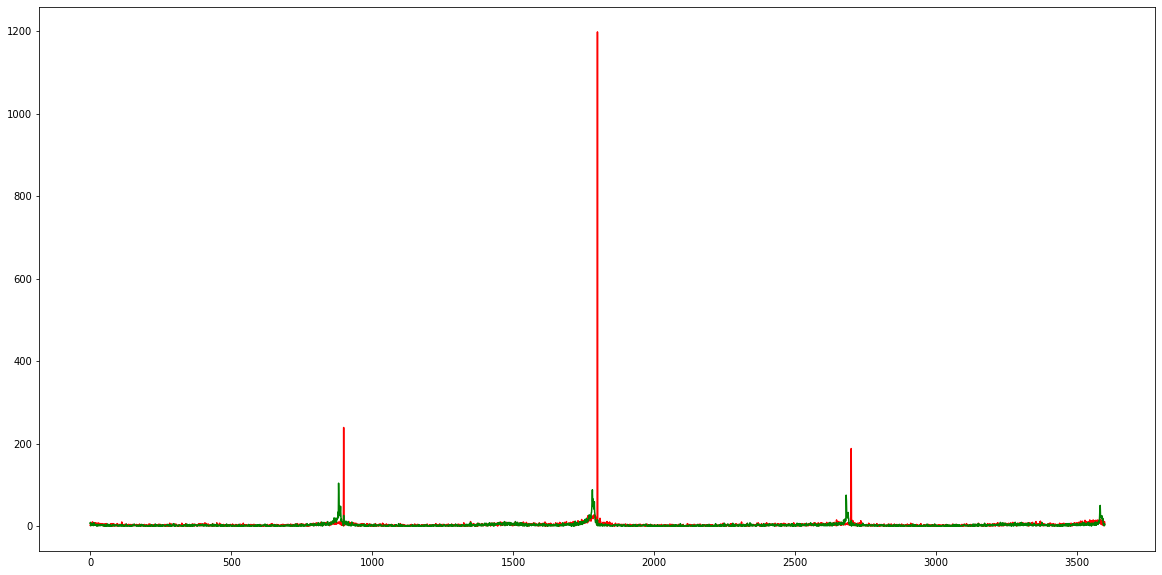

3599
[480.23514062 479.35391304 480.36887859 480.23319815 478.76657979
 479.82136653 478.31259045 479.65943287 480.19380966 479.6231926
 480.04452154 479.06560694 479.35192141 478.02253033 478.64828184
 478.57505774 475.9965368  478.28938257 478.32823767 476.83448674
 477.25944076 476.19827089 475.39412273 475.25115207 477.46847106
 475.94185377 476.80546763 476.65880322 475.75841242 475.65698677
 475.43029606 476.16637931 475.19879345 475.56232051 474.70743612
 474.8771527  473.7492109  474.53126793 473.7863493  473.79759174
 474.42333047 472.88567335 472.84073331 470.76632302 472.37703979
 472.52690326 473.15479256 473.07437071 472.58021161 472.51457976
 471.89854244 470.52342857 470.00114253 471.50314106 470.93919498
 469.62642694 467.54265335 468.58043354 468.71400057 470.09720639
 468.75719578 467.84501425 468.64454571 469.33627563 467.6313692
 468.41206602 467.31180654 468.47468714 466.989764   466.92922115
 466.23756749 466.25369318 465.45612042 466.45144804 464.5063866
 465.425

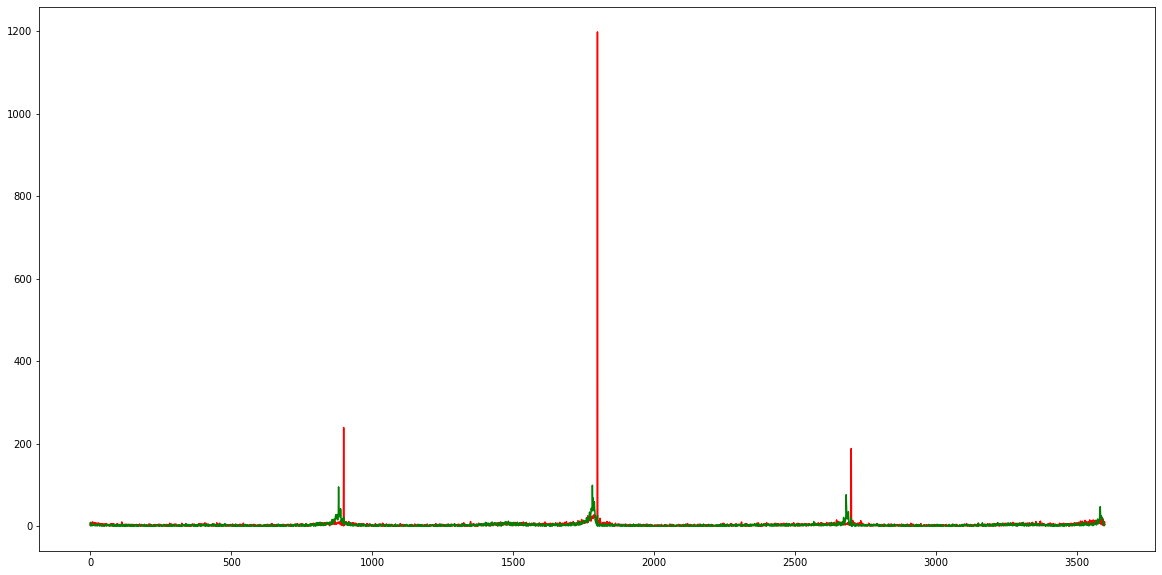

3599
[479.11394607 477.27304348 478.30020284 479.11616454 476.0002896
 478.62044007 478.79884226 477.63570602 478.50535146 477.1827646
 476.21393466 476.4283237  476.25426177 477.31629116 476.98325152
 476.63048499 475.93968254 475.21407963 476.13325642 476.50951557
 474.06630153 476.2074928  472.64448286 475.32114055 473.91102793
 475.08232585 475.55366906 473.65391254 474.50273224 474.15784934
 474.02644438 472.95890805 474.75524275 472.02757036 473.50760838
 473.62485649 473.04705882 473.24153758 473.35015773 473.07970183
 471.19518487 472.17994269 471.61386422 470.99140893 471.44861151
 471.04693761 471.14134478 471.59267735 470.03259937 470.93596341
 468.50785939 468.79       468.89802913 469.81267847 467.66542963
 467.89868721 467.01968616 468.53108956 467.25491873 468.02052452
 466.68908521 466.22678063 467.66419823 467.11389522 466.08226587
 467.22680706 464.88990043 465.65784983 465.62894512 466.59664582
 465.7254902  464.92670455 465.20164726 465.21805792 464.78370707
 463.41

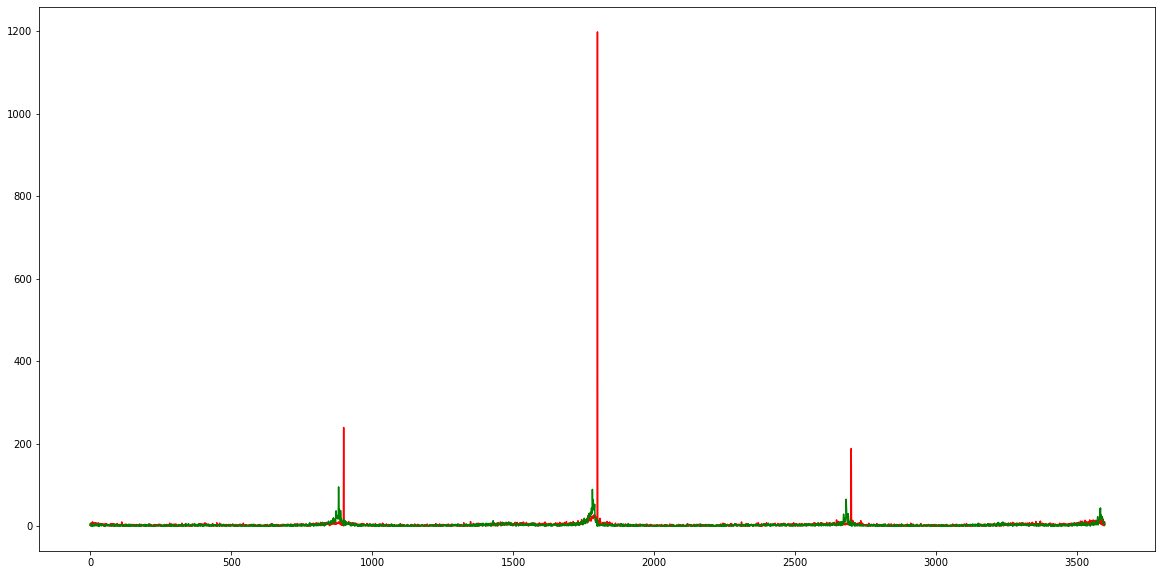

3599
[478.0081183  477.77246377 476.92871631 477.00926999 477.36026643
 477.26404169 476.68509407 477.54803241 475.88140006 476.20416426
 475.63255276 476.65028902 474.78503323 472.37868284 475.44730003
 474.79099307 475.78759019 472.77437969 475.22815114 474.23933103
 474.85903719 473.98069164 474.28032267 472.29003456 472.80420386
 473.71502591 473.4771223  472.69447641 471.3986195  471.57763082
 472.27852831 470.39310345 472.99569089 472.08271109 471.16996842
 470.58495982 470.15868006 470.42111302 471.20705477 471.17832569
 471.30753798 467.26962751 469.28816958 470.39604811 469.58717435
 467.87006297 469.39456366 468.55749428 468.11810123 467.98913665
 468.06773364 467.74314286 468.26906598 467.93289549 468.21866971
 465.31535388 467.08473609 467.28579578 463.37724551 466.48517674
 466.80022799 464.68148148 466.18370835 465.34396355 462.72957586
 464.96471258 464.83328592 461.28612059 465.30082457 464.27942013
 465.07530548 463.82784091 462.8721954  462.58262351 462.39483395
 462.

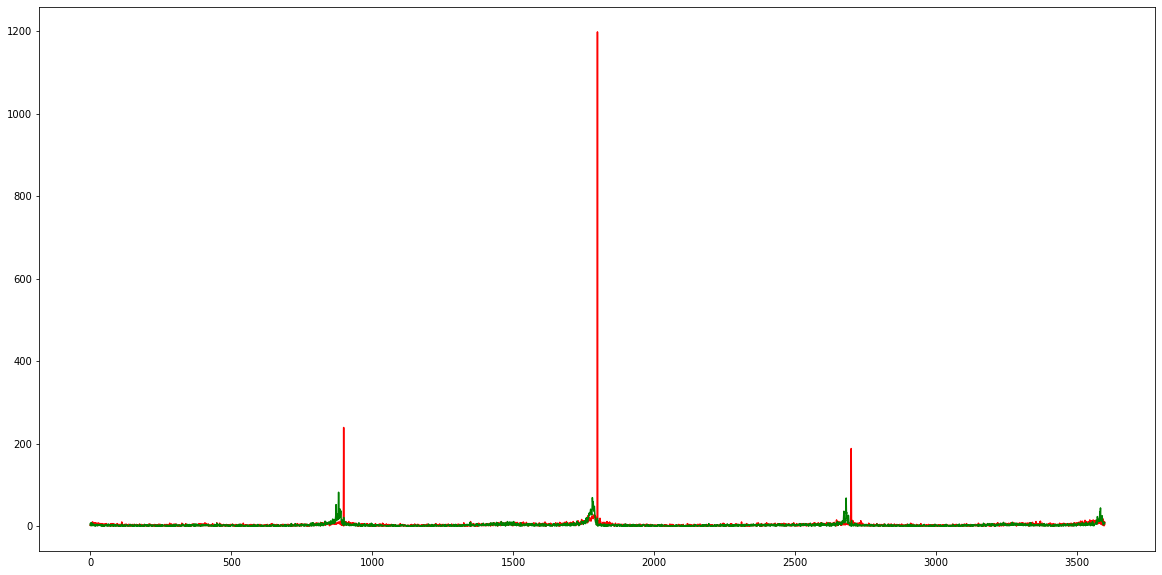

3599
[477.58886634 476.34782609 474.26948711 475.58140209 476.82652766
 476.29357267 474.57221418 475.14554398 474.74284061 476.0112782
 475.63428737 474.05       475.28026582 475.00722126 473.76176725
 474.19919169 473.23607504 473.50750144 471.6339775  474.022203
 471.74373018 471.46282421 473.25122443 471.43346774 470.77915347
 473.47985032 472.63683453 471.40103567 472.60655738 470.51351351
 471.17734981 471.74224138 470.30565929 471.67633544 470.52741889
 469.81544202 471.23586801 470.43144005 469.39174075 468.75716743
 468.99770708 470.59455587 469.51818963 468.80040092 469.20125966
 468.92186606 466.81945637 468.28461098 468.16614241 466.66466552
 467.77336382 466.52057143 463.70579834 467.6910337  467.13816729
 467.29965753 463.99942939 466.70964062 466.16880525 465.62400228
 465.48560844 465.62621083 464.76701794 465.1107631  465.04867635
 465.14058054 463.6230441  461.89391354 463.98123401 462.29164298
 462.57971014 463.91306818 461.79664868 462.97189097 462.86290094
 461.309

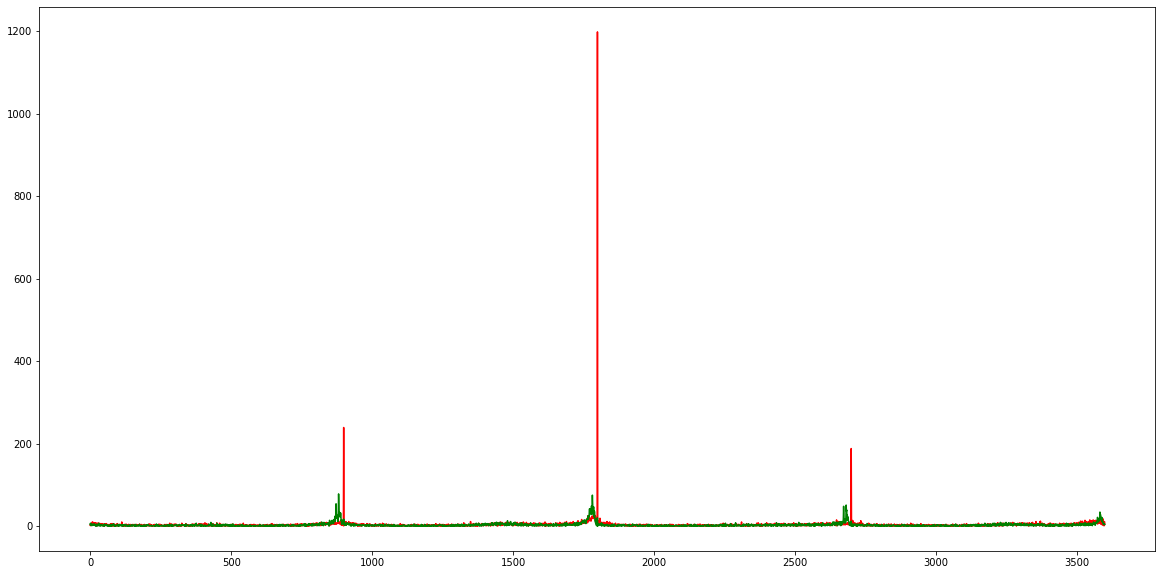

3599
[473.03682227 474.77855072 475.11185164 474.69959444 474.63770634
 473.54574406 474.51259045 473.99450231 473.96760197 474.37362637
 471.66869037 472.38063584 473.22565732 472.11120739 471.93935894
 471.95583141 472.22337662 471.85458742 470.51831555 470.76412918
 470.81867973 470.80634006 471.36070297 469.54925115 469.19637201
 470.70552677 467.28460432 470.80897583 470.73799252 470.19350201
 469.65766025 470.45718391 470.29560471 469.97846065 469.20442148
 469.35332951 468.45222382 469.43574297 466.68769716 468.27150229
 466.22212668 468.49598854 466.19736465 467.54725086 467.59433152
 467.25357756 467.24892704 466.79748284 466.8844724  465.62092624
 465.27807945 465.87942857 465.69951442 465.43917761 465.09077933
 466.05194064 462.25506419 463.85111238 463.10550328 462.25627138
 462.82644628 463.28660969 463.01822842 463.47665148 463.74950185
 461.6220831  462.21678521 462.14135381 461.69348877 462.20807277
 460.66439329 461.85653409 460.49020165 461.12890403 461.16378087
 460.

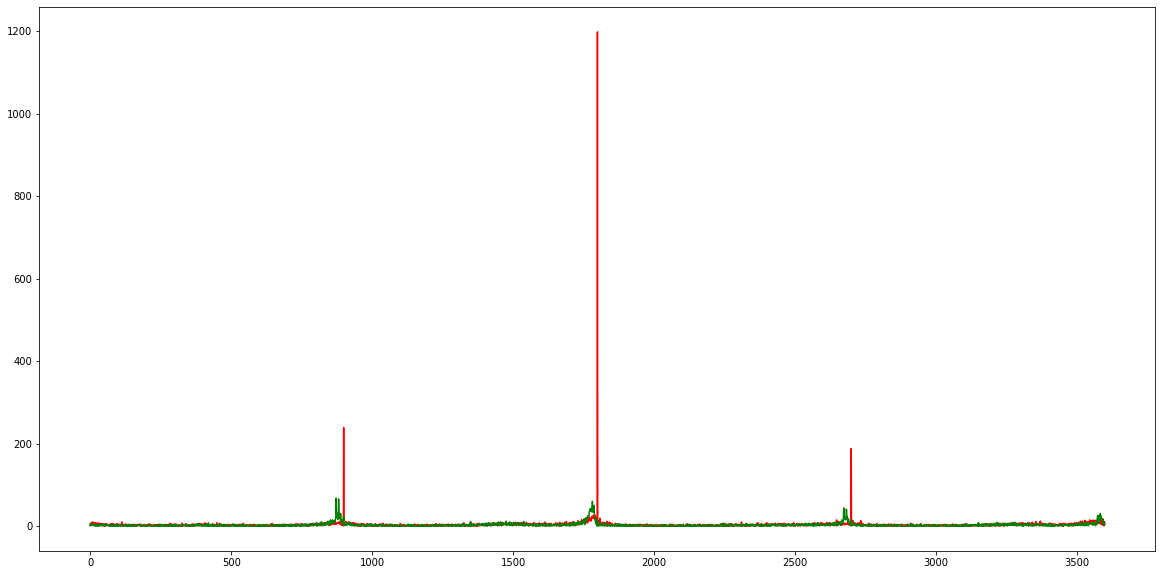

3599
[473.14989852 474.93072464 474.61547378 474.42439166 473.70402549
 472.63086277 474.12503618 473.69791667 472.94272491 472.18854829
 471.20988725 472.74739884 472.69748628 472.41594454 471.2884782
 471.54387991 470.87388167 471.31217542 470.47245457 470.91608997
 471.1020467  470.68789625 469.82944396 468.28369816 469.6066801
 469.97092689 468.13438849 469.55609896 470.20477423 467.88441633
 470.08680655 468.11752874 469.11088768 468.80528432 467.53229974
 468.87686567 467.93601148 468.79116466 466.9595641  466.51404817
 467.17913442 468.04183381 467.06244629 466.30068729 467.30632694
 465.71980538 467.03547926 466.32837529 466.46725765 462.85820469
 465.20920263 464.29171429 465.00856898 464.08081097 465.24065087
 464.1418379  463.00142653 463.17170565 462.93413174 463.76282782
 461.44799088 462.8014245  462.20649388 463.0905467  461.22174779
 461.38218554 460.82731152 462.10182025 459.6912141  460.48351336
 460.09377664 458.34204545 461.67736439 461.12294151 459.64149872
 460.27

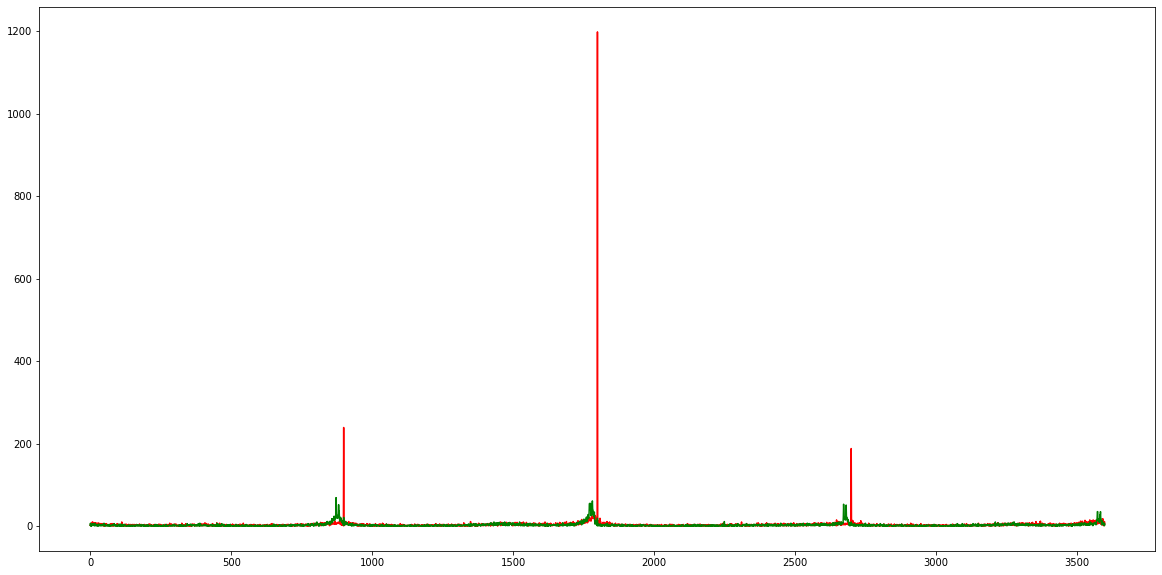

3599
[475.41635257 475.49942029 474.68356998 474.44988413 473.44772661
 473.20874349 473.62431259 474.90364583 472.95169222 474.02284558
 472.1945649  473.70780347 473.01935857 473.07538995 471.46549235
 473.04734411 471.9015873  471.73716099 471.56302279 472.30363322
 472.40011531 472.10951009 470.91328148 471.17626728 471.67895191
 469.74582614 471.21323741 468.65420023 469.75150992 469.69263945
 468.25294625 470.57471264 469.81154841 468.76019529 468.10967557
 467.13978186 469.20430416 468.26104418 468.17436192 467.64678899
 466.3631413  467.06790831 465.42337439 467.11884307 467.28227884
 466.59015455 467.19542203 465.79147597 465.63082642 466.6163522
 465.77907974 465.512      465.61039703 464.82153055 464.73508421
 463.77311644 463.99714693 462.49572162 464.86883376 462.78306727
 463.25676831 463.9980057  463.24636856 460.32289294 463.69883291
 461.81104155 462.97069701 461.0705347  462.17969861 461.20523024
 460.67661267 462.01534091 460.99261573 460.15218626 458.44252058
 459.8

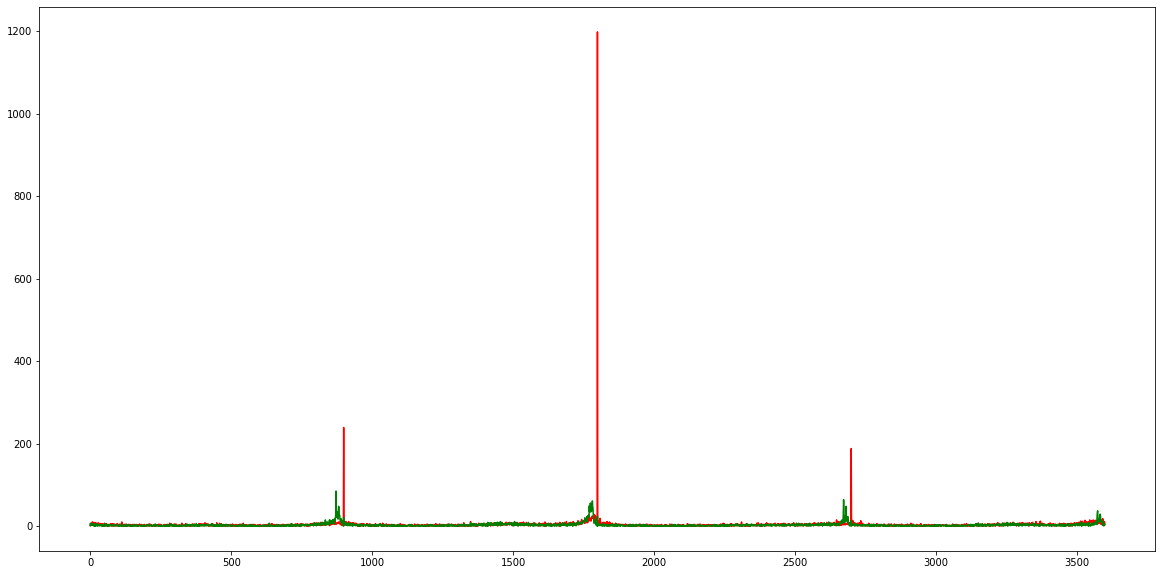

3599
[475.02870397 473.49449275 474.36858881 474.18771727 475.20590791
 473.61522872 473.15629522 473.05295139 473.4732427  473.38345865
 474.87655392 472.89884393 474.31378214 473.39514731 470.86774473
 473.57015012 472.25165945 473.17224466 472.4309201  472.09342561
 472.56586913 472.79711816 471.03370787 471.87298387 472.60610423
 469.21013241 470.67338129 471.5443038  471.43830889 469.76164462
 471.6861167  469.36494253 471.00430911 470.37363584 469.81136951
 469.83352468 470.54863702 468.04561102 470.06452538 468.74713303
 468.42505016 467.53008596 468.29074764 468.30269187 467.81019181
 467.50543789 467.39198856 466.97883295 466.44609665 467.77186964
 466.83766791 466.38657143 466.99742931 466.51998858 466.43048815
 466.58133562 465.48673324 465.45864233 465.29341317 465.77251995
 464.53177543 463.83475783 463.01708915 463.87471526 462.86592656
 462.732214   462.5485064  461.82792947 463.8126244  460.39880614
 462.90906508 461.22215909 462.12638455 461.84667802 461.42861198
 461.

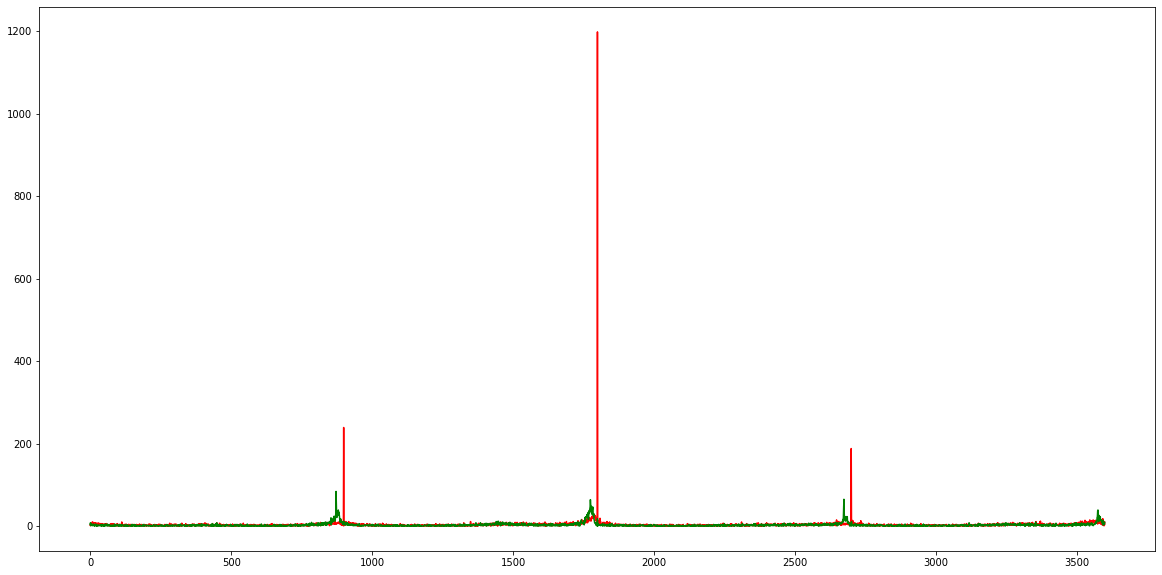

3599
[472.68222673 475.38318841 473.76992176 473.80967555 474.34723429
 474.49478865 473.6984081  473.19618056 473.50390512 473.29496819
 473.742122   473.0566474  473.50505634 473.44338533 473.07305804
 470.86836028 471.94718615 472.61886901 472.43553504 470.14158016
 471.02190833 470.64610951 471.86920196 470.96889401 469.98733084
 469.25849165 470.11539568 470.42405063 470.04141501 470.55319149
 470.48663409 469.64166667 469.32145935 467.31993107 467.88515647
 469.7956372  466.84218077 468.0037292  469.35990823 467.32740826
 467.99111493 468.41318052 468.0501289  467.34392898 467.27569425
 466.82741843 466.14763948 463.96453089 466.94709751 467.242996
 465.77765076 465.7        464.81262496 465.53997716 465.42477876
 463.11386986 464.37717546 465.06332002 462.30738523 463.65935006
 463.76346537 462.37492877 464.32383936 462.87784738 462.89524623
 461.48548662 461.78520626 462.05176337 461.47028718 459.49971575
 460.26086957 460.73295455 461.91990912 460.34213515 459.68918535
 459.88

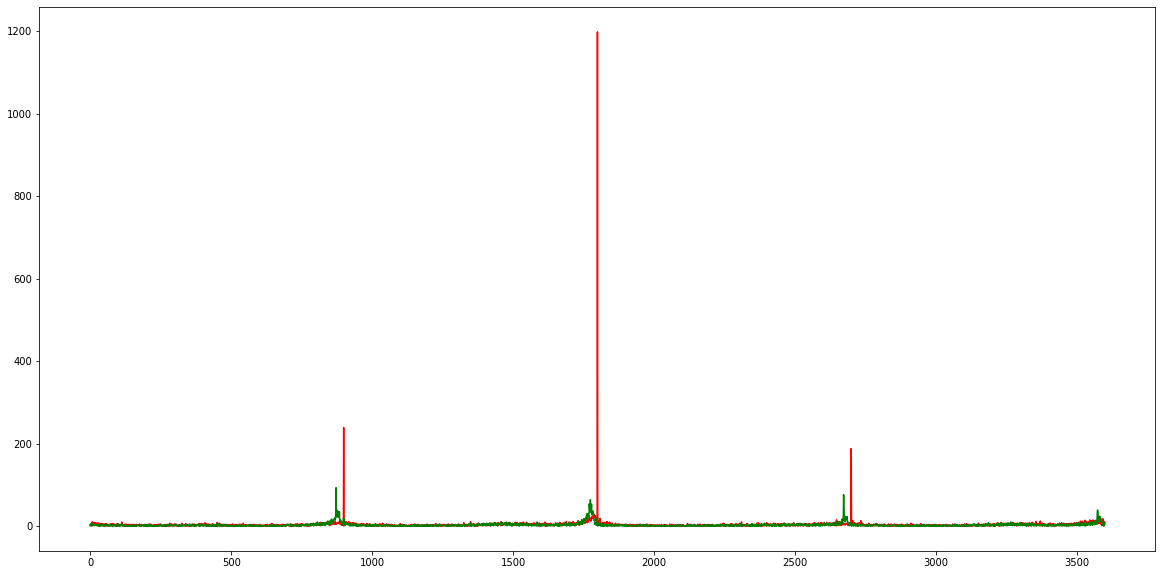

3599
[474.58393737 475.65797101 474.95827296 474.84820394 474.14132638
 473.79617834 474.15947902 474.92013889 474.60254556 472.07345286
 474.53454756 474.45115607 474.28922277 472.18313114 473.86918856
 473.03897229 473.52727273 473.35314484 473.17507932 473.1378316
 472.8864226  472.53487032 471.23365024 471.34418203 472.4022459
 471.52561888 470.63482014 470.04487917 469.36842105 469.87521564
 471.16269043 470.0816092  470.02154553 468.68954624 468.98679299
 468.89006889 469.02352941 469.01004016 468.81072555 468.48193807
 468.99484093 467.96418338 468.28559152 468.22479954 466.64643573
 467.45821408 468.2260372  465.70194508 467.27966829 467.64493997
 466.60903115 466.15028571 466.03456155 465.43089663 466.29546103
 464.09589041 463.55948645 464.59925841 464.10550328 464.2668187
 463.53776005 463.91566952 463.36513814 463.85392938 463.65044122
 462.46784291 462.34537696 462.00568828 461.66278078 460.15434906
 462.15799943 459.72272727 461.82050554 461.22146508 460.33550951
 460.927

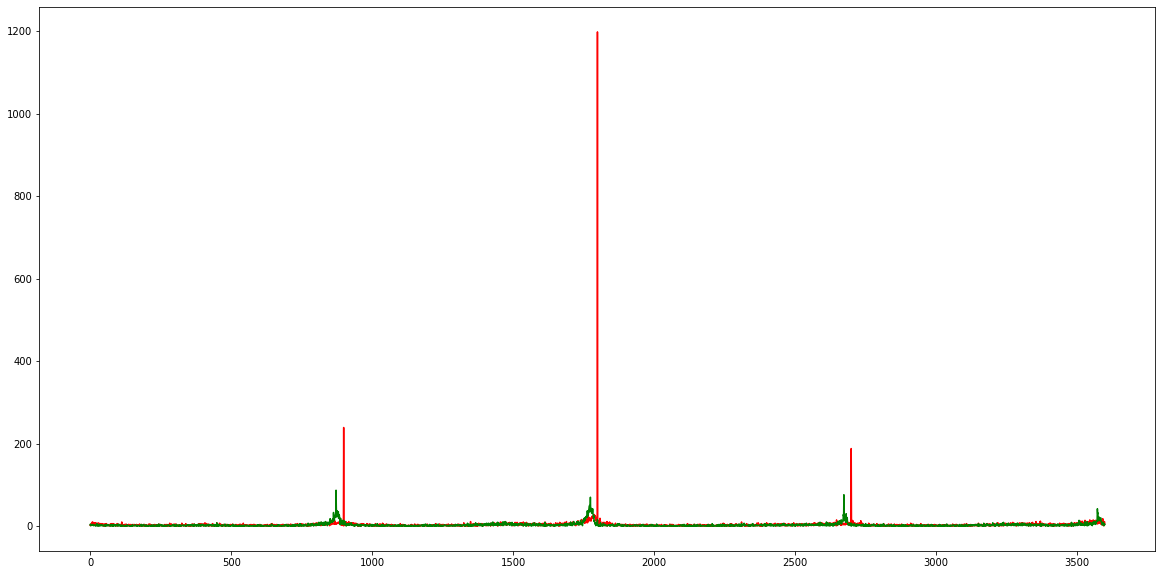

3599
[475.60539287 474.29971014 475.8336714  474.23928158 474.42658558
 473.95425594 473.92532562 473.87181713 475.08851605 473.17813765
 473.12171148 472.86127168 471.79023404 474.21490468 472.68495524
 473.10796767 472.33246753 471.66416619 472.86097491 471.74509804
 472.19602191 472.37377522 471.90262172 471.13853687 471.50302332
 470.93782383 470.99107914 471.48417722 471.72620075 470.47613571
 470.80741592 469.69511494 470.13904051 469.04135554 470.15389032
 470.4804822  469.34002869 469.55966724 468.96673358 468.88216743
 468.27285755 468.60744986 466.87281581 468.7362543  466.25794446
 467.12678878 468.16824034 467.47311213 468.17300543 466.66409377
 467.01514718 466.20171429 465.90202799 464.67589949 464.36939766
 464.48373288 466.27018545 464.55647461 465.40290847 465.48831243
 464.70988886 462.63874644 464.7097693  462.72722096 463.44634216
 463.47495731 463.50384068 463.51279863 461.64543645 461.89567936
 461.41489059 461.30568182 458.48423743 461.26916525 459.58785126
 459.

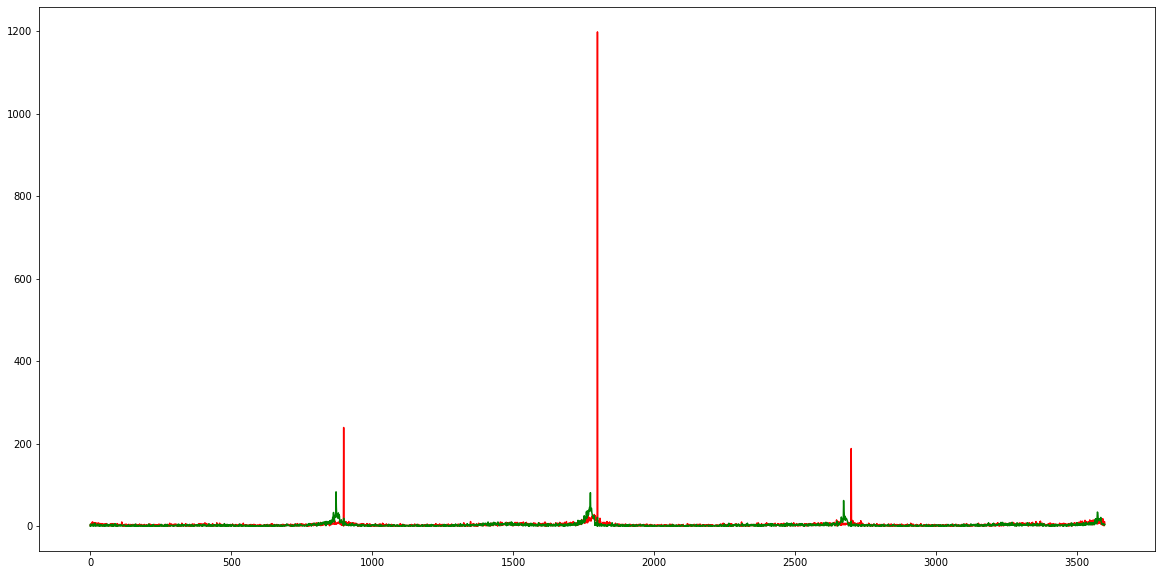

3599
[474.12786315 473.14695652 473.22862938 472.34762457 473.99391833
 473.31036479 473.20839363 473.16666667 473.92739369 473.5858878
 472.17664065 471.47919075 472.46518347 470.98180243 472.29685244
 472.96420323 472.51226551 471.7864974  471.3865013  470.71020761
 471.97319112 470.70144092 469.44309997 470.04637097 471.2473366
 470.2970639  468.4218705  469.16024166 469.09404659 469.83927545
 469.37769474 469.98994253 468.95173801 468.80557151 468.98822854
 469.2967853  467.09555237 466.58806655 465.41496989 467.34202982
 468.13700201 467.68022923 467.71068462 466.59221077 465.00343544
 467.44476245 465.20600858 466.84839817 465.9359451  464.61549457
 466.71077451 466.31628571 464.63381891 466.35065677 464.33856694
 464.53481735 465.09928673 465.33171706 464.20644425 464.21493729
 461.79566828 463.74643875 463.83281116 462.16828018 462.71591233
 461.48207171 461.42190612 460.94482366 462.23940859 460.65036953
 461.96135266 461.49090909 460.85969895 460.72203294 459.99687766
 461.05

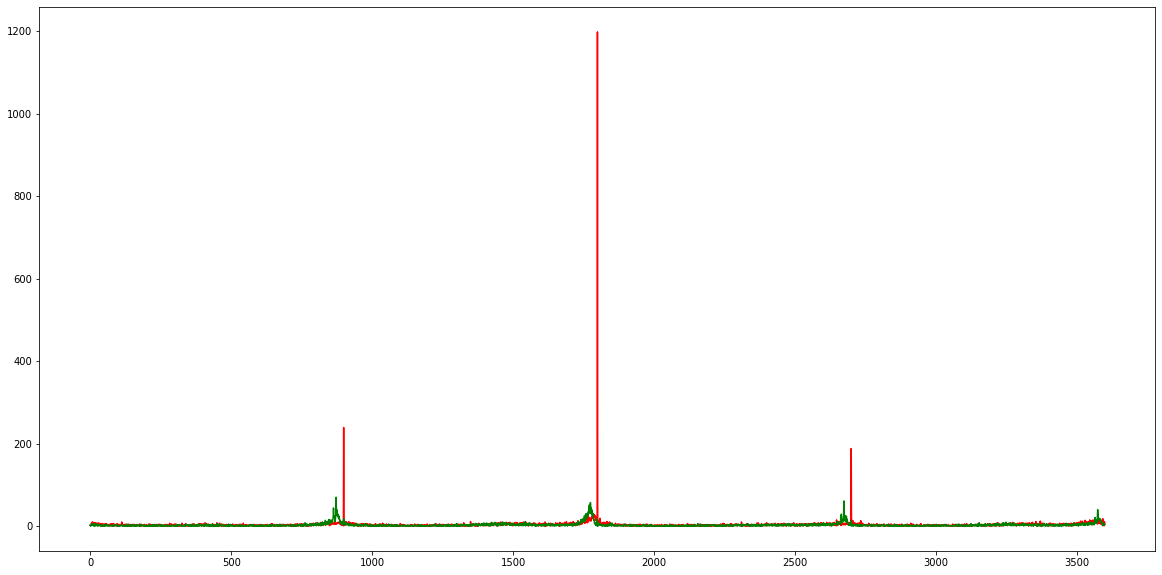

3599
[474.53609742 473.36173913 472.48971313 473.22392816 472.49290472
 472.66994789 472.55253256 473.33391204 472.20566966 472.86205899
 471.52587453 470.59739884 471.75469517 472.268342   470.9982674
 471.09872979 469.91168831 470.56664743 470.24026536 470.04181084
 470.23810897 469.48731988 469.46096226 468.35771889 468.77022747
 469.13442717 469.83683453 469.7278481  468.94995686 469.47556067
 466.59241161 468.56063218 467.74288997 468.28977599 468.94286535
 468.27382319 467.47776184 466.73092369 467.13708059 466.46875
 465.14273431 466.96017192 465.95273561 466.34936999 466.06441454
 466.14195764 465.42002861 465.78604119 464.61080927 464.53030303
 465.32723635 463.75428571 463.74178806 464.05939463 463.91493006
 461.51855023 464.11982882 463.02852253 464.33190761 464.08836944
 463.6600171  463.24957265 462.27314156 462.43764237 461.80102477
 461.62805919 461.56756757 461.7761661  460.5089565  460.32518476
 460.68542199 459.40454545 458.95683045 459.86768881 459.70309395
 459.1467

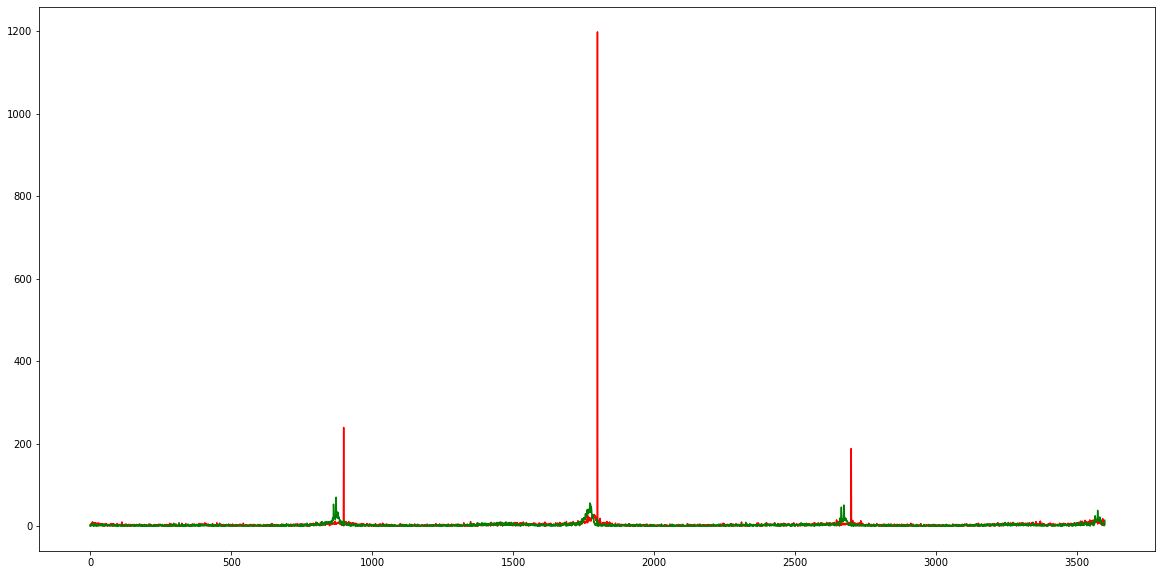

3599
[472.7976225  471.53304348 473.51637207 474.35776362 474.11555169
 471.98436595 471.62026049 473.06018519 473.25600231 472.63447079
 469.56923966 471.21184971 471.38312626 470.48122473 470.85359515
 470.47575058 472.201443   469.771206   471.92010384 469.44117647
 471.38281926 471.23487032 471.07000864 469.67684332 470.67175353
 470.46891192 468.57179856 468.40909091 468.60483175 469.82949971
 469.00201207 468.85948276 469.77420282 468.63067203 468.03502728
 468.89293915 467.23098996 467.01290878 464.06051047 468.27780963
 467.21954715 465.91862464 464.96190203 466.78665521 466.88720298
 465.49370349 466.28555079 466.76344394 466.40577638 465.74099485
 464.9156902  465.17314286 464.43216224 465.02655625 464.2366543
 464.23972603 462.95663338 463.79463776 463.71913316 463.58551881
 463.5785124  462.34757835 462.12702934 463.11759681 463.02077996
 461.23562891 462.32631579 462.25455063 461.77025874 460.73109721
 462.07701051 459.03920455 459.57086055 461.08375923 460.36275901
 459.8

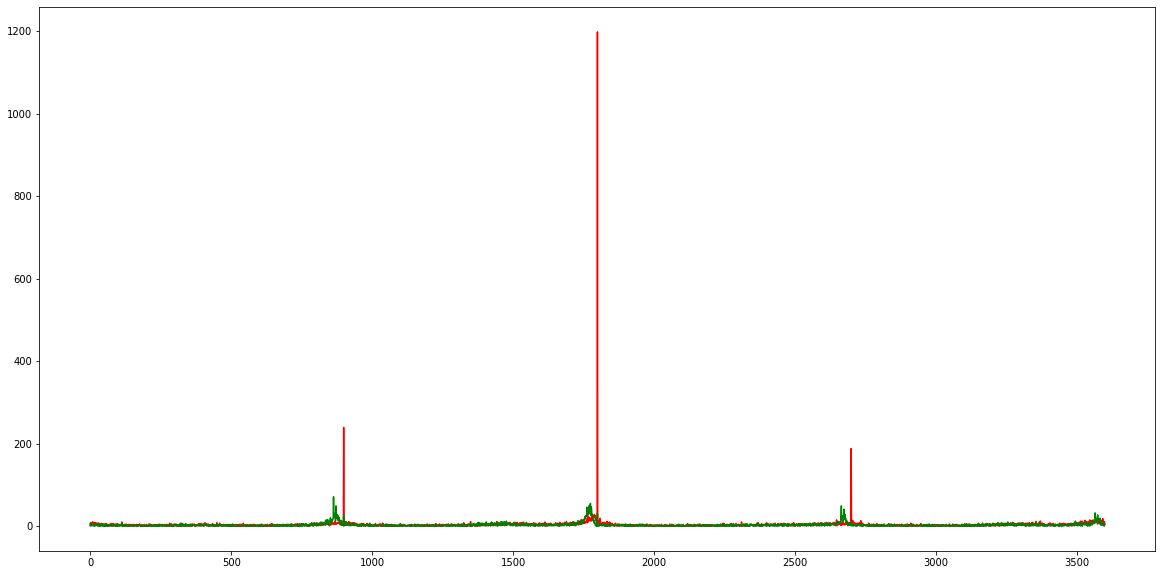

3599
[472.72310815 470.46318841 470.88293248 472.47827346 471.63857515
 472.66936885 470.42691751 472.46180556 470.49696268 471.46934644
 469.59554785 469.86300578 471.21958971 470.82351242 471.66560785
 470.19110855 470.83607504 470.67512983 470.04701471 469.64561707
 470.51859325 470.09884726 469.89311438 468.59619816 469.89893464
 469.03626943 469.09611511 468.49395857 467.12625827 468.3720529
 467.46651337 468.62212644 467.19649526 465.56547961 467.93310365
 466.6727899  467.15638451 465.65203672 467.38112991 466.25659404
 465.14588707 466.32722063 466.35032942 465.28865979 463.62496421
 465.12020607 465.38168813 464.53089245 464.81441235 463.10691824
 465.20120034 464.68428571 462.80919737 463.6916048  462.93605481
 464.13384703 461.03366619 462.10667427 462.08069575 462.24572406
 462.52436592 462.33846154 462.7946454  461.74943052 461.34927412
 461.25697211 459.21934566 459.53043231 459.1873756  460.57930642
 460.01619778 460.74801136 459.39278614 459.72998296 457.94919103
 458.1

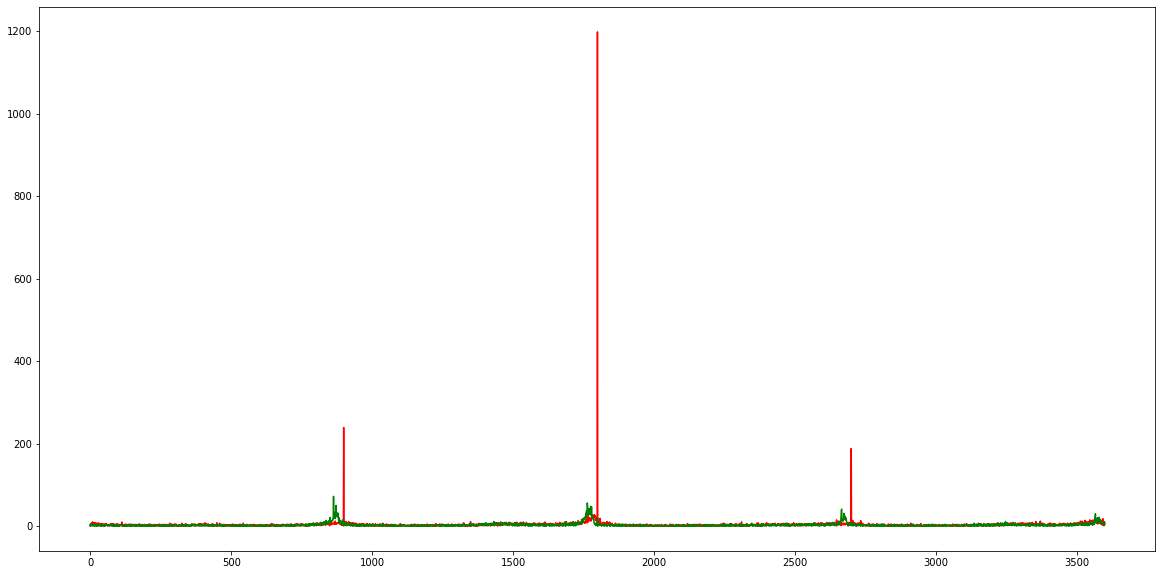

3599
[470.61670049 472.91391304 472.20023182 472.16714948 471.91543585
 471.48407643 471.45441389 470.65538194 471.13479896 471.00173511
 471.64989881 470.66936416 470.9445247  469.63575968 469.10077967
 470.58140878 469.53477633 470.53981535 470.35794635 469.39302191
 468.61862208 469.34524496 465.98098531 467.70766129 467.2571264
 467.60276339 467.7571223  468.13952819 468.41127409 467.69120184
 467.1957459  465.86551724 465.48980178 467.88541068 466.49095607
 465.1021814  466.34088953 466.31526104 465.82850588 465.43119266
 465.78647177 465.63753582 464.75794901 465.21449026 463.80961924
 465.38923869 464.82460658 464.4902746  465.07720904 464.35391652
 464.44241212 464.39028571 463.76949443 462.57681325 462.0939195
 462.91438356 461.36633381 461.12435824 462.47362418 461.37400228
 462.28811627 458.90598291 461.34206779 460.55951025 461.82550527
 460.11781446 461.40341394 458.56399317 461.01393233 459.52302445
 459.81955101 460.39545455 457.28713434 459.14082907 457.73942663
 457.49

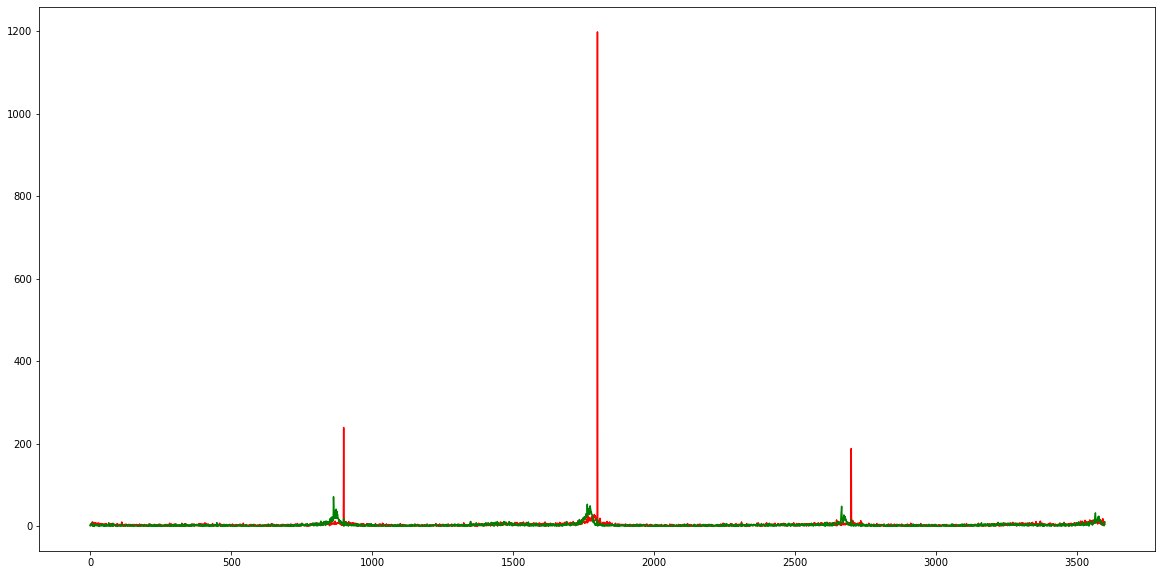

3599
[470.62539867 472.6626087  471.07099391 470.95741599 472.22704894
 470.7805443  470.40955137 471.08362269 470.80676887 470.93435512
 467.94680544 470.87716763 470.84339786 470.51617562 471.04129368
 469.72055427 468.42481962 468.27841893 469.89183732 468.77854671
 468.54136639 468.08991354 468.62172285 469.19354839 468.36395048
 466.97668394 468.30647482 468.36018412 468.44434858 468.23375503
 467.33544122 466.3545977  466.66992244 466.72601953 465.68963537
 466.89064294 465.83357245 466.0562249  465.65901921 465.59547018
 463.52249928 465.98051576 464.96218848 463.45446735 464.97967363
 463.0174585  464.4981402  464.58381007 464.3668859  462.66952544
 463.3801086  463.32485714 463.30448443 463.5005711  461.88381387
 463.55222603 461.89472183 462.48031945 462.02651839 462.02109464
 459.77600456 461.48205128 460.91341498 460.99829157 458.82607458
 460.41775754 460.19374111 460.44197952 459.33892522 459.66799318
 459.5640807  459.71704545 459.41579097 457.6794435  459.10984956
 459.

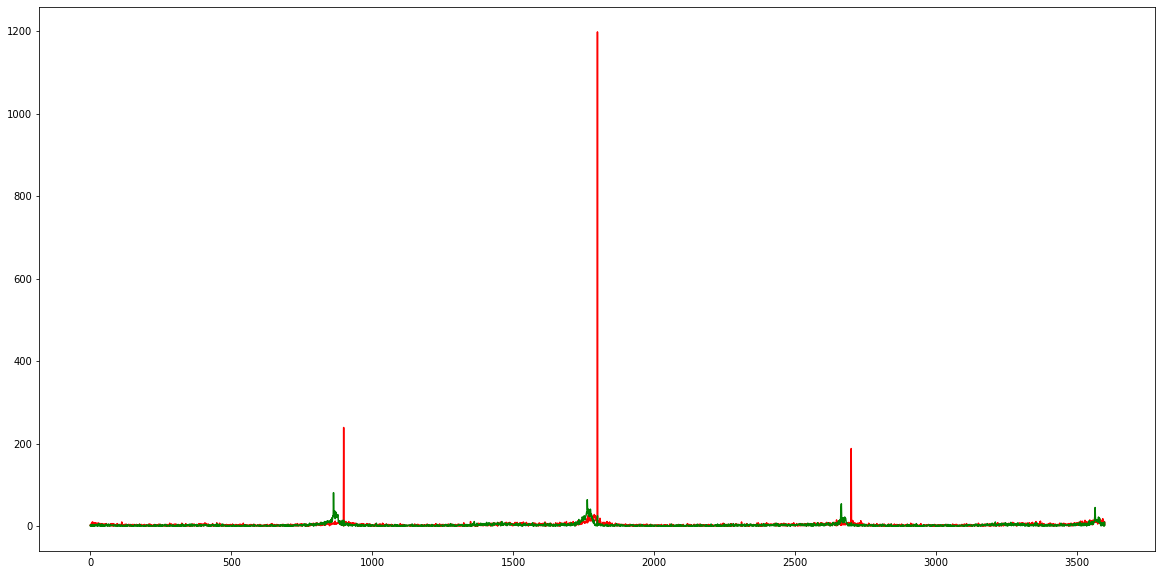

3599
[471.85416063 473.7173913  471.33149812 471.55388181 472.14856646
 472.61783439 472.3105644  471.45109954 472.02834828 471.62203586
 470.66377566 471.37630058 471.19069633 470.02166378 471.0961594
 470.49220554 470.52958153 471.01211771 470.30112489 468.9561707
 468.89103488 470.2184438  469.33765485 469.0264977  467.84653038
 469.19775475 468.06302158 468.1924626  467.12309462 467.48591144
 468.13624605 467.38735632 466.63171502 466.12693854 465.3126615
 467.65269805 467.33601148 467.28915663 467.16919989 466.31479358
 465.43192892 466.34126074 466.51962188 466.0091638  465.29058116
 464.84716657 465.63948498 464.02116705 465.43951959 465.2621498
 465.1546156  464.35571429 464.78520423 464.14705882 463.84584642
 463.12100457 463.2510699  463.11893896 462.2540633  463.17160775
 463.06013109 460.23019943 461.83195671 461.66002278 461.77910618
 461.47666477 461.12887624 458.82536974 461.21268126 460.14070495
 460.36061381 460.05767045 460.02698097 459.55025554 458.17258019
 459.3374

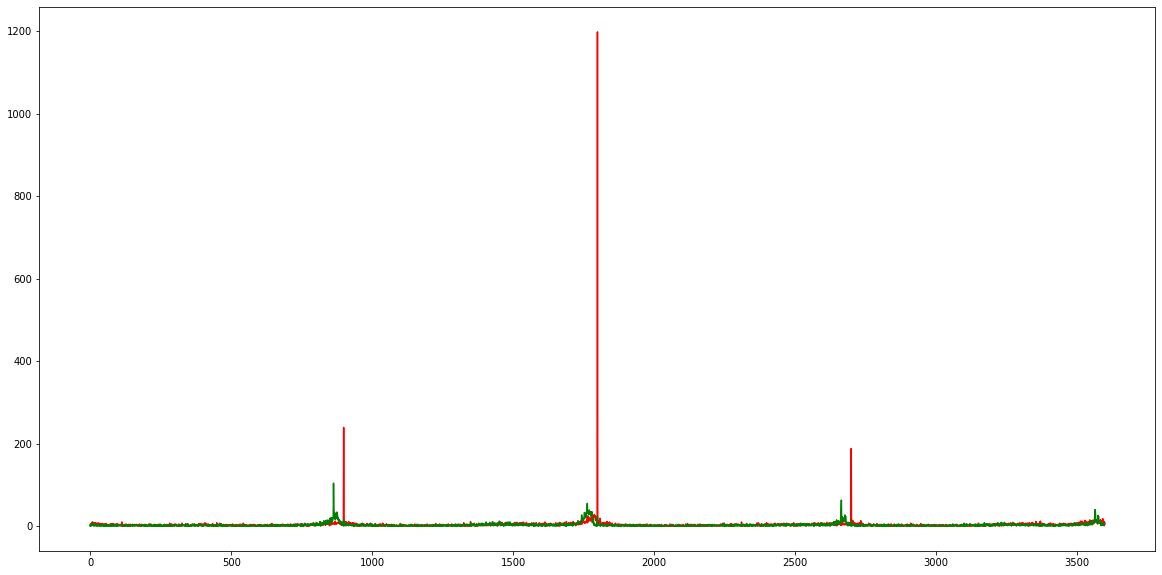

3599
[472.89591186 472.69942029 473.93740945 473.41628042 472.85143354
 473.40966995 473.26222865 473.24016204 473.5912641  473.41758242
 472.94362533 470.89479769 470.59289223 472.83939919 472.07941092
 470.77627021 470.65627706 472.08165032 471.10672051 470.99106113
 469.75843182 471.41066282 468.39181792 467.99279954 470.88914483
 469.56793322 470.73352518 469.55120829 468.29594478 469.95083381
 469.3501006  469.65344828 468.74662453 469.60224009 468.23858742
 468.20551091 466.63816356 467.44578313 467.15027244 467.85751147
 465.96359989 467.44498567 465.28587797 467.06586483 466.95390782
 467.0463652  464.78254649 465.91676201 464.81040892 465.28559177
 465.4152615  464.44685714 464.94858612 464.69417476 465.33571225
 463.99343607 464.57803138 464.99572162 464.72939835 464.38141391
 462.96865204 462.60541311 462.05383082 461.71924829 461.90037005
 463.30307342 461.6173542  463.00853242 461.99857833 460.6995452
 461.64165956 459.82045455 460.11729622 460.40431573 461.63724099
 460.7

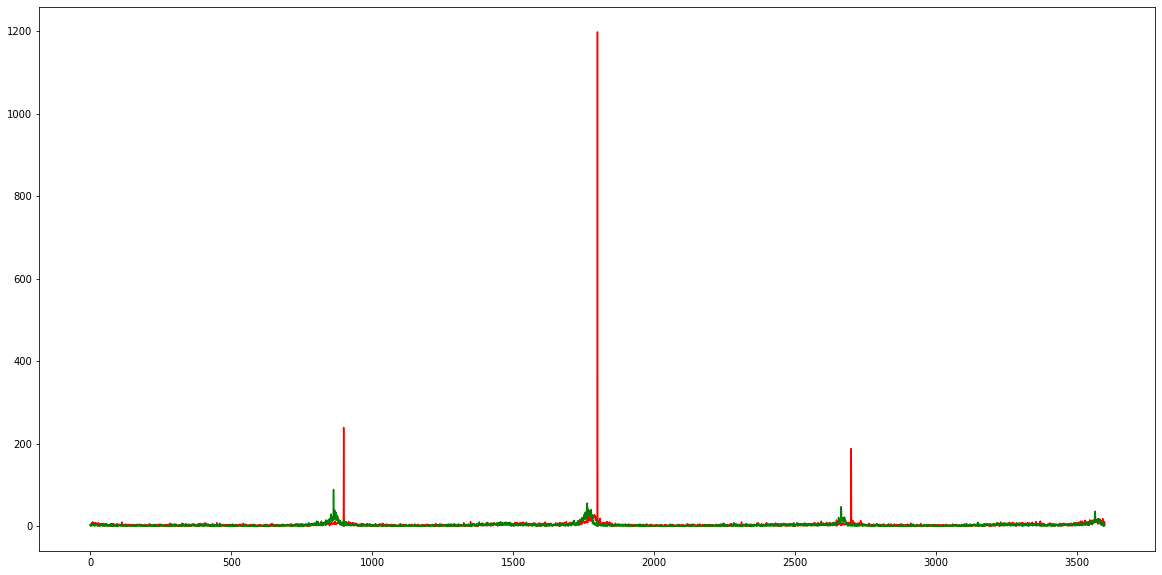

3599
[472.49434619 472.76550725 470.05447696 471.13238702 472.10628439
 472.45512449 471.50535456 470.86689815 469.71825282 470.47513013
 469.7418329  470.48526012 469.35221034 469.91334489 471.05804216
 470.41599307 469.18268398 470.60588575 469.94808192 469.31862745
 470.05246469 468.54409222 467.38461538 468.86635945 468.05384394
 468.36298215 468.41899281 468.3141542  468.6623526  468.7093157
 466.39465364 466.20517241 466.97069808 468.07064905 467.10680448
 466.20665901 465.40832138 466.86517499 466.72727273 465.7809633
 463.26167956 464.9234957  465.77914638 465.26202749 465.21357
 465.43846594 465.61058655 463.46281465 464.09779811 464.20097198
 464.20234353 462.94571429 463.32819195 462.35065677 461.84299172
 463.53139269 462.90813124 463.54535083 462.5560308  462.42987457
 460.20547164 462.46438746 461.22757049 460.738041   460.61969826
 460.49060899 460.46145092 461.51649602 459.26613591 459.61000569
 460.25206024 458.54517045 459.76483953 460.25014196 457.92534772
 457.91657

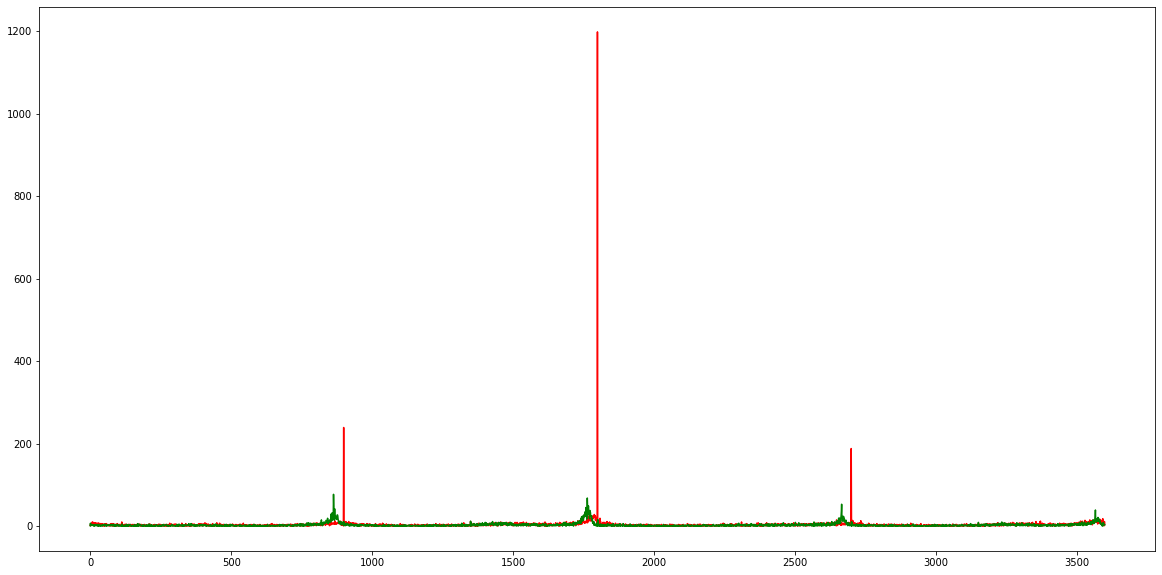

3599
[471.87822557 473.08376812 472.0040568  472.20828505 471.13234868
 470.29096699 471.75311143 470.67563657 471.11570726 472.24349335
 471.98467765 470.94306358 471.28286622 469.6152513  471.67715853
 470.54763279 468.91948052 470.80957877 469.21257571 470.4766436
 469.25684635 470.43487032 469.87323538 468.51814516 469.73999424
 469.39781232 468.2923741  468.17088608 468.92033362 468.18056354
 466.57114113 467.18936782 468.2912956  467.85439403 464.47430376
 467.63002296 467.12740316 465.83161216 466.72526527 466.51691514
 465.48638578 466.52492837 465.63563449 466.4687858  466.1677641
 464.69347453 465.40686695 463.25171625 465.05433228 465.0191538
 465.19491283 464.09457143 462.99885747 464.4743004  462.95261205
 463.54594749 463.23651926 462.49001711 461.31565441 459.00912201
 462.97093189 461.47150997 462.05724865 461.15888383 460.79390834
 460.76408651 460.93627312 461.02645051 459.97156668 461.02671973
 457.00113669 459.63068182 459.77307583 458.88160136 457.78569401
 459.396

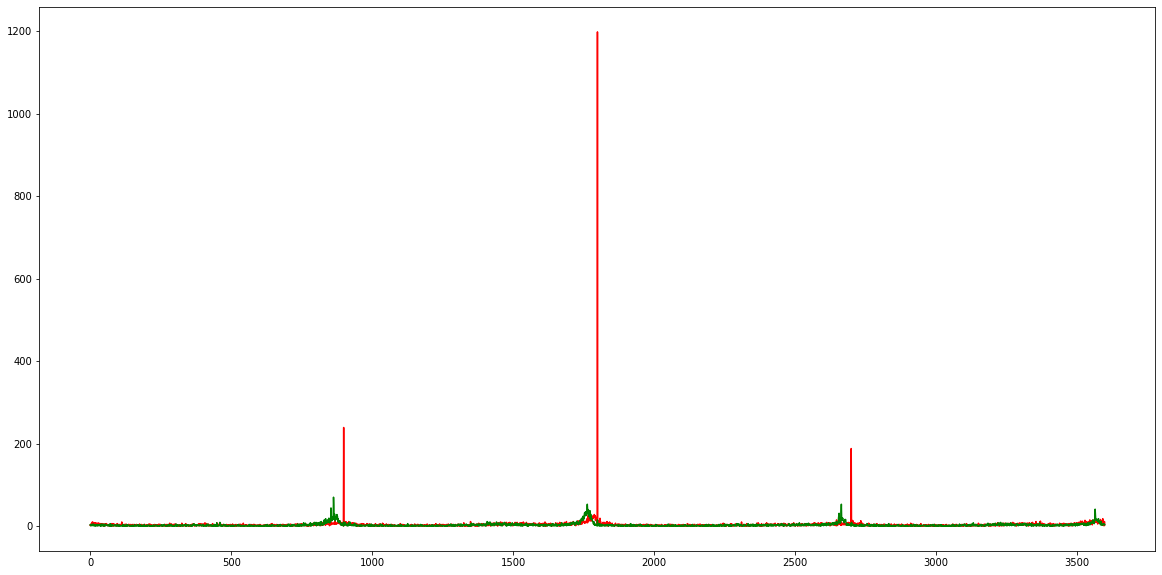

3599
[471.88315454 470.5942029  470.0631701  469.73319815 471.28699681
 470.87116387 470.75571635 469.04832176 470.11050043 471.14141122
 470.30760335 470.66358382 470.50418954 468.28278452 468.31446722
 469.29878753 469.38787879 469.31909983 469.24516873 466.9544406
 467.21620063 466.81585014 468.7951599  466.08698157 467.74517708
 466.45595855 467.65381295 467.94677791 466.57003164 466.29269695
 466.91146881 467.04597701 463.29646653 467.12033314 464.58024691
 466.29506315 466.09698709 465.77309237 464.54086607 464.39650229
 465.28202923 465.27707736 464.21111429 463.16408935 465.2004008
 463.81110475 464.16537911 463.8360984  462.08578782 464.27186964
 463.42869391 463.22142857 461.7517852  462.69960023 462.5004282
 462.22659817 462.13238231 462.15487735 462.3823781  460.5336374
 462.37959533 459.7980057  461.60723441 460.12870159 461.29888984
 460.77717701 458.94992888 460.57679181 459.09610463 459.31296191
 458.60130719 458.68977273 458.98977563 458.02356616 458.88135112
 456.8867

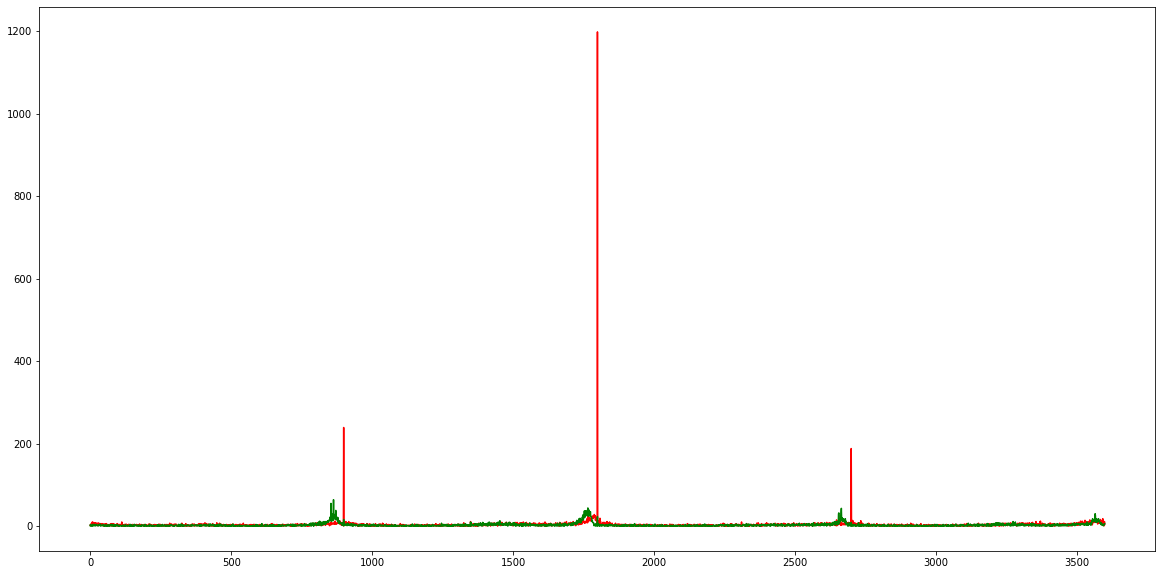

3599
[471.08292259 470.5573913  470.25963489 470.22537659 469.13698233
 470.8566879  468.22054993 469.00202546 470.28724327 469.46443031
 469.13819023 468.73526012 469.6174516  469.10976314 469.0043315
 467.56581986 468.59134199 468.37189844 464.81453706 467.11793541
 467.0461228  465.91383285 468.04523192 465.94153226 467.49784048
 465.81375936 467.38647482 466.71576525 465.10008628 466.62564692
 464.20810578 465.44281609 466.38810687 463.98047099 465.27505024
 464.60619977 464.84849354 464.51118761 463.51333525 464.15338303
 463.51648037 463.64441261 464.53308508 464.74484536 463.498998
 462.16514024 463.10271817 463.9562357  462.5478982  461.09548313
 462.5773078  461.50571429 461.80719794 462.10051399 462.37796175
 459.67037671 461.4467903  460.11323446 461.52124323 461.02337514
 460.32630379 461.12108262 460.32611792 458.44077449 459.14659835
 460.48634035 459.53058321 457.74914676 459.13875462 459.12933485
 458.20431941 459.13977273 457.54103948 457.89977286 457.82202668
 458.465

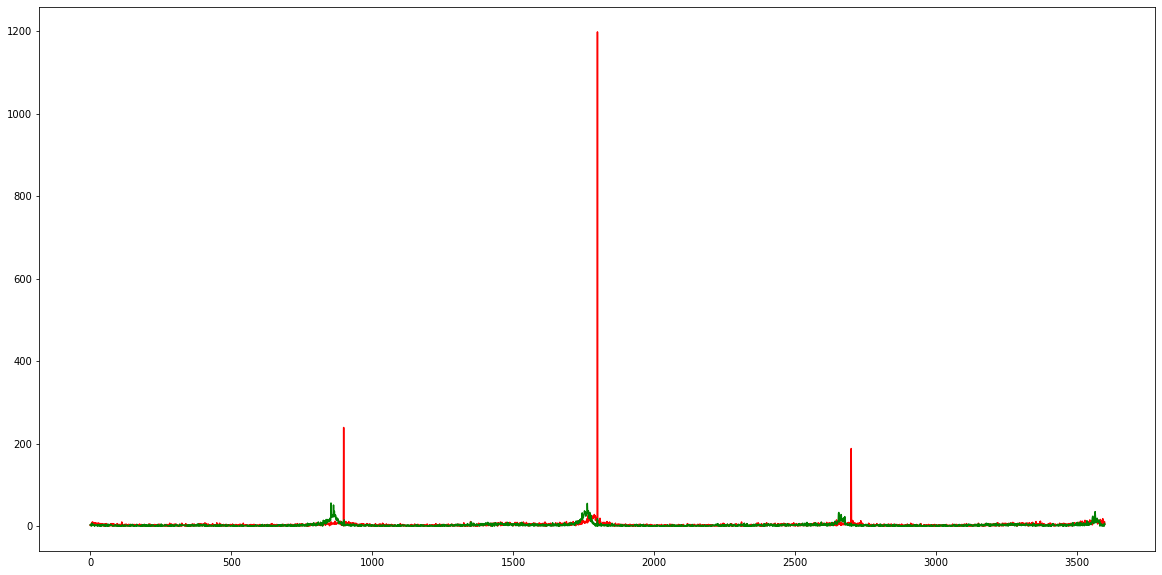

3599
[471.30849522 470.28144928 470.68965517 471.08603708 470.62814944
 469.57701216 470.89319826 469.54369213 470.36071739 468.17293233
 468.56230124 466.61907514 467.93614562 469.00953206 469.77649437
 469.65906467 467.56594517 466.35401039 468.0827805  468.05046136
 467.62842318 467.77146974 467.74589455 467.20103687 467.08522891
 467.46862406 466.92201439 466.86363636 465.92033362 466.33553767
 466.06841046 465.93908046 465.12869865 465.77369328 465.4656905
 465.48679679 465.66628407 464.92570281 465.47519358 465.63130734
 464.49125824 463.91203438 464.47980521 464.65206186 463.84855425
 463.06697195 463.28297568 462.23627002 463.76436946 461.9296741
 462.92140612 463.19114286 461.8426164  462.28298115 461.13645447
 460.43835616 460.90128388 461.47775242 461.05360707 461.59549601
 461.55514392 459.72877493 460.4107092  458.58798405 460.70908056
 459.72538418 460.27852063 459.51478953 457.2035826  458.57475839
 459.44984371 458.78636364 457.916785   457.70471323 458.89525972
 457.56

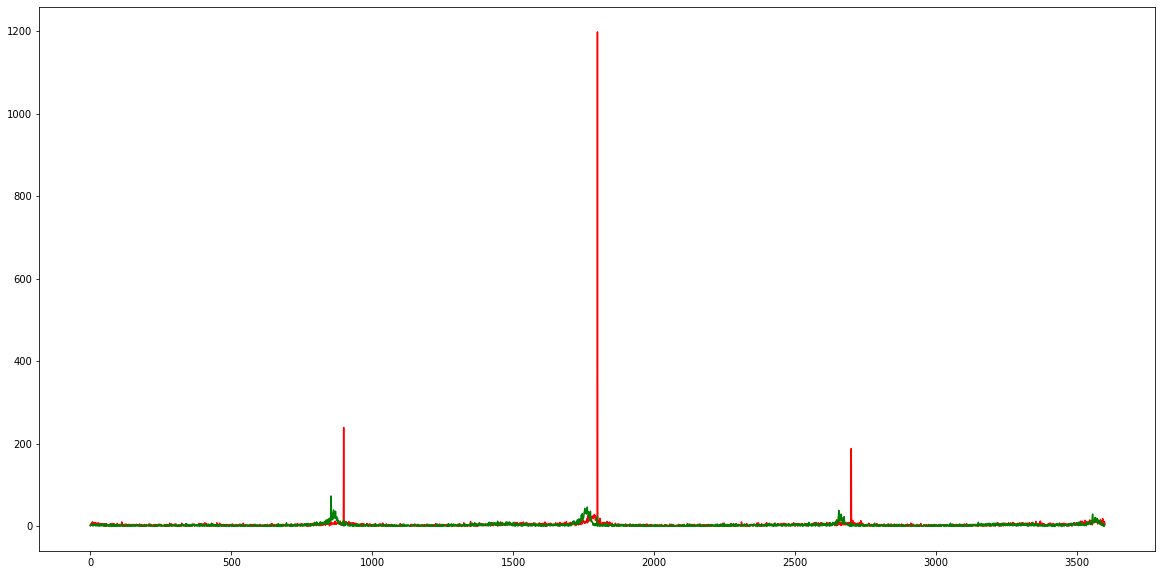

3599
[469.85242099 469.44753623 471.38452622 470.98435689 468.0805097
 469.97683845 469.42228654 470.41869213 468.80156205 468.43869289
 468.52269442 468.8482659  469.69950881 468.25158868 468.69217442
 467.81351039 467.87734488 468.58020773 467.69079896 466.73010381
 468.15508792 465.82305476 467.70123884 465.99164747 467.12582781
 464.66263673 467.81870504 466.57336018 466.37100949 466.89246694
 466.49267031 465.12327586 464.94110888 465.65738082 462.7100201
 465.43570608 465.7713056  464.8643144  464.83882994 464.82167431
 464.5075953  464.43925501 463.6379261  463.29381443 462.98081878
 462.73983973 461.84062947 463.08838673 463.50357449 462.00142939
 463.39296942 462.75457143 462.10082833 462.19360366 462.74678847
 461.00313927 462.44793153 460.99372504 462.06986028 460.26510832
 459.35166714 460.7960114  460.65195101 459.23661731 460.13948192
 459.16192373 459.57837838 458.86120592 458.41910719 459.03752132
 457.40807047 457.75255682 459.37375746 456.75752413 459.13142208
 456.26

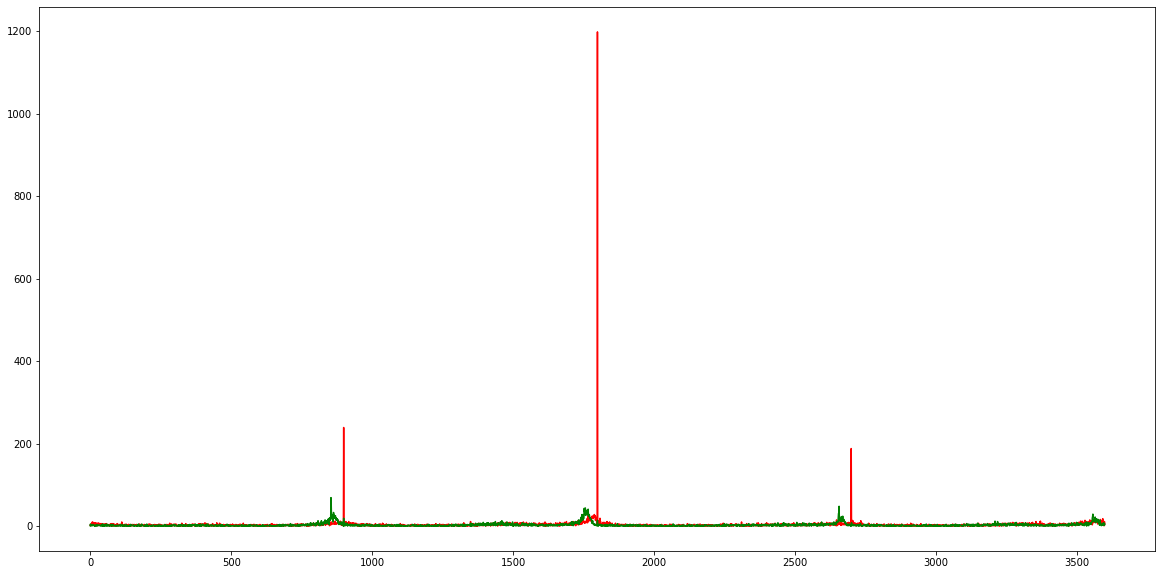

3599
[470.19367933 469.35623188 470.00231817 469.07705678 470.70055025
 468.65720903 469.91230101 468.2349537  470.01475268 468.43377675
 468.12720439 468.57023121 469.73678128 468.91507799 467.29598614
 468.15560046 467.41154401 468.24148875 467.82578598 467.60668973
 467.08648025 466.07838617 467.13828868 464.87528802 467.07716671
 467.31519862 467.13870504 466.10874568 464.63301697 466.36256469
 464.56769187 465.73362069 466.34846309 465.19184377 463.0585702
 465.2293341  464.45251076 463.85197935 464.84055062 464.18291284
 462.92175408 464.87965616 463.99513034 464.54037801 463.5184655
 461.27590155 461.91072961 463.72797483 462.98427223 462.51801029
 461.746499   462.75257143 462.12367895 462.44003427 461.07393663
 461.15296804 461.80057061 462.03251569 460.536641   460.99857469
 460.56796808 460.98262108 459.92395329 459.18593394 460.03814404
 459.8104724  458.1940256  459.04010239 459.34262155 459.39113132
 458.01335607 458.17897727 458.79579665 457.50425894 458.32018166
 457.83

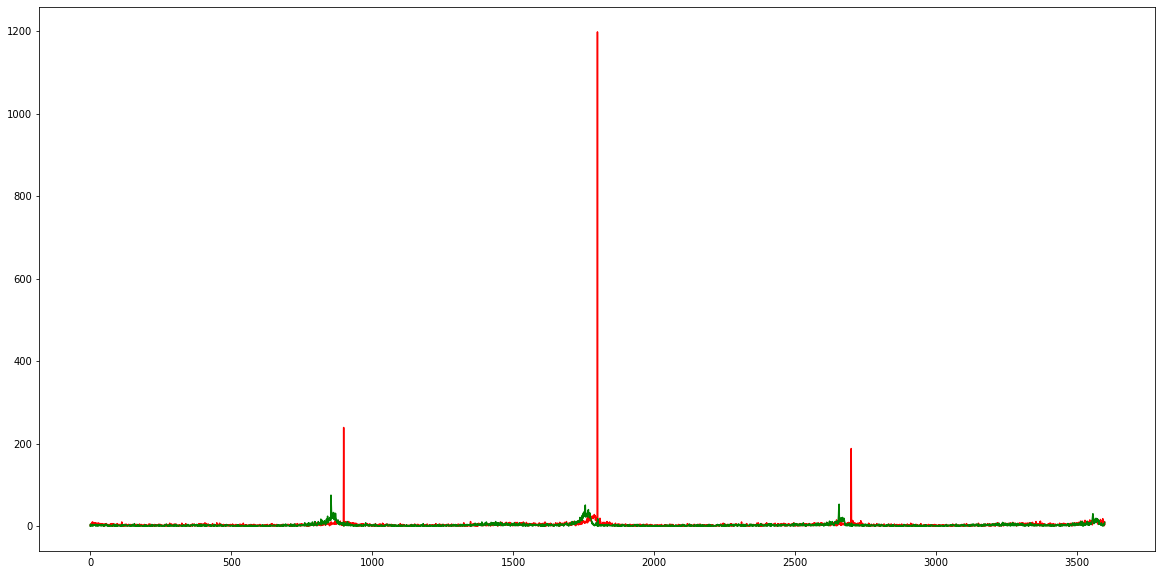

3599
[471.44969556 470.83275362 470.75572298 470.85950174 470.50188242
 470.24724957 469.28162084 471.02633102 468.17674284 470.82851359
 469.32957502 470.4632948  469.01531349 469.7276141  468.81172394
 468.72142032 467.73766234 466.21840739 467.6322469  468.41032295
 469.18766215 467.94697406 467.4292711  468.18317972 468.01439678
 468.2193437  467.28201439 467.13780207 467.55680184 467.77975848
 467.59902271 466.55948276 466.68830796 466.95117748 466.84955498
 465.72560276 464.476901   466.53270224 465.48264984 464.7703555
 465.65319576 464.56131805 465.27270123 463.08104238 462.74091039
 463.61390956 464.07496423 464.13672769 464.10923649 463.86049171
 464.00943127 463.86228571 461.60039989 462.35750999 463.36226092
 461.79223744 462.30242511 461.52624073 460.95580268 461.76938426
 461.82388145 459.4005698  460.01822842 461.66998861 461.47423854
 461.35002846 458.94736842 460.85608646 459.95137902 460.23138147
 459.00511509 458.93096591 459.00312411 459.14281658 457.92478002
 459.2

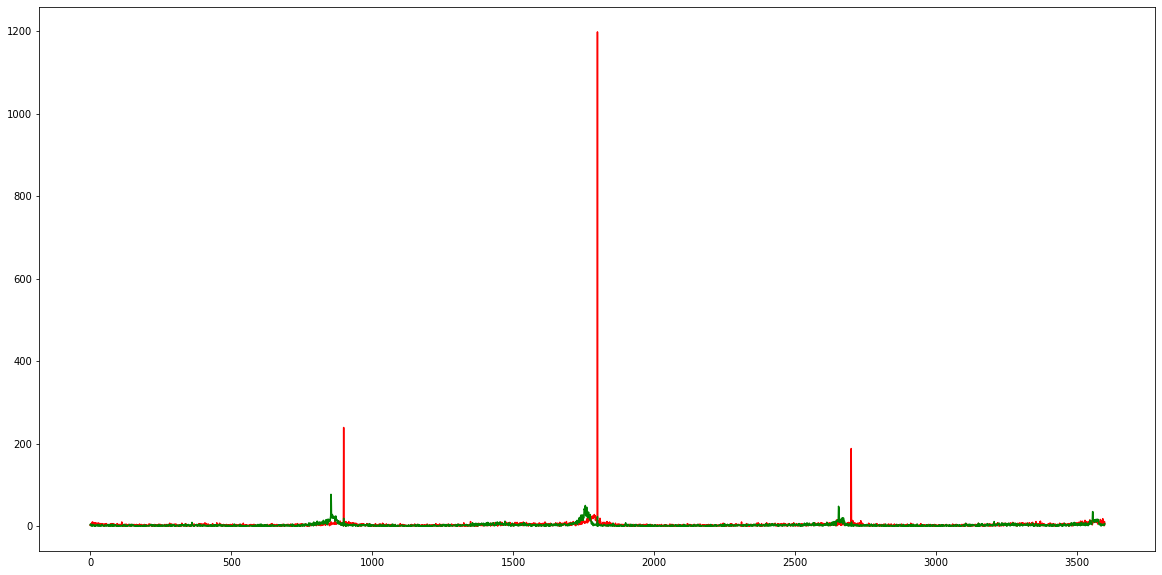

3599
[470.89446216 469.72811594 471.99652275 471.73551564 470.4468578
 471.32252461 471.21678726 470.96412037 470.05843217 470.33747831
 469.3558832  468.29046243 469.30858133 468.84257655 470.60756569
 470.39318707 467.14401154 469.47374495 469.00692241 469.36361015
 468.08475065 468.24956772 468.26303659 467.7641129  467.5174201
 467.05181347 468.37553957 467.13924051 464.92033362 468.0146636
 466.30526013 467.30258621 464.84573398 466.48564044 466.54550675
 466.07950631 465.90387374 466.64084911 465.44393461 464.93463303
 463.40326741 464.07020057 465.94213692 462.51660939 464.19095334
 465.37263881 464.19484979 462.86756293 463.78267086 462.93138937
 459.00971706 463.14657143 461.16223936 461.37864078 462.77819012
 463.87271689 462.15292439 463.78921848 462.35757057 462.3945268
 462.01624394 461.62051282 462.09598405 461.48405467 461.74238543
 461.18298236 459.90014225 460.36632537 460.07733864 459.41557703
 459.36999147 460.48039773 459.27236581 458.80636002 459.88277037
 459.3859

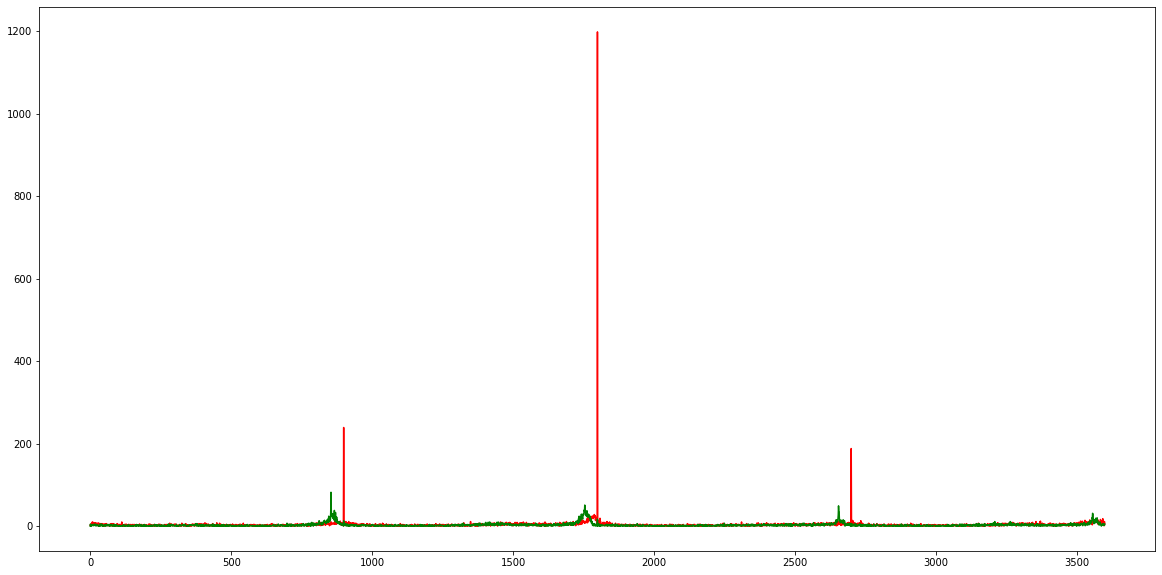

3599
[470.45462453 471.37623188 470.32251521 469.92699884 470.07732407
 470.88274464 469.36382055 469.29484954 469.81052936 465.9421631
 468.09395779 468.66734104 468.33603005 469.41507799 469.31677736
 468.43042725 468.25541126 467.6661858  467.83501586 467.97116494
 466.3292015  466.56368876 467.50619418 468.54176267 467.14310394
 467.79245826 466.32517986 467.25719217 466.59419039 465.89879241
 466.04024145 465.09195402 466.73628268 466.13411832 464.82371519
 466.14293915 465.32883788 465.40791738 464.2876398  464.14793578
 464.57666953 464.11432665 465.16098539 465.11197022 463.56226739
 463.7962221  461.91416309 463.17591533 462.44895625 463.51543739
 461.81280366 462.508      463.36960868 462.55425471 462.4544676
 462.48658676 461.31726106 460.57815174 462.32763045 461.67930445
 461.86548874 460.96495726 461.9985759  460.47465831 458.5539425
 459.15480933 458.95732575 460.66040956 459.4936025  458.96333144
 459.82210855 459.68636364 459.04402158 459.19222033 459.39313085
 457.425

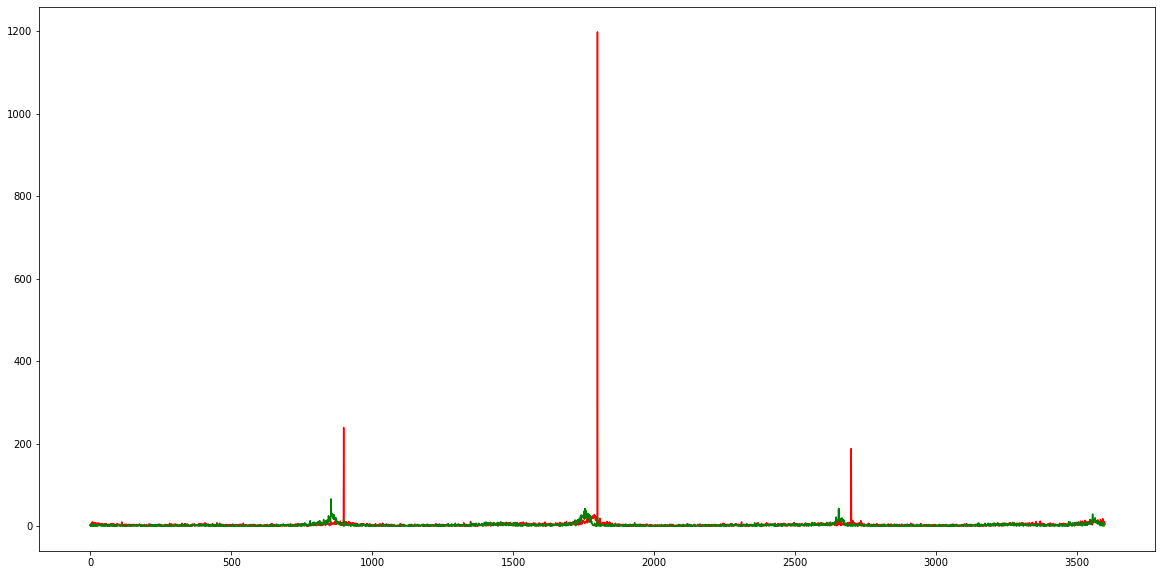

3599
[468.85937953 469.35014493 468.59200232 468.87340672 469.17984361
 467.72669369 468.28654124 465.77199074 467.06653167 465.92972817
 468.71986123 467.44104046 468.03611673 467.42894281 465.75570315
 467.96247113 466.7044733  466.57761108 461.76175368 465.68512111
 465.52003459 466.19423631 464.86862576 466.33611751 465.56752088
 464.83592401 463.26503597 464.44044879 464.95081967 464.61098332
 463.41477436 464.9545977  464.46078713 464.20132108 464.02526558
 463.54247991 463.67977044 464.69420539 461.84714654 462.93922018
 462.80309544 463.70229226 462.08851332 463.28407789 461.99971371
 462.34230109 461.22889843 462.61327231 460.35487561 461.22612922
 462.04172621 461.176      460.34818623 459.35494003 461.8018841
 460.35216895 460.79258203 458.3445522  459.69974337 460.61801596
 459.35565688 460.13732194 460.00825976 458.85820046 458.82436664
 458.48406375 458.32204836 457.46274175 458.29201024 457.02501421
 455.9178744  458.10909091 456.22862823 457.69335605 456.68492762
 456.8

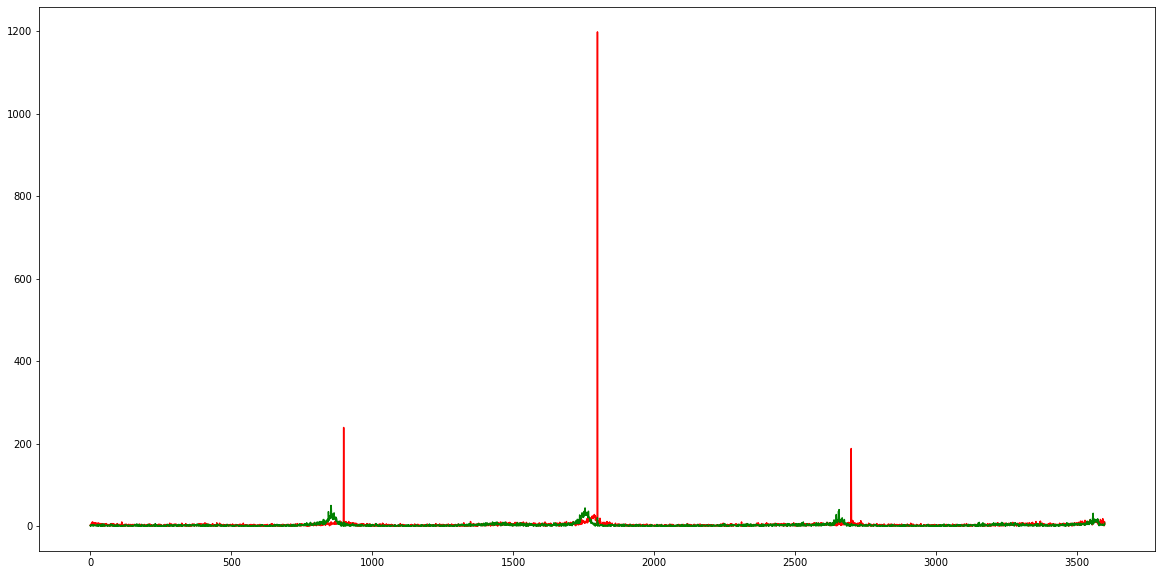

3599
[468.90432009 467.56202899 468.38742394 469.37514484 467.50941211
 469.09814708 468.71316932 466.85271991 466.46803587 468.08964719
 467.72130674 468.2265896  468.00693441 465.56239168 466.42506497
 467.99509238 466.58412698 465.9440277  466.03259302 465.70761246
 466.75554915 466.23112392 466.80870066 465.59389401 466.42384106
 464.71473805 465.36546763 465.2943038  463.95743457 465.44163312
 464.65593561 463.65172414 464.15369147 464.04020678 461.62848119
 463.75660161 462.88550933 463.92742398 463.7960998  463.11983945
 463.56577816 463.45988539 462.96018333 461.76918671 461.98568566
 462.32455638 460.40886981 461.37700229 461.22619388 460.99428245
 461.13260932 460.84885714 460.03456155 460.96944603 459.54695975
 461.21775114 457.35891583 460.13633771 459.86683775 460.46835804
 457.86434882 458.15925926 458.56337226 459.60620729 458.76800455
 458.58622652 456.80654339 458.20193402 456.30594256 457.24189881
 455.90252913 456.728125   458.15166146 455.17859171 456.76837922
 457.

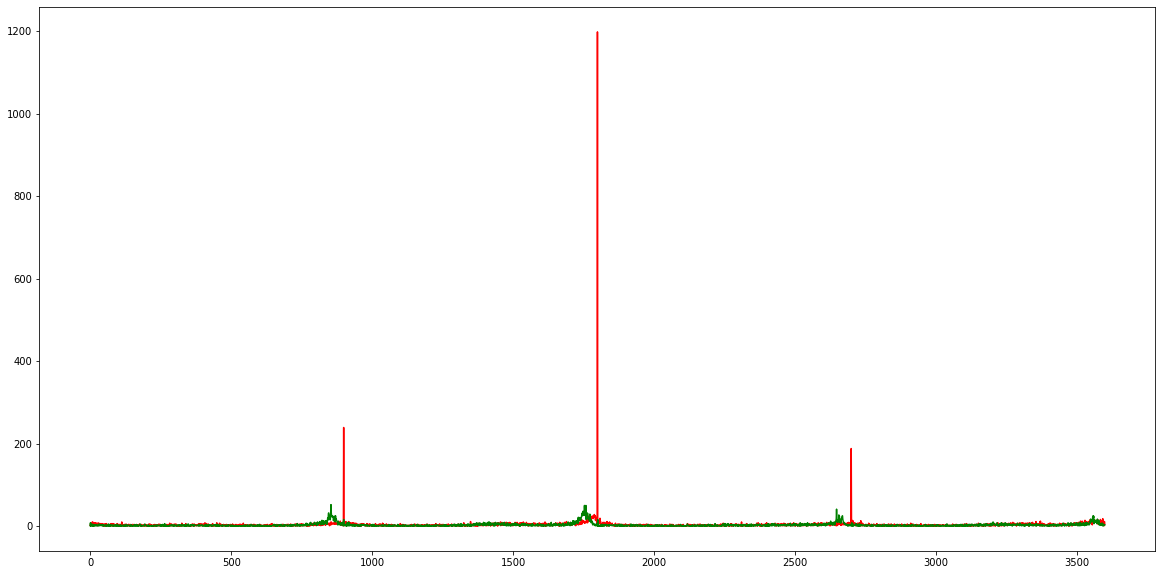

3599
[469.63438678 469.55768116 468.52477543 467.48030127 468.24239791
 468.09988419 468.2934877  466.1880787  468.44315881 467.39242337
 467.76698468 467.52947977 467.10632765 466.920855   465.98325152
 466.35767898 466.49062049 465.89065205 466.98413614 465.67070358
 466.03718651 465.59365994 466.1426102  465.57862903 464.43651022
 464.80771445 465.98273381 464.30264672 465.01236698 463.32518689
 464.51422823 462.10977011 464.88078138 463.25215393 464.05053115
 463.86653272 464.41836442 463.70481928 463.24146831 462.9266055
 462.48237317 462.37851003 462.73617875 462.29438717 461.49642141
 463.1625644  462.70243205 461.41475973 461.21504146 460.36992567
 461.71649043 461.36971429 461.27734933 460.18246716 459.55466743
 460.39783105 460.8767475  459.90501997 460.7459367  459.11659065
 460.53662012 459.97321937 457.92509257 458.95985194 458.79504697
 459.40210586 456.20967283 458.23919226 458.17287461 455.82660603
 458.20005683 458.17926136 454.96535075 456.86428166 456.71529946
 455.3

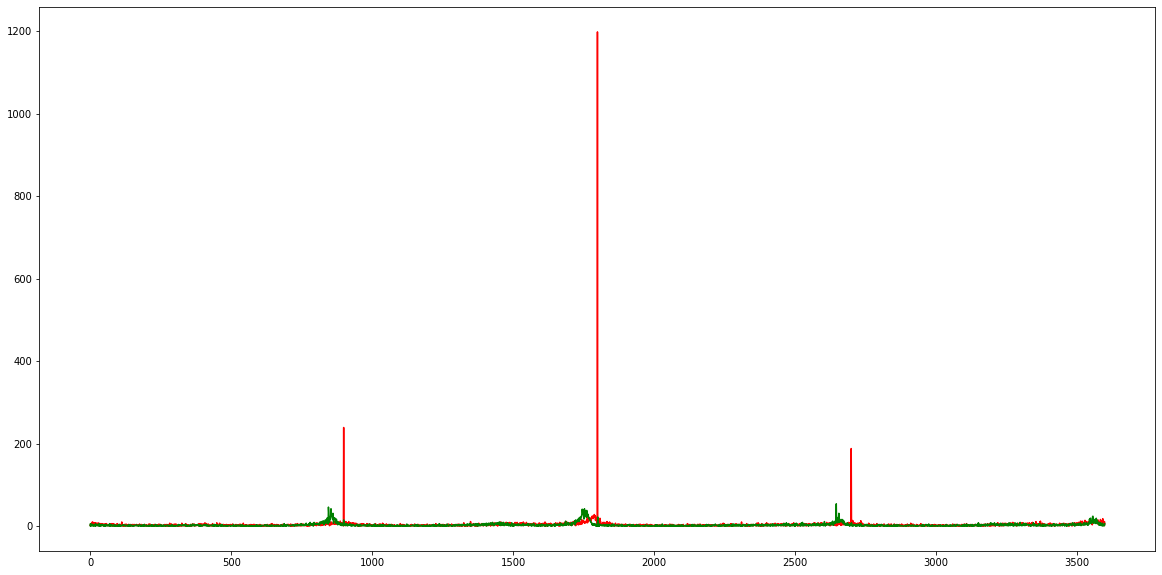

3599
[469.94926066 469.93710145 469.07302231 467.41164542 469.39154359
 468.57035321 467.94124457 467.30121528 467.93838588 468.77472527
 465.98438855 467.7867052  466.87518058 467.92923166 467.59976899
 467.55138568 467.00721501 466.67657242 466.63830401 467.19232987
 465.96569617 466.92939481 464.90780755 464.19815668 466.62482004
 465.01065055 465.42215827 464.94275029 463.49928099 466.05232892
 463.73153205 463.20344828 464.19333525 465.03733487 464.20327304
 463.55166475 463.32883788 463.62449799 461.25007169 462.72649083
 461.1464603  462.33896848 462.4588943  460.96162658 462.40652734
 462.32255295 462.97081545 461.16304348 462.24249357 461.70040023
 461.56759074 461.096      461.85946872 460.1022273  461.01284613
 460.27511416 460.17175464 460.89247005 460.52152837 460.20980616
 459.71872328 459.13760684 457.73141555 460.09567198 456.85055508
 458.13944223 459.18577525 459.5625711  458.44725618 457.83683911
 456.49843706 456.65539773 456.50582221 457.95939807 457.56571104
 455.

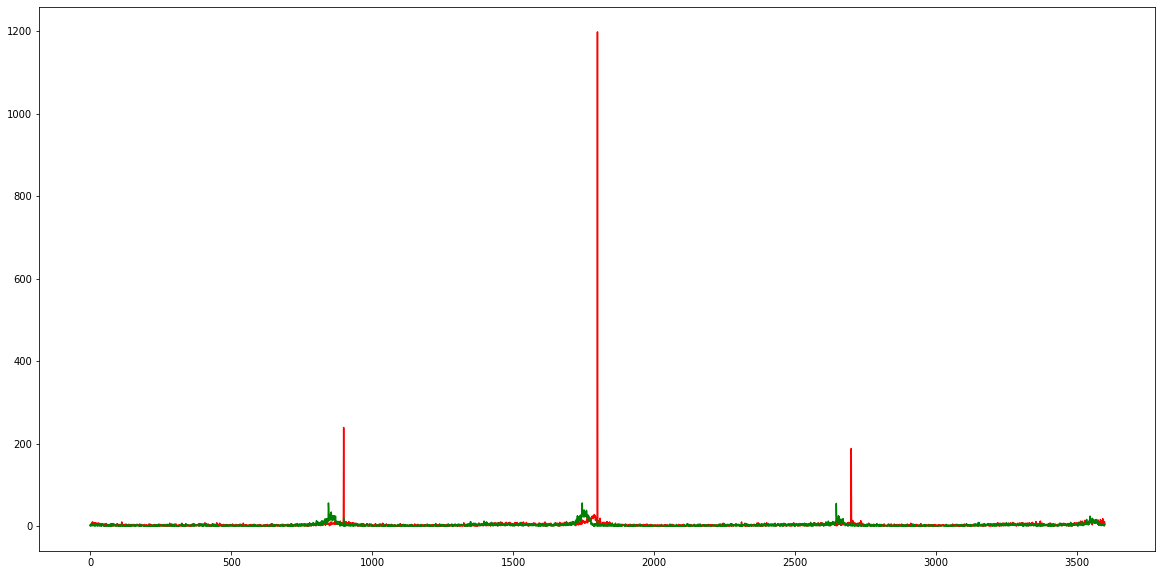

3599
[469.87213685 468.48898551 468.58678644 468.05330243 468.26267014
 468.92906775 469.59826339 468.52893519 468.21955453 468.99942163
 469.12257878 468.06705202 468.10719445 467.73367995 467.22177303
 466.19053118 467.46349206 466.26687825 464.82059417 467.38898501
 467.05505909 467.71210375 464.87265918 466.66301843 466.1330262
 465.73661485 467.12201439 466.34234753 465.34943917 465.99511213
 464.84823225 463.53850575 464.55070382 465.35439403 465.21906403
 465.51205511 463.98020086 464.65261044 463.78548896 463.56020642
 464.23301806 463.40859599 464.38097966 463.92468499 462.87202977
 463.4997138  462.80886981 462.58695652 461.66943094 460.64608348
 461.69134038 462.64314286 461.38103399 460.57567105 462.00742221
 460.37813927 459.3703281  459.85681689 459.16538352 459.75142531
 460.55913366 459.97692308 460.00028482 460.62784738 459.42783945
 459.96385885 459.72972973 457.18828214 458.82769406 458.40591245
 458.27365729 457.24573864 458.89378018 458.19647927 455.49645189
 457.3

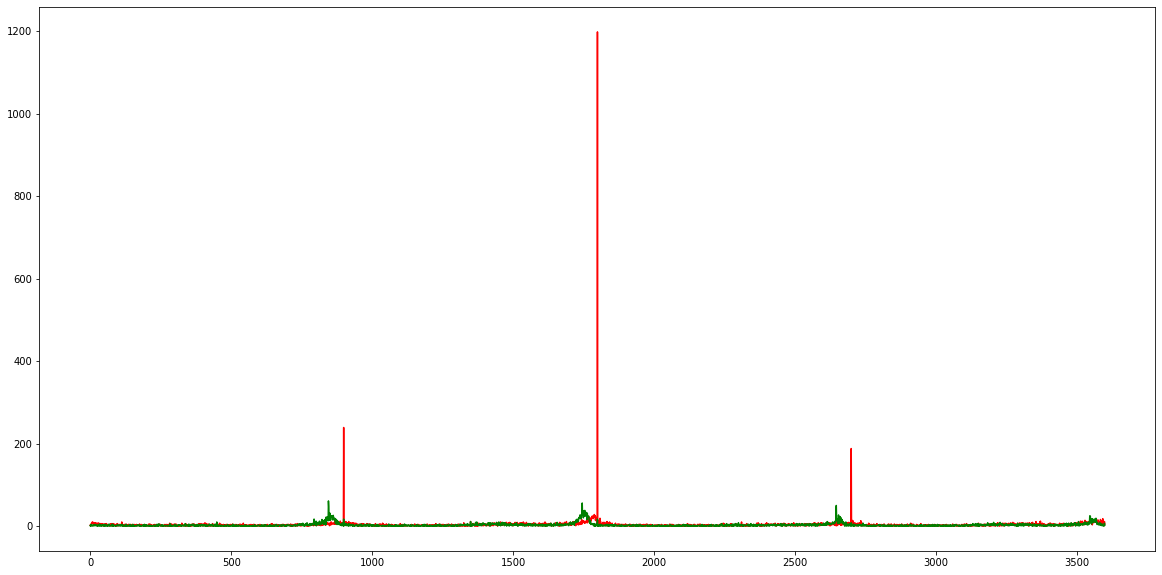

3599
[469.35865468 468.52376812 470.6934222  469.65787949 470.44106574
 469.33352635 468.03125904 469.68778935 468.66734163 469.49855408
 468.43249494 466.37803468 468.54608495 467.79578278 468.98094138
 467.60190531 468.40865801 468.55943451 467.46437843 466.67502884
 465.52320553 466.45216138 468.03111495 466.30587558 465.34321912
 466.25244675 464.97179856 467.07537399 465.08944492 466.01121334
 466.65536074 465.26436782 464.61821316 465.20993682 465.65747918
 465.37686567 464.79454806 462.83017785 462.67249785 463.81336009
 463.91000287 464.09627507 463.900888   463.66494845 462.43315202
 463.07813394 463.58226037 463.73112128 461.71003717 462.29245283
 462.47670763 462.802      461.60811197 462.18732153 462.04624607
 461.85302511 461.13295292 461.33770679 460.82321072 461.75370582
 459.85750926 460.15156695 460.6949587  459.78473804 459.01707942
 460.58338076 458.30896159 460.379124   459.994029   458.90875497
 459.19465757 459.07784091 457.82362965 457.02668938 458.24780017
 458.

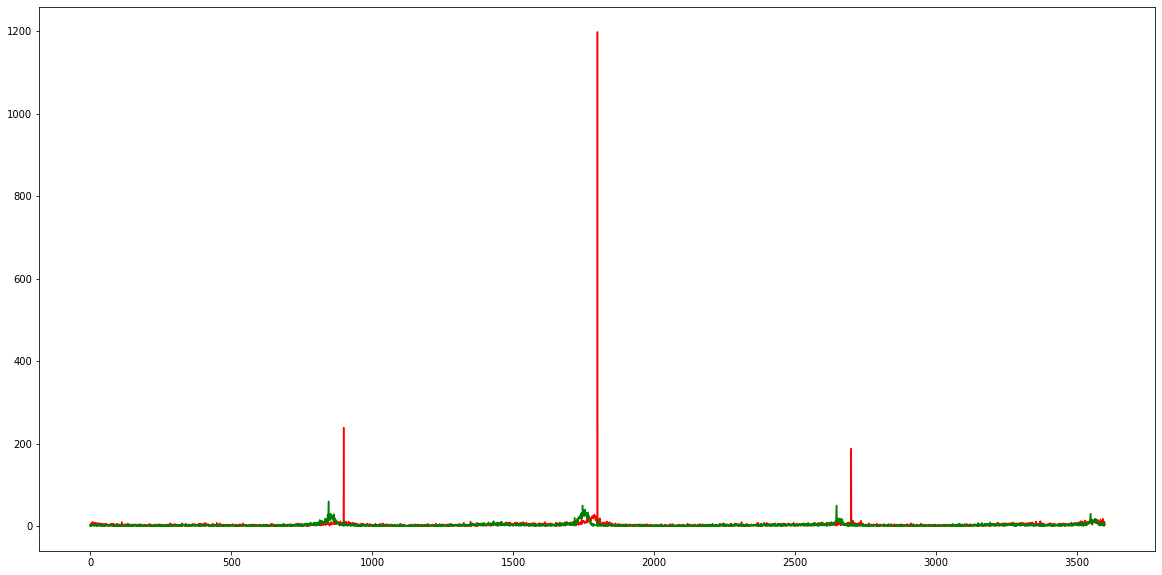

3599
[470.02261525 469.33449275 470.6172124  470.64484357 468.23892268
 468.6328894  469.19305355 469.21730324 468.13682384 468.42105263
 468.69788956 467.47687861 468.10863912 468.8079145  465.87352007
 467.65155889 466.34285714 466.96739758 466.99394289 468.34457901
 467.26434131 467.43371758 466.52722558 467.34907834 467.33198963
 466.791019   465.48776978 466.69533947 466.22375611 465.72915469
 465.3087094  465.23477011 465.35794312 466.22889144 465.51191502
 465.15671642 464.63213773 463.95697074 463.34815027 464.51519495
 463.19690456 464.13782235 464.58092237 462.01660939 462.46578872
 462.44905552 463.37968526 464.00858124 462.43665999 463.7787307
 463.37582166 463.17657143 462.56526707 460.50599657 461.21981159
 462.41752283 461.84764622 462.38049059 461.12603365 461.05929304
 461.55656882 461.69316239 459.3973227  461.03900911 460.20836892
 460.21229368 458.38492176 460.47070535 458.51663349 457.67964753
 458.63483944 459.38323864 459.32916785 459.17234526 457.63837638
 458.1

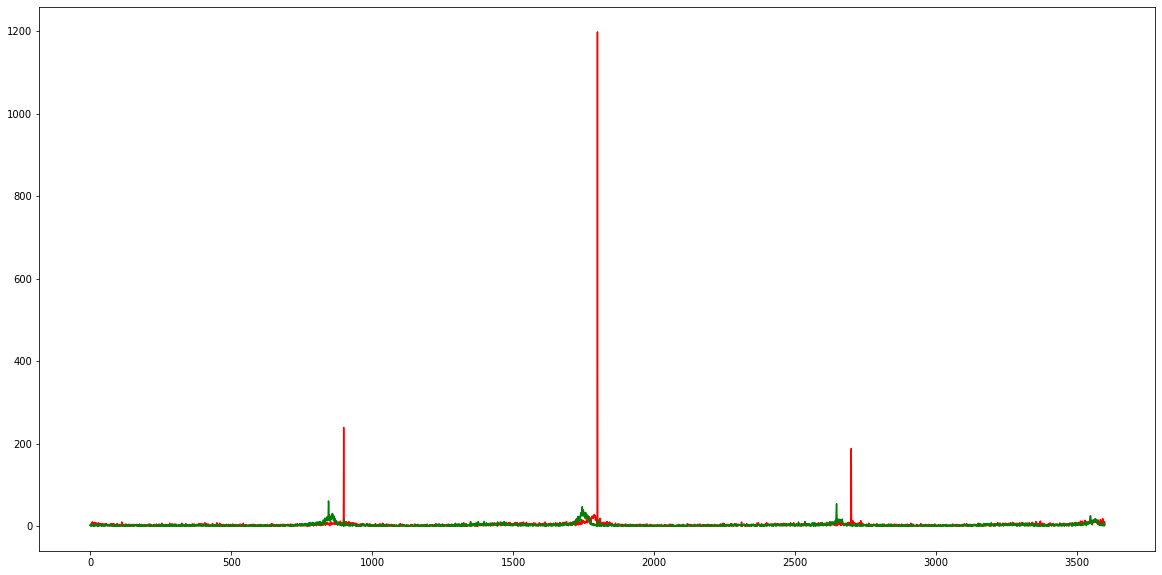

3599
[470.84140331 468.64405797 469.24775427 469.94930475 470.65739936
 469.58627678 469.18060781 469.21730324 469.00231415 468.11422788
 469.95200925 468.01098266 468.63045363 468.30531485 469.33410338
 467.2323903  467.85194805 467.83698788 466.56821459 467.65167243
 467.72038051 466.69279539 467.81331029 467.75806452 466.79873308
 466.82642487 465.92345324 466.96835443 464.24129997 466.74065555
 466.87755102 465.05977011 466.16575697 465.37248708 466.23083549
 465.28616533 464.85451937 463.42139989 464.91023803 463.27494266
 464.87933505 464.01260745 462.96992266 464.71019473 464.48124821
 463.3431597  462.34477825 462.78203661 463.51015156 463.20754717
 462.68048014 462.86771429 460.986004   461.14791548 461.8798173
 462.02511416 461.62339515 461.66428979 460.19304249 461.65877993
 461.6568823  461.56096866 460.85986898 459.24373576 459.99146029
 460.44052362 459.17240398 460.2298066  459.43986352 458.86100057
 458.57630009 458.52698864 456.82561772 457.27569563 458.26114107
 456.0

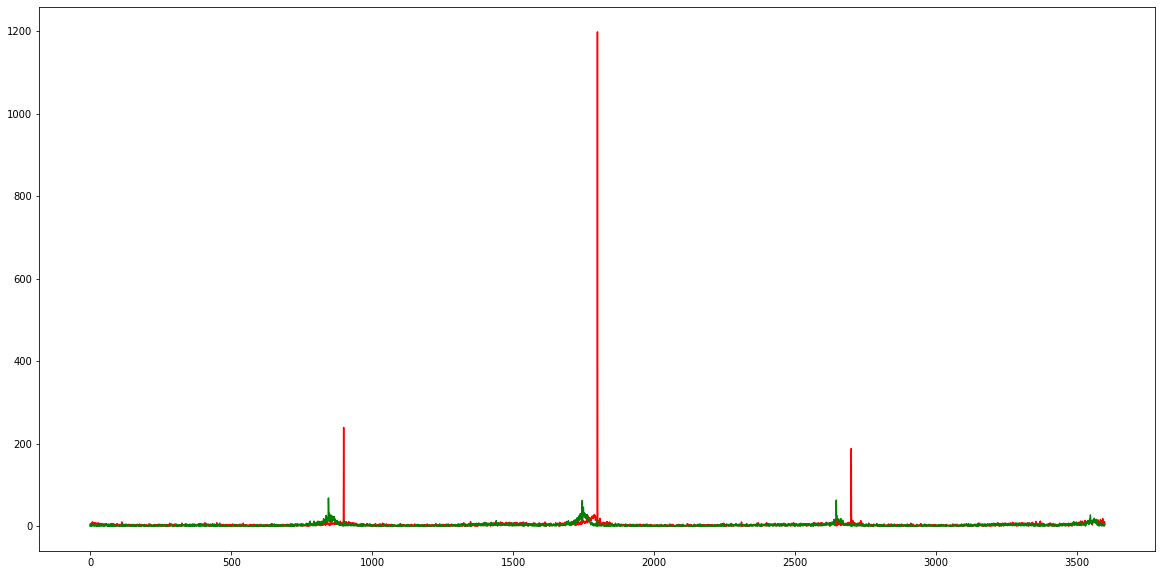

3599
[470.22064366 469.74405797 469.00347725 469.00289687 467.87054735
 467.03068906 469.08654124 468.33738426 466.07347411 468.44389821
 466.55825383 467.79682081 466.25166137 465.64586944 468.33554721
 468.11749423 467.63492063 465.79226774 466.23593885 466.69521338
 467.01498991 466.31556196 466.69230769 465.86549539 463.65159804
 466.04691998 464.6676259  465.59090909 462.98792062 464.24439333
 465.67490658 465.10287356 465.70611893 464.44859276 463.73758254
 464.09845006 463.27030129 463.85025818 464.05334098 463.10493119
 463.45313844 462.40200573 462.6244629  461.85252005 462.51503006
 462.37034917 463.19713877 461.62385584 460.70717758 462.83905089
 460.49557016 461.41457143 461.42245073 462.01998858 460.31687125
 460.80079909 460.26019971 460.75385054 460.18135158 459.60148233
 460.15218011 459.58803419 459.56479635 460.02192483 459.34187304
 459.26465566 458.74395448 458.67263936 458.09695763 459.37379193
 456.08240978 458.41306818 456.41522295 457.39551391 457.69429464
 456.

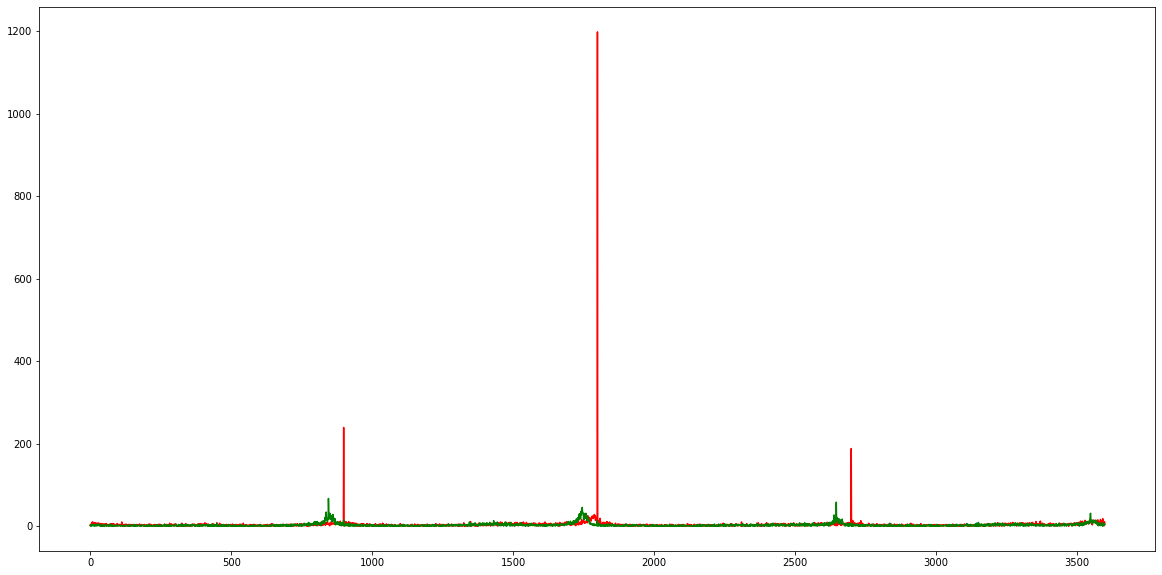

3599
[468.44186721 468.63275362 469.31208345 468.78563152 468.47639734
 467.03532137 468.1910275  468.10243056 467.21261209 467.63504916
 465.98005204 466.87861272 466.71886738 465.53408434 465.53190875
 466.90300231 467.32352092 465.78015003 465.62070955 465.76643599
 465.34620928 464.90288184 466.01901469 466.43173963 465.90613303
 464.01669545 464.52748201 463.49395857 465.25050331 463.46693502
 464.70508767 464.37068966 464.53404194 464.90608845 463.94315245
 464.41704937 463.04332855 464.36288009 463.31459707 463.85120413
 463.14846661 462.59684814 462.79060441 462.01030928 462.31978242
 460.58929594 462.55679542 459.21338673 461.14955676 461.41766724
 462.02715061 461.51571429 461.17737789 459.54511708 459.96517271
 460.95376712 458.8935806  460.40730177 459.10635871 461.0381984
 459.59418638 460.41823362 458.54286528 458.40318907 459.41389126
 459.51052931 459.75277383 459.157281   459.2994029  458.47640705
 458.79482808 458.93579545 457.72678216 456.63401476 455.53874539
 456.6

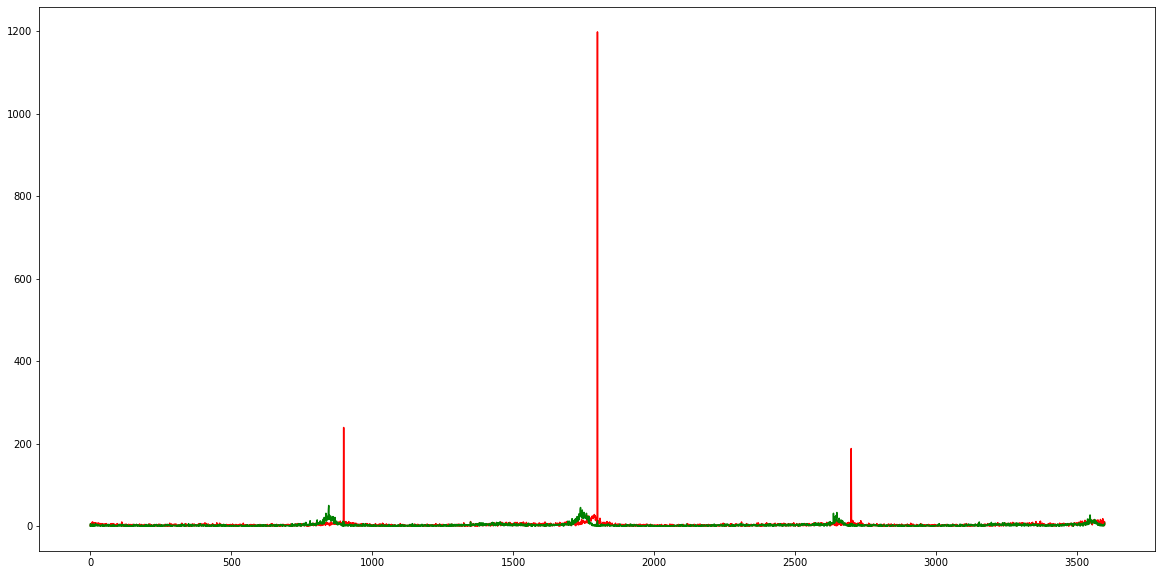

3599
[467.93099449 467.92782609 468.21587946 467.14918888 467.68259485
 466.01534453 467.96410999 465.95949074 467.51576511 467.04569115
 466.29864123 465.79190751 465.09505923 465.9196996  465.71094427
 465.88827945 465.12813853 464.51384882 463.24257283 464.30478662
 465.24762179 465.91585014 465.16767502 465.546947   463.39648719
 464.29965458 462.93438849 462.73532796 463.3442623  464.47642323
 464.43115838 462.39856322 460.5486929  463.0821367  463.35974734
 462.46182549 461.79971306 463.05851979 463.22798968 461.42545872
 461.56749785 461.88653295 461.82669722 460.59564719 460.32808474
 461.06840298 461.94248927 458.57093822 460.91678582 461.3976558
 459.8382395  461.15885714 460.81405313 460.20959452 460.42763346
 460.12100457 459.0128388  459.01711352 459.57085828 459.08979475
 459.11741237 459.18746439 458.99487326 458.56178815 458.04810703
 458.6363119  457.771266   457.44141069 457.42195053 457.14297897
 454.24865018 454.56505682 457.15421755 454.91113004 456.36020437
 456.5

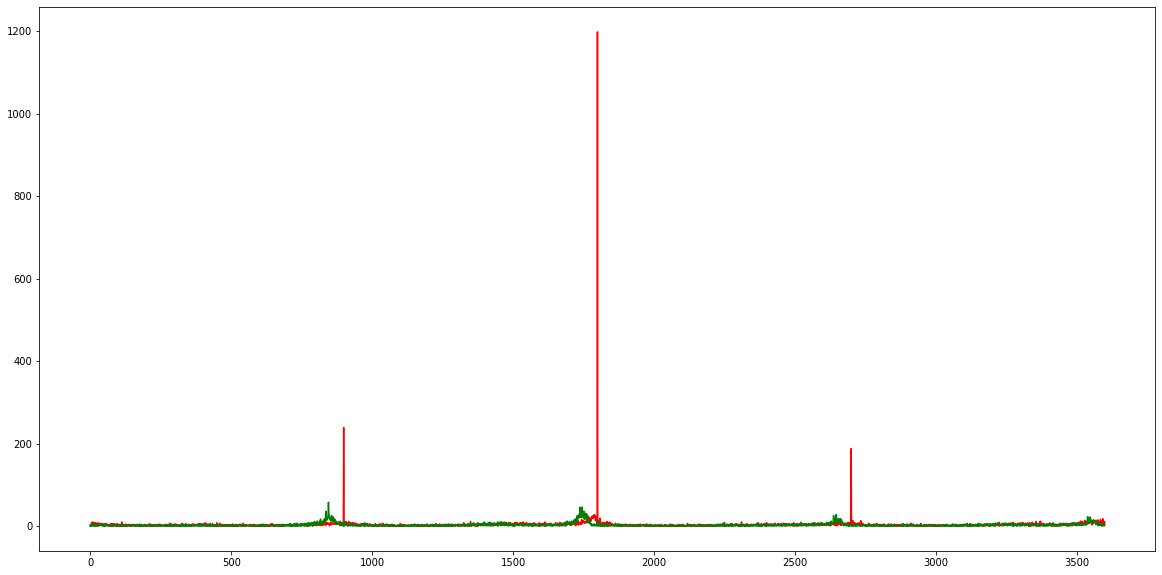

3599
[468.86865758 468.44985507 467.42944074 469.04345307 467.79322328
 468.17544876 468.1536903  468.2583912  466.42811686 467.0037594
 466.89043076 466.92861272 465.9436579  467.63518198 466.66560785
 467.11345266 466.05627706 466.75562608 465.78944332 464.85755479
 464.86883828 465.62824207 465.96024201 465.16503456 465.36942125
 465.67702936 465.46906475 464.2367664  465.41961461 464.39562967
 464.08594424 464.56091954 464.21602988 463.78891442 462.3028998
 462.97244546 463.15494978 462.46758462 463.71121308 462.64879587
 462.79736314 461.58853868 462.12460613 462.24484536 462.43773261
 462.16428163 460.1316166  461.65961098 460.76008007 461.22498571
 461.10774507 461.54457143 461.055984   460.40091376 459.24864402
 458.7836758  459.93380884 459.51369082 460.31137725 459.73289624
 460.10971787 459.18774929 458.46311592 459.33570615 458.68004555
 458.05663062 458.78890469 457.03469852 458.88598237 455.77856737
 457.06479113 457.90880682 456.72791821 457.86286201 455.80386035
 455.10

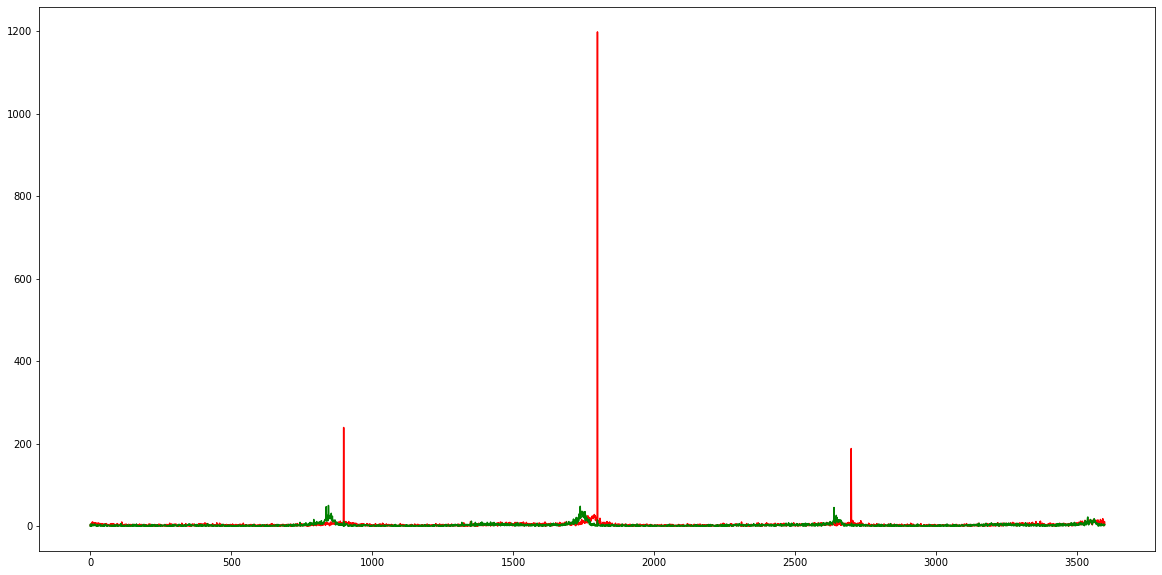

3599
[466.9733256  468.00231884 466.90060852 468.1126883  467.58094411
 466.29183555 466.63068017 466.02488426 467.55308071 463.95835743
 466.51864701 463.41878613 466.71771164 466.8830156  465.15420156
 465.90415704 466.18297258 465.6999423  463.70377848 464.70876586
 465.34909196 465.18876081 463.44079516 464.90178571 464.34609847
 464.48531952 462.44633094 464.54344074 464.33189531 463.15411156
 463.78643288 463.25114943 462.52082735 463.16484779 463.68331898
 463.15040184 463.77761836 462.52409639 462.51276169 462.85321101
 462.07480653 462.43495702 462.3772558  461.91981672 462.25107358
 460.72037779 460.55822604 460.8701373  458.9253646  461.07404231
 460.75192912 460.89971429 459.10082833 460.25928041 459.24835855
 458.79052511 459.82196862 459.64517969 458.85543199 458.16676169
 458.58364206 459.58148148 455.75961265 458.2035877  456.82920581
 458.62834377 457.71692745 457.21587031 457.51606483 457.29363275
 457.22961068 456.89005682 457.48395342 455.85917093 456.79137099
 456.

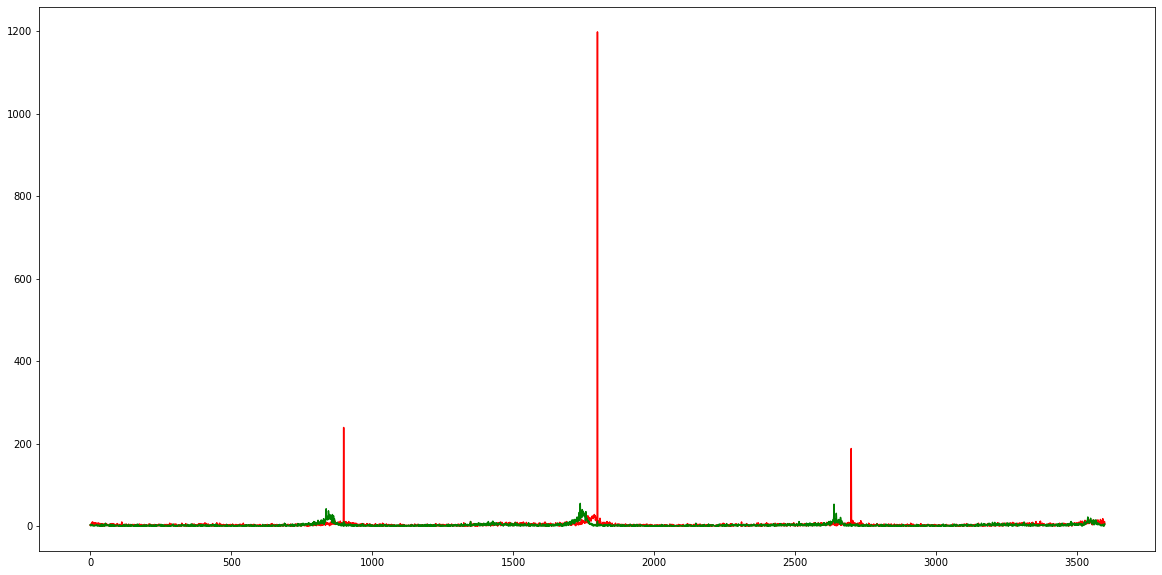

3599
[467.97680487 467.43478261 467.80498406 467.02867903 467.49724877
 467.00839606 466.45151954 467.92621528 467.78102401 464.93319838
 466.80196589 466.49046243 465.78474429 465.11669555 467.08778516
 465.8801963  466.5959596  465.96970571 464.87222382 465.9077278
 463.3194004  464.64495677 465.47335062 464.38162442 465.25856608
 465.34830167 465.28776978 464.52617952 463.31636468 465.18430132
 463.79936763 463.11465517 463.16690606 461.2268811  463.71174275
 462.04448909 462.67144907 463.12277682 462.00229424 462.87586009
 462.00458584 461.38223496 462.4425666  461.82932417 462.30775837
 460.96651402 459.7713877  461.49427918 461.92650844 461.82046884
 460.94998571 460.88371429 461.12425021 459.94374643 460.24379104
 459.59874429 460.20970043 458.87421563 459.05674366 459.1200114
 457.70532915 459.77065527 457.47849615 459.07289294 458.47879305
 457.39129197 458.6745377  458.75312856 457.48421951 458.03240478
 456.20716113 457.228125   457.37716558 456.86428166 457.58444508
 456.07

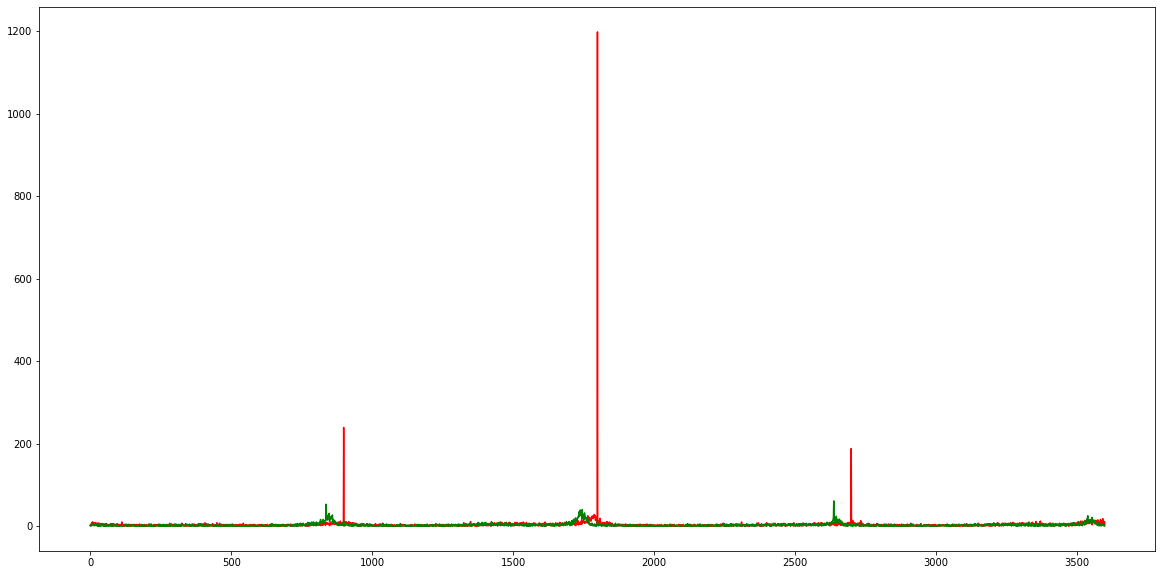

3599
[467.04262105 467.59362319 468.59605911 467.26651217 468.13553432
 467.29154603 467.51114327 467.18489583 465.51402951 466.51937536
 466.99045967 467.33034682 465.55099682 466.56556904 466.50822986
 465.03550808 465.90678211 465.06376226 466.19786559 465.29959631
 463.82530989 465.07377522 465.1630654  465.03427419 464.35387273
 464.71963155 463.49323741 463.82537399 464.03249928 463.02041403
 464.21471687 464.22873563 462.36742315 463.81275129 462.6026414
 463.34931114 462.9446198  463.57716581 462.43590479 461.84575688
 462.91143594 462.36962751 460.04067602 462.87056128 462.51102204
 462.33199771 461.12103004 461.19565217 461.48641693 459.50142939
 460.92626465 460.37       459.79834333 460.25185608 459.51955467
 458.89469178 459.81597718 460.50541928 459.13031081 459.38968073
 458.0416073  460.09088319 457.79122757 457.8046697  458.61457444
 458.07199772 458.4970128  458.20847554 456.99346034 456.88743604
 456.66297244 456.45369318 457.00965635 457.5278251  456.96082884
 455.1

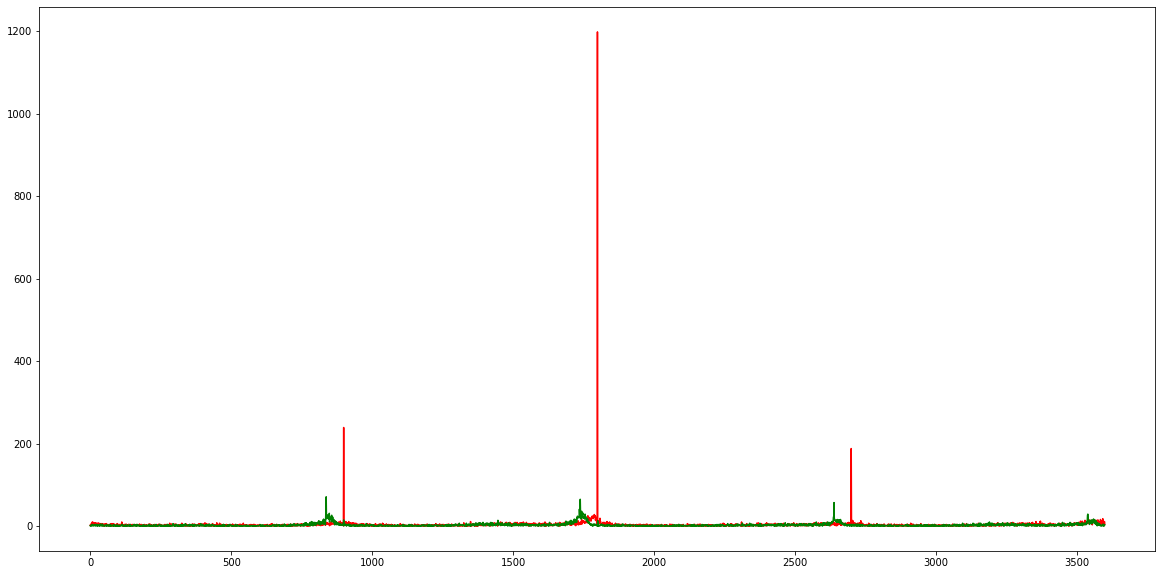

3599
[468.51464193 469.05855072 468.78383077 468.31807648 469.2319722
 468.41285466 468.79247467 468.7109375  468.61816604 466.71775593
 468.47094536 468.18901734 468.18433979 467.08983247 467.67427086
 465.34439954 466.35151515 466.37564916 466.26103259 466.16291811
 466.35370424 465.92391931 465.05502737 466.50864055 465.84192341
 464.33649971 464.60748201 464.2764672  464.22375611 464.22627947
 464.82667433 464.16063218 465.42976156 463.68523837 464.95521102
 464.98851894 463.16413199 464.2811245  461.980499   462.84202982
 463.46231012 463.50143266 461.68032082 463.50887743 461.71600344
 461.62707499 462.47296137 461.61784897 461.9542465  461.13321898
 461.33466705 461.96057143 460.274493   461.09565962 460.95946332
 460.51170091 460.72724679 458.64004564 460.5489022  459.69868871
 457.42205757 457.12592593 460.16434064 459.28986333 459.04155992
 458.79567445 459.66315789 458.06086462 459.67586011 459.19016487
 458.3847684  457.74119318 458.49502982 457.85547984 457.50894124
 455.2

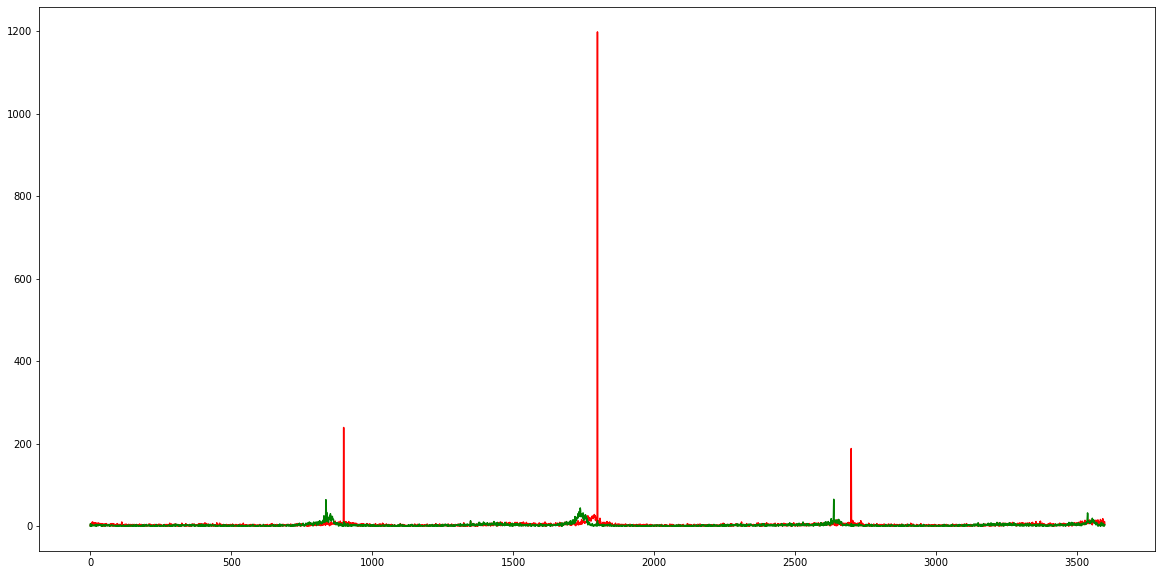

3599
[467.91127863 467.98956522 468.58446827 469.01158749 468.70605271
 468.7999421  467.24370478 468.0703125  468.08938386 468.09861191
 467.14686326 465.74566474 467.9641722  467.60456384 467.05486572
 466.52713626 466.62077922 466.42613964 466.17969426 466.03575548
 465.2724128  466.84005764 466.40535869 466.4406682  465.70169882
 464.65457686 466.22158273 463.44965478 463.63042853 464.65698677
 463.25582064 464.12672414 464.5268601  464.91412981 465.06948033
 463.45637199 464.62525108 464.06339644 462.46659019 463.4059633
 462.37919175 462.04584527 462.02721283 461.85280641 462.53678786
 462.64882656 462.60715308 461.55062929 462.42922505 461.43996569
 462.23578165 461.44914286 461.74578692 460.98143918 461.69140737
 460.75770548 460.22853067 460.11466058 460.52865697 460.34122007
 459.86292391 460.52507123 458.8823697  459.5606492  458.54227156
 458.55492316 459.63755334 459.25796359 459.22519192 457.84025014
 457.08581984 458.12727273 458.19142289 458.26235094 457.54073233
 457.7

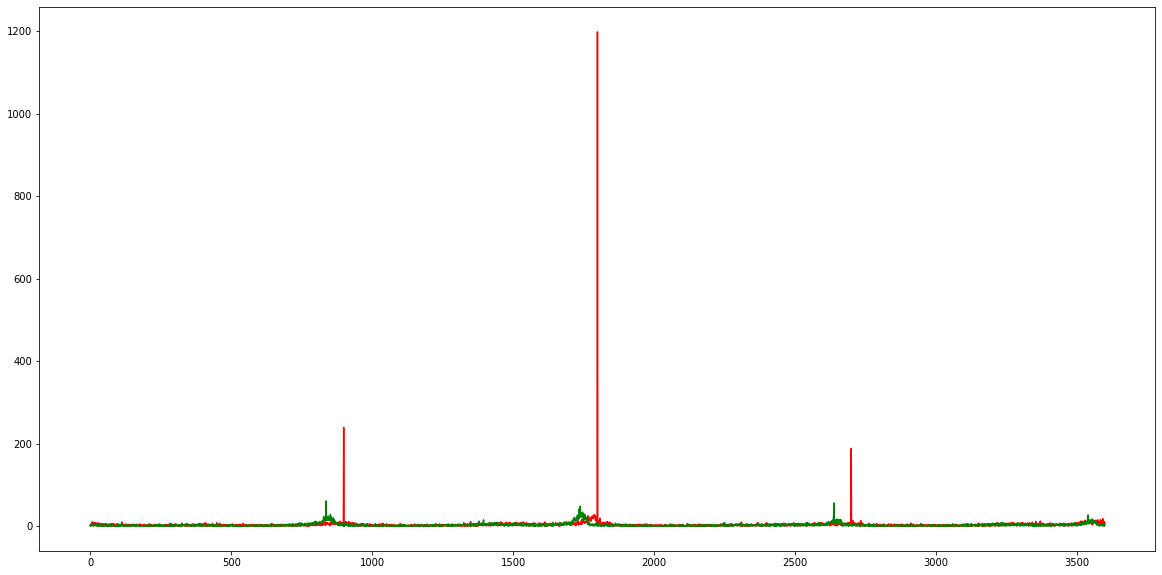

3599
[466.9947811  467.71449275 467.92292089 467.81778679 467.68259485
 467.81383903 467.63125904 467.40827546 466.53196413 466.69577791
 467.53194565 466.17919075 466.9222768  465.6542461  466.57002599
 466.06466513 464.92323232 466.05683785 464.40409576 465.30478662
 463.76823292 465.18674352 464.83808701 462.90380184 464.7736827
 465.02619459 464.18158273 463.81012658 463.84728214 463.84617596
 464.23914918 462.41695402 463.01436369 462.59735784 463.0129199
 463.49885189 463.61463415 461.89529547 461.38801262 461.92345183
 462.93751791 461.24297994 461.22085362 462.34822451 461.61551675
 459.32140813 460.83519313 461.42648741 459.66771518 460.36992567
 460.77364961 459.12857143 460.39617252 460.17818389 460.1427348
 458.55393836 460.19343795 459.68054763 459.09295694 459.21778791
 456.74294671 458.83105413 459.12560524 457.62699317 458.51124395
 457.66192373 458.03157895 457.69681456 457.76997441 458.03354179
 455.90991759 456.77784091 455.23402442 457.57836457 456.04513199
 454.939

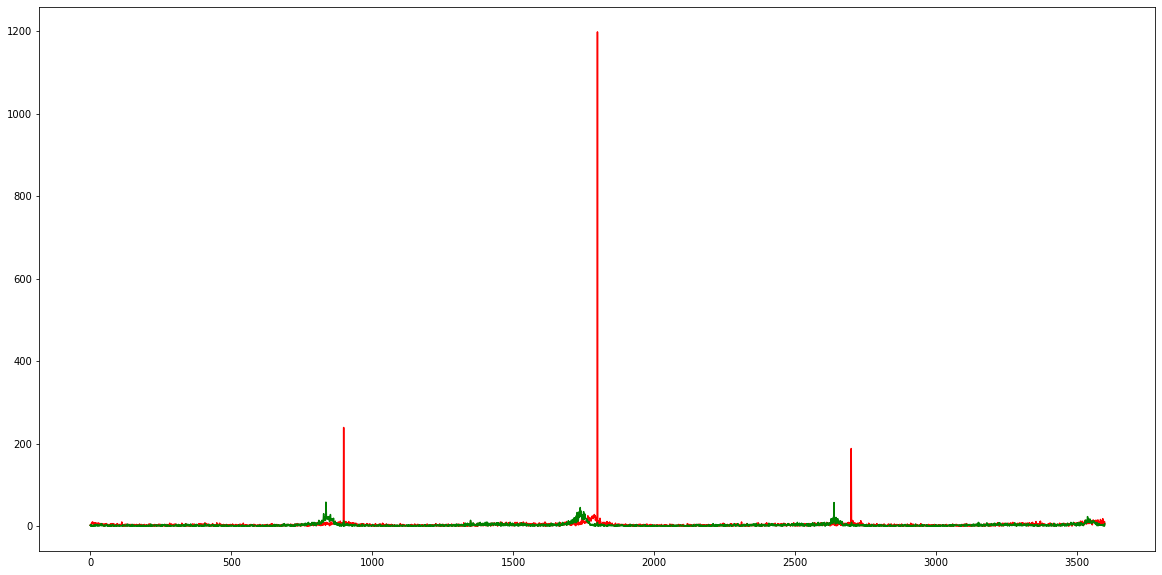

3599
[467.67149899 467.42985507 467.4508838  467.67584009 467.24500434
 466.94614939 467.14384949 465.8046875  465.82701765 465.64459225
 466.30442324 465.03063584 466.63565444 466.77094165 464.34363269
 466.24336028 465.94112554 463.91748413 465.30400923 465.66089965
 465.7160565  463.99682997 464.59723423 464.58150922 464.59746617
 463.8080023  464.27539568 462.49136939 463.82283578 463.52300173
 462.76401265 462.93563218 463.65728239 463.21280873 461.17714614
 463.65958668 462.61291248 463.22059667 460.79925437 462.84116972
 461.94095729 462.66418338 461.70094529 462.27749141 461.35929001
 460.244419   459.95765379 461.38443936 461.2450672  459.50800457
 461.4224064  460.78571429 460.05284205 460.88577955 459.66428775
 460.27511416 460.16519258 459.19880205 459.10208155 459.63968073
 458.67569108 457.41452991 457.892908   457.14208428 457.91317962
 457.89385316 456.35391181 456.8486917  456.8143304  457.57987493
 457.24637681 457.21306818 456.79750071 457.11868257 455.27448198
 455.

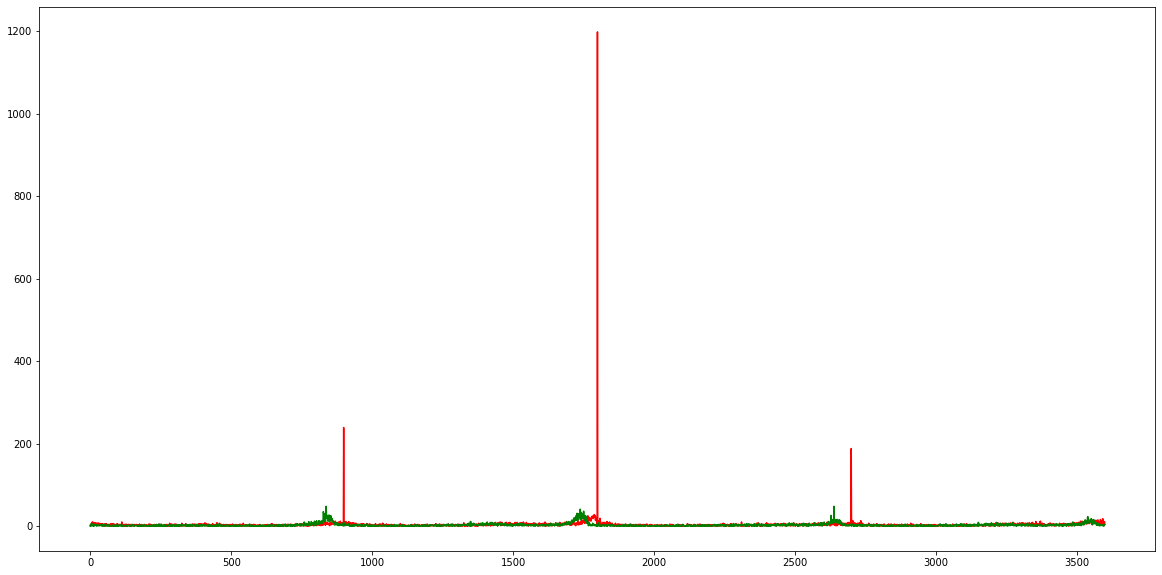

3599
[467.55639316 466.8315942  467.30252101 466.26622248 467.36258326
 467.54313839 465.44833575 466.04861111 465.38559445 465.57171776
 465.62648164 465.55115607 466.1366657  464.51675332 466.17990182
 462.74422633 465.02741703 464.17570687 465.51889241 464.60957324
 464.50331508 465.10115274 463.21261884 463.16935484 463.8678376
 464.07628094 462.64719424 463.27272727 462.63359218 464.08913168
 464.1816614  461.1183908  460.20396438 461.28001149 462.485501
 461.73995408 462.16126255 460.18043603 461.40034414 462.24512615
 461.28288908 461.46532951 461.72386136 461.70761741 461.62696822
 461.4885518  461.27439199 459.83695652 459.74949957 460.46283591
 460.05687339 458.58628571 459.0734076  459.85265563 457.75620896
 460.04880137 458.43338088 458.97917855 459.34759053 456.91419612
 457.74522656 458.48717949 457.11848476 458.36731207 457.84884714
 457.6955037  457.4972973  457.66808874 457.40744953 457.41870381
 456.44728616 457.06590909 456.07355865 457.10732538 456.8592109
 454.8984

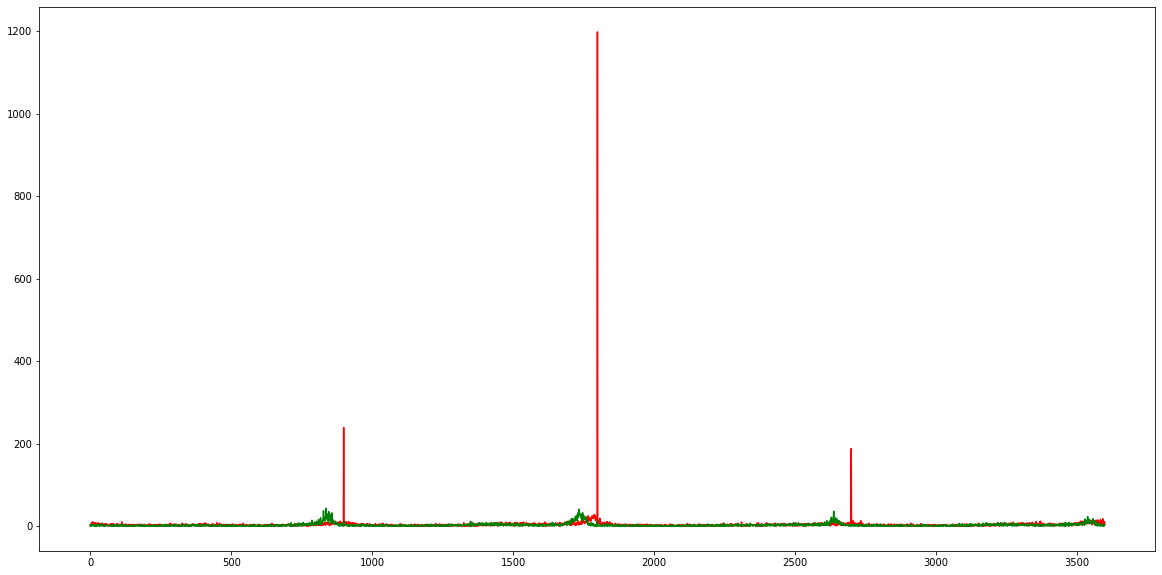

3599
[466.72948681 465.88463768 467.31556071 466.44495944 465.80162178
 466.98928778 466.54848046 464.22106481 465.79751229 463.17611336
 465.61491761 465.56387283 465.63565444 464.04534951 465.46000578
 464.6232679  464.81038961 463.88545874 463.95615806 464.66695502
 463.81176131 464.74466859 463.21809277 463.6500576  463.48977829
 464.38082902 462.48345324 462.56386651 463.51797527 462.94364577
 462.26990515 463.22155172 461.9232979  463.38627226 462.833764
 462.98593571 461.87173601 461.84681583 461.75164898 461.83944954
 461.25938664 460.72722063 461.8034947  460.96420389 460.15144575
 460.23182599 459.82432046 459.55806636 460.13211324 459.6292167
 460.29465562 460.05257143 459.54527278 460.06167904 457.60919212
 458.71832192 458.06676177 458.49001711 459.14627887 457.413626
 458.94585352 456.68461538 457.89917402 457.36161731 457.9185881
 457.13602732 457.84978663 457.44539249 455.83025306 457.50227402
 455.55782893 457.22045455 455.55296791 456.12805224 456.41243259
 454.718785

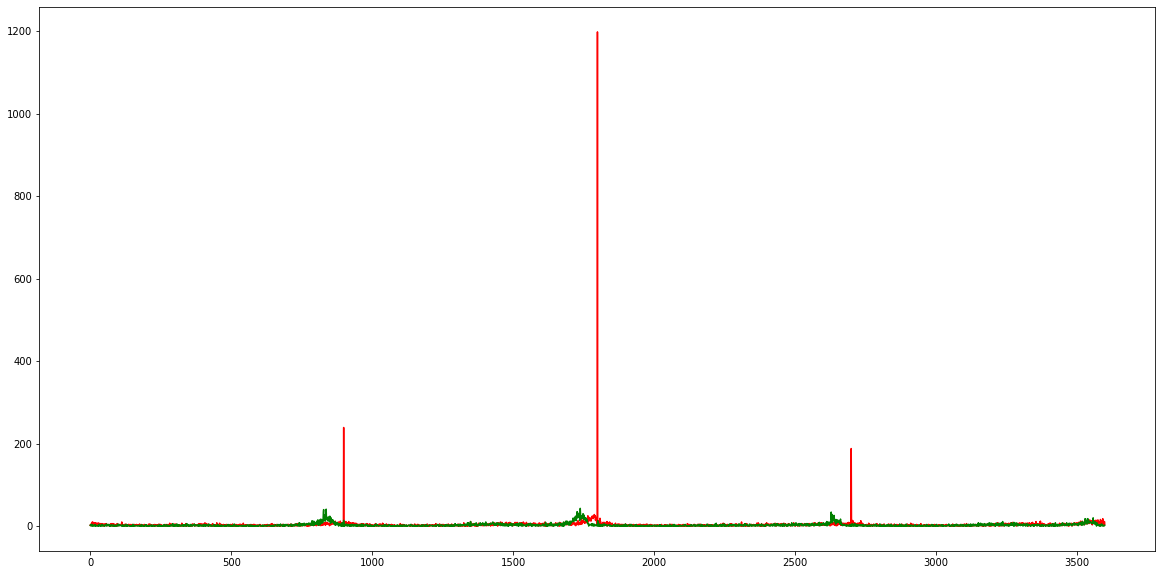

3599
[467.31197449 466.01797101 466.27644161 466.75724218 466.54155807
 466.1418645  466.63531114 466.07378472 465.50997975 465.95488722
 466.12286788 465.82254335 463.71193297 465.04534951 463.3182212
 465.21535797 464.55584416 463.5813618  463.78915489 463.09544406
 463.64456616 464.60576369 464.63065399 464.3531106  463.2433055
 462.39234312 463.16805755 463.5198504  462.73597929 462.12190914
 460.49439494 462.5566092  463.27405918 460.96323952 461.55211025
 461.6793915  460.60430416 461.29288583 460.54574132 461.38044725
 460.64287762 460.89169054 461.69951303 460.69387171 460.84397366
 461.58557527 459.24320458 458.98426773 460.70832142 459.43682104
 460.32723635 456.61257143 460.10482719 459.7698458  458.50157008
 459.45633562 459.55891583 456.72247576 459.01967494 458.10689852
 458.12111713 457.66410256 458.55283395 455.53018223 458.04953032
 457.65054069 457.59630156 457.11831627 455.77111174 456.1523593
 456.74793976 455.296875   455.8250497  456.39551391 455.62361624
 455.629

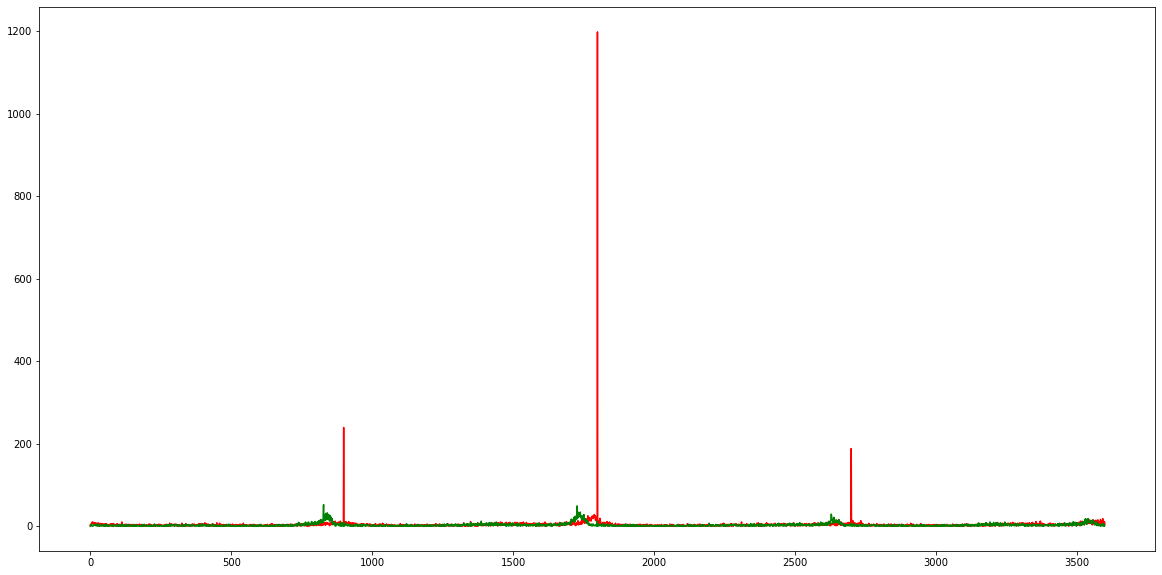

3599
[466.9747753  466.83826087 466.41350333 467.48406721 465.31450912
 467.037348   466.08306802 465.82320602 466.39716517 466.29988433
 464.43509685 466.00260116 466.22623519 465.96967071 463.46347098
 463.71045035 464.98239538 463.83525678 464.11335449 463.44261822
 464.97520899 464.99654179 464.84874676 464.05846774 461.57212784
 463.59268854 464.18503597 463.03998849 463.82858786 463.23634273
 461.59413625 460.78247126 463.42257972 463.11717404 461.01751364
 461.42680827 461.89583931 461.88984509 462.41324921 461.74111239
 461.98939524 461.62120344 461.81380693 459.1406071  461.51302605
 458.37406983 459.52246066 460.41275744 460.8781813  458.08490566
 460.56387539 459.492      460.28648957 458.20702456 459.89380531
 457.0696347  459.66562054 457.72646891 459.01368691 458.58124287
 458.49558279 458.09373219 458.54770721 458.70301822 458.44577284
 457.20005692 456.40312945 457.85409556 456.71964743 456.71688459
 457.00341006 456.43693182 455.222096   455.39721749 455.82372978
 456.

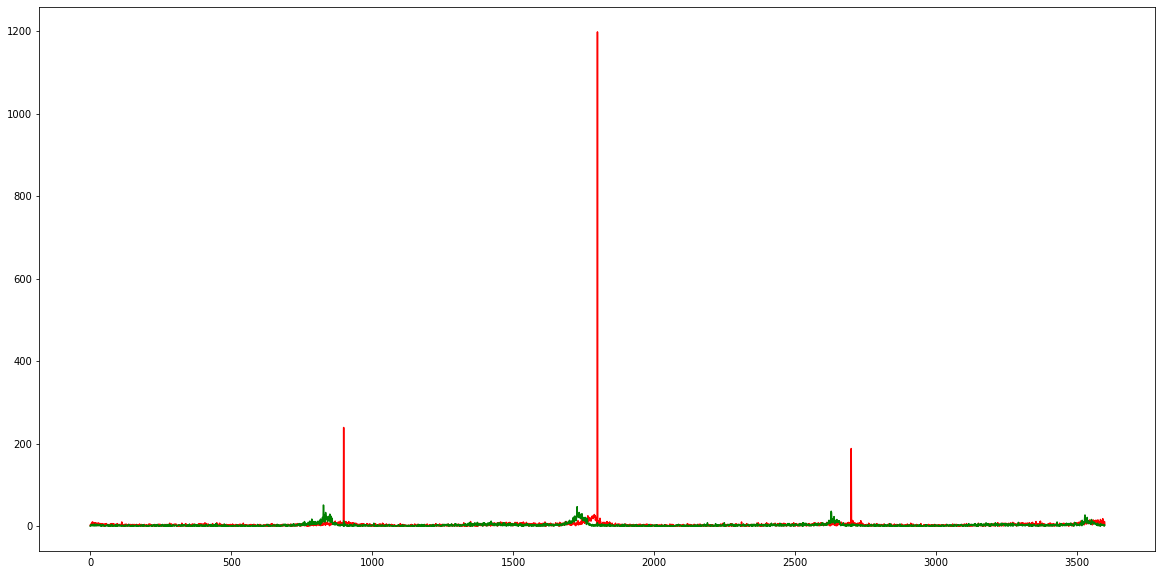

3599
[467.85590026 466.48086957 466.42770212 467.52983778 466.49898639
 466.74116966 467.12648336 466.01591435 466.74312988 466.3880856
 464.26192541 465.43930636 465.37734759 465.51993068 464.18914236
 464.73498845 463.83982684 463.1203116  465.26651284 464.70530565
 464.95762468 463.5426513  463.20685681 464.14660138 462.94126116
 464.47179044 463.47194245 463.38089758 461.66695427 463.36285221
 462.95458465 462.7362069  462.62108589 462.23808156 462.61958082
 462.11882893 462.19053085 462.24497992 461.34614282 462.32396789
 462.29578676 461.1765043  461.93239759 461.02405498 459.47180074
 460.39210074 461.34792561 461.29433638 459.61738633 460.04945683
 459.9857102  459.91571429 459.26021137 459.89377499 456.43134456
 459.83533105 458.54807418 459.63006275 457.81779299 458.39737742
 458.82730123 456.52792023 458.46026773 458.74231207 458.75320239
 456.95304496 457.29644381 456.87684869 457.36167188 457.30471859
 456.8496732  457.48238636 456.15478557 456.32226008 455.13795061
 456.0

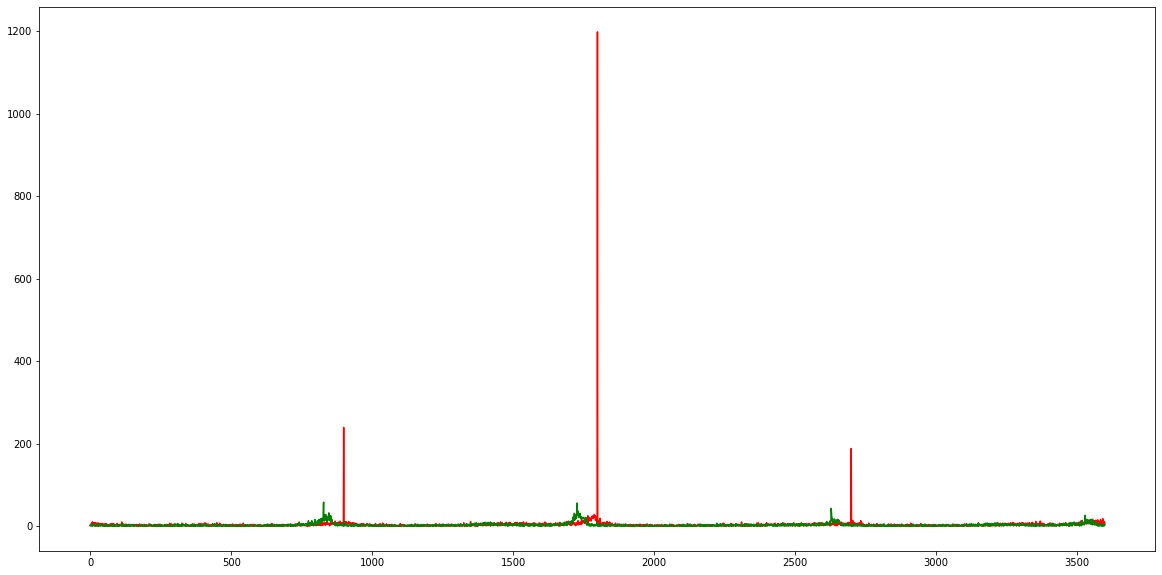

3599
[468.03885184 468.59217391 468.4137931  467.55648899 467.30726904
 467.19455704 467.90448625 465.9994213  466.27654035 467.0708502
 465.60132986 465.90115607 466.39121641 466.30704795 465.49841178
 465.50028868 466.48398268 465.52798615 466.55235074 465.89129181
 465.61833381 464.79164265 465.50821089 465.73646313 464.96170458
 464.85693725 465.06503597 465.04919448 464.8038539  464.3852789
 464.01897097 464.66666667 461.83855214 464.32050546 462.57938559
 464.03788749 462.94548063 463.62105565 462.74075136 463.15080275
 462.20435655 462.5234957  462.0810656  461.69616266 461.93071858
 460.79793932 461.25951359 461.91704805 459.74978553 459.93967982
 460.23435267 460.38571429 458.71522422 460.57852656 459.66143306
 460.62699772 459.19714693 460.51853965 457.74508127 459.78249715
 459.78056426 459.15527066 458.32184563 457.91571754 459.27981782
 457.22481503 457.97098151 458.65017065 458.86437305 458.19300739
 458.46035806 456.52329545 457.21527975 456.69335605 454.91768379
 455.55

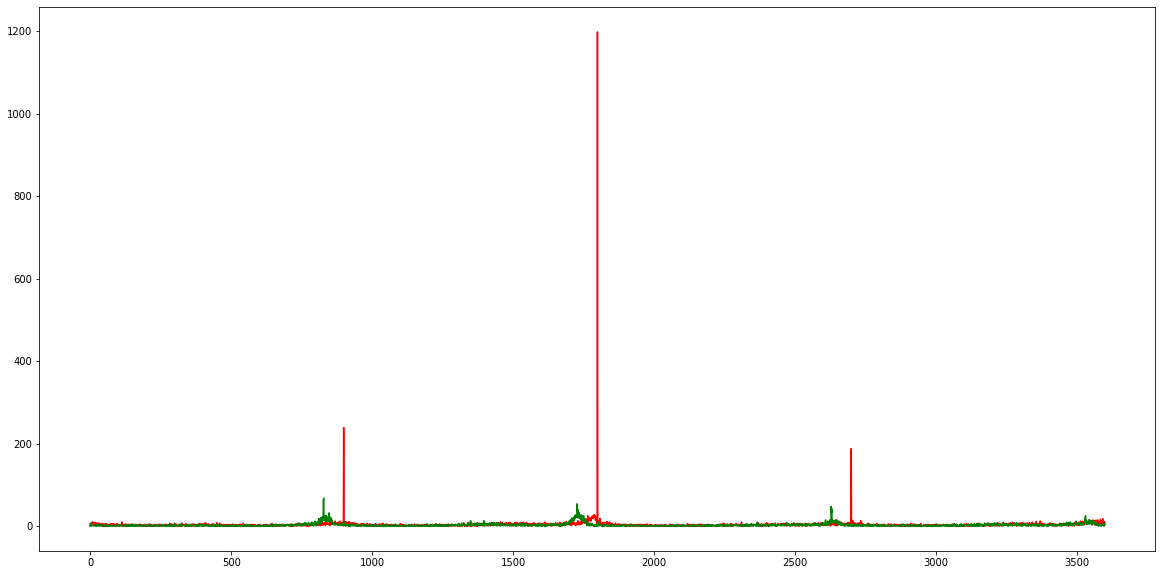

3599
[466.9399826  467.10956522 468.05273834 468.00811124 467.83840139
 468.06079907 466.70622287 468.1322338  467.36245299 467.12550607
 466.46545244 466.61040462 465.50621208 467.44165222 466.81721051
 466.31957275 466.43088023 466.38690133 466.27458898 465.89504037
 465.60824445 466.15677233 465.31748776 465.43951613 465.34206738
 464.56505469 464.89064748 464.79746835 464.11274087 464.49309948
 462.51537798 461.82988506 464.79833381 464.1415853  463.21332185
 464.49081515 462.96814921 462.55880666 463.47892171 463.11553899
 462.53396389 463.28280802 461.8203953  461.90693013 462.8648726
 463.18374356 460.91187411 462.25371854 461.66542751 462.20268725
 460.21577594 460.16342857 461.2010854  462.11222159 460.45332572
 461.44149543 460.76833096 458.70992584 459.70459082 458.91733181
 459.28469649 459.95584046 460.37225862 459.67539863 460.24338173
 457.98349459 458.52688478 459.657281   459.48080751 456.79135873
 458.26513214 458.81534091 456.86623118 457.06615559 457.59778598
 457.6

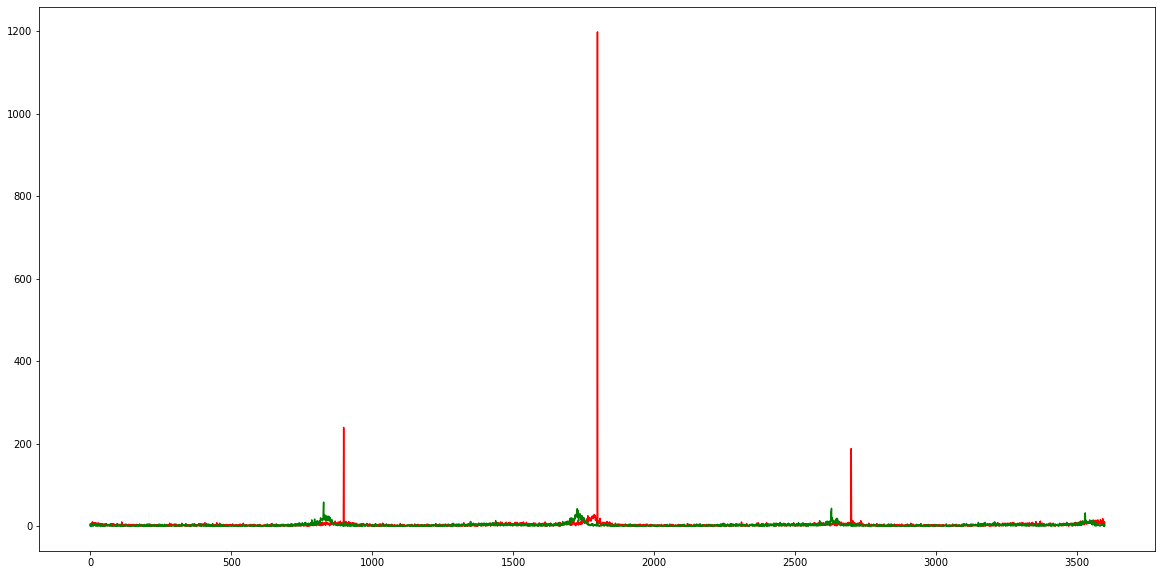

3599
[467.89881125 466.39304348 466.78875688 467.04895713 466.11728931
 467.35726694 465.6804631  465.0462963  467.195256   466.26547137
 466.160451   465.5982659  465.60820572 466.28047371 464.5524112
 465.67061201 464.81673882 462.89122908 465.50216325 465.07497116
 464.98183915 465.00605187 464.34946701 464.0999424  464.41376332
 463.67098446 462.17755396 463.09637514 462.53034225 463.8746406
 464.21126761 463.53706897 463.78741741 461.32021827 459.75968992
 462.19115959 461.27087518 463.19162364 461.64496702 460.05705275
 461.71539123 462.51575931 460.18647952 462.15979381 461.33237904
 461.50658271 461.02660944 460.90732265 459.46639977 460.37021155
 460.35667334 460.23371429 459.97800628 458.69531696 459.67170996
 459.45119863 459.98573466 459.153166   459.72654691 458.39053592
 459.82502137 458.697151   459.33409285 459.2297836  458.01138628
 458.01906659 457.25092461 457.66268487 457.5123685  457.1827743
 457.79283887 456.85142045 456.03976143 456.20102215 456.48367868
 457.036

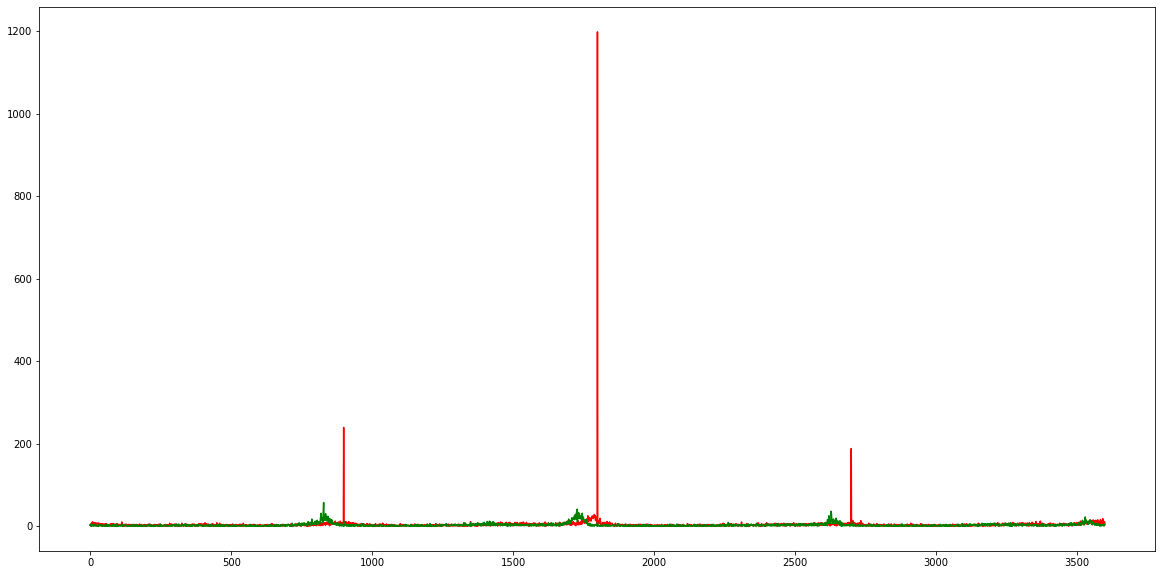

3599
[466.57755871 466.17188406 466.67139959 465.53563152 463.93194324
 466.67486972 465.58523878 466.0625     465.04223315 465.93319838
 465.2575889  465.34595376 464.75989598 464.30011554 465.46433728
 464.85710162 462.62914863 463.28736295 463.68445342 464.62860438
 464.22629    464.07896254 463.26937482 463.91186636 463.62222862
 463.39896373 462.56719424 462.80840046 462.67932125 461.14951121
 462.46996263 463.15028736 462.39270325 462.68322803 462.41659489
 461.84270953 460.74318508 462.13339071 459.23831374 460.92488532
 461.22098022 461.28051576 459.98997422 460.70446735 460.73947896
 459.55523755 459.43919886 460.3652746  460.17414927 460.0077187
 459.45127179 459.36057143 459.83547558 457.54968589 458.96403083
 458.23601598 459.03223966 458.92498574 458.14827488 457.14766249
 458.62325449 458.10598291 458.4776417  457.44419134 456.64930259
 456.46186682 456.80312945 455.88737201 456.4936025  457.10375213
 456.21767548 457.01164773 455.53223516 456.44889267 454.27987511
 453.9

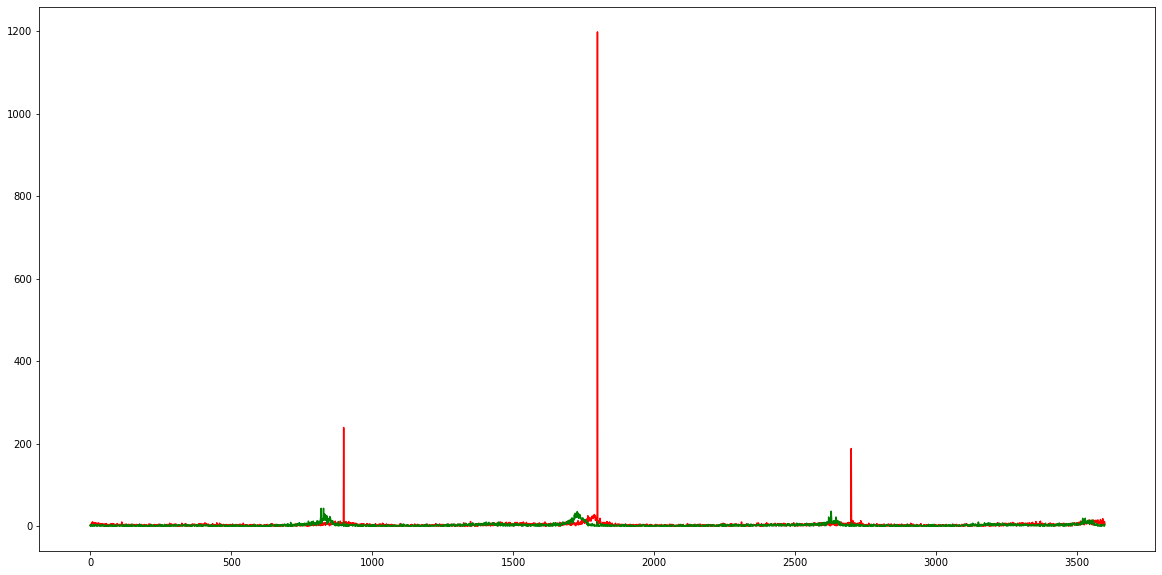

3599
[464.18817048 466.7857971  466.3216459  466.50260718 465.55603823
 466.64562826 465.53429812 465.4849537  464.98553659 464.61740891
 465.36108702 465.48757225 465.16122508 465.27036395 463.83078256
 464.4295612  463.998557   464.47576457 463.47130084 464.52739331
 463.54050159 463.66253602 462.92768655 462.82488479 462.67175353
 462.5826137  462.5542446  462.99367089 461.80069025 463.11845888
 461.55791894 460.48477011 462.46940534 461.73463527 461.48607522
 462.2456946  461.92539455 461.24125072 461.36822484 461.61611239
 460.84551447 460.37077364 460.21999427 460.35423826 460.64242771
 459.14367487 459.96738197 460.63758581 458.5175865  458.57690109
 458.09231209 456.96057143 459.34818623 459.18103941 457.98144448
 458.62157534 458.91726106 456.73816315 458.97804391 457.67360319
 456.21402109 457.49031339 456.67786955 455.72351936 457.04269855
 457.07854297 455.34566145 456.88594994 456.15951095 457.08527572
 456.21312873 456.07585227 455.88383982 456.47302669 454.64604031
 454.

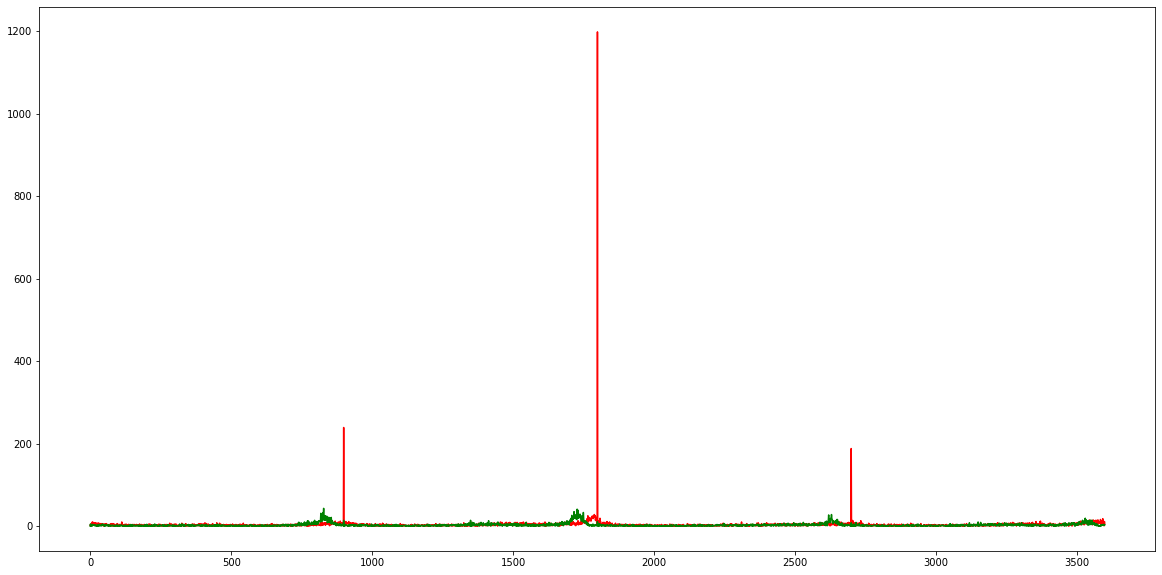

3599
[466.57291969 466.70753623 466.11388003 465.4325029  465.54908775
 466.1328894  465.49898698 466.22135417 465.74515476 466.00780798
 465.05550737 463.98410405 465.46518347 465.22328134 464.72884782
 464.77627021 463.97200577 464.6102135  464.81338333 463.80622837
 462.31594119 464.36282421 462.24200519 464.14573733 463.29484595
 463.66378814 460.55683453 462.70281933 462.43514524 462.51552616
 461.07789595 461.6933908  462.97558173 461.69356692 461.52914154
 461.2152698  462.01664275 461.64974182 461.2345856  461.18090596
 461.56004586 460.41604585 461.10340877 460.86168385 459.82708274
 460.25615341 457.99742489 459.81636156 460.12839577 459.7481418
 459.66076022 459.49       457.9842902  458.67818389 458.16985441
 459.269121   457.81426534 458.63747861 458.93156544 457.31556442
 457.89883158 458.66068376 457.57647394 457.54384966 456.67292912
 457.1445646  456.84238976 457.08162685 457.1026443  456.54576464
 456.19352089 453.08295455 454.14484521 455.38756388 456.47346012
 455.7

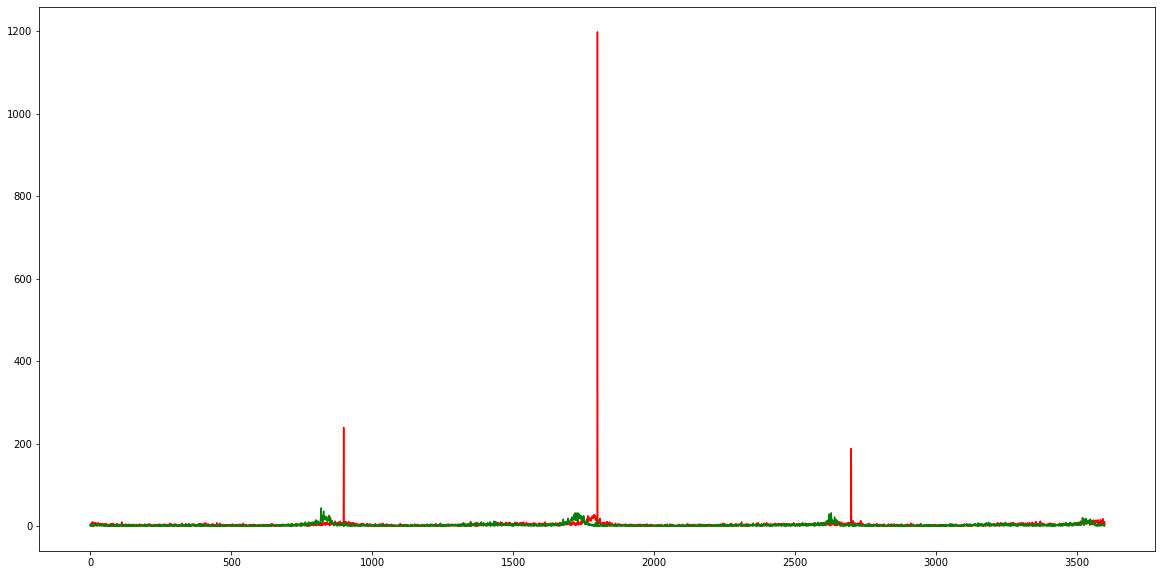

3599
[465.68077704 465.99797101 465.65082585 465.38035921 465.21488561
 464.58830342 465.37771346 464.41637731 465.68180503 464.41497976
 464.28678809 465.15144509 465.08205721 465.24350087 464.07969968
 462.94948037 464.41471861 464.49105597 464.39630805 463.26124567
 463.20466993 463.07377522 463.7147796  463.78312212 463.27958537
 461.76453656 461.8952518  463.05379747 463.02991084 460.22052904
 462.57229089 462.55862069 462.29847745 461.97960942 461.7427505
 461.01894374 459.31018651 461.17297762 461.27903642 459.95986239
 460.08541129 461.42120344 460.29217989 460.75171821 460.24076725
 459.40068689 458.88640916 459.32494279 459.76665713 459.53973699
 459.13689626 457.96028571 457.25649814 459.58480868 457.577505
 457.39126712 457.60199715 458.04563605 457.67550613 457.69184721
 456.73154745 457.85612536 456.44545713 457.54840547 457.25761457
 457.49971542 456.66429587 456.14220705 455.13193062 456.14127345
 455.91219096 454.83380682 456.15677364 454.27342419 452.91512915
 454.675

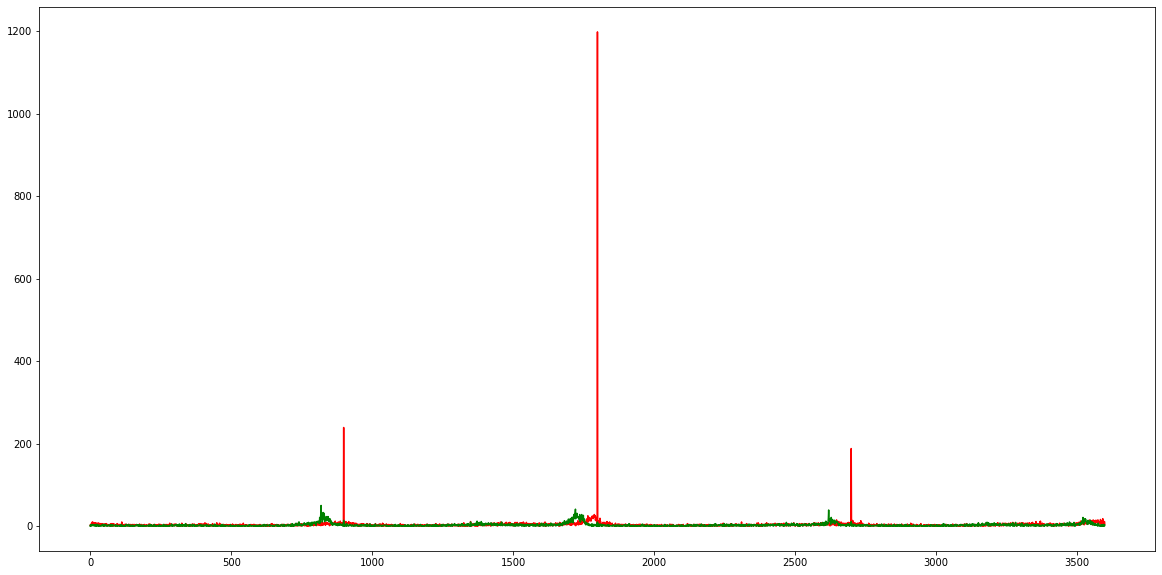

3599
[466.45984343 466.2057971  466.5691104  465.37977984 465.35099913
 465.7507238  465.09290883 464.1947338  464.62568701 465.19317525
 465.24284475 464.67890173 465.12597515 465.25303293 464.03696217
 463.45438799 462.85598846 464.13098673 463.6357081  462.6115917
 464.00490055 463.03832853 462.90521464 463.5593318  463.3455226
 463.15889465 462.66446043 461.10903337 462.71239574 462.20040253
 460.99511354 462.43678161 461.67308245 462.33256749 461.15991961
 461.49540758 461.02955524 461.0134825  456.95927732 460.92001147
 460.68644311 459.44097421 459.62646806 459.50859107 460.16060693
 459.09845449 460.13505007 459.84839817 458.82299114 459.95111492
 457.85767362 460.01857143 457.05027135 458.23329526 458.72709106
 458.35131279 456.53466476 458.36879635 457.36469917 457.88825542
 458.10715304 457.9031339  457.24295073 456.54384966 457.57216055
 457.70631759 457.44523471 455.39192264 456.38953654 455.8291643
 455.97925547 456.83693182 454.94632207 455.84497445 456.00823162
 455.907

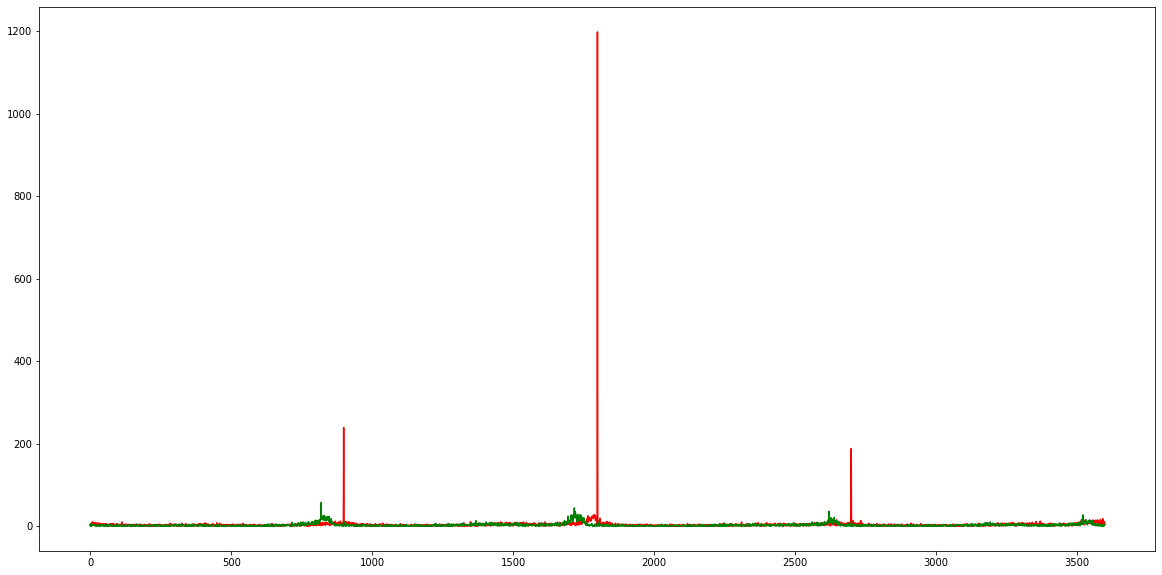

3599
[466.00695854 465.49652174 463.96899449 466.67323291 464.81841877
 466.00260567 465.34124457 466.27228009 466.08678045 465.64343551
 465.06649321 464.91763006 464.65039006 465.26169844 465.0034652
 463.53579677 463.95440115 464.62088863 463.85232189 463.64273356
 464.39694436 464.04870317 463.28810141 462.54118664 462.69565217
 463.01352907 463.6057554  461.19390104 462.86367558 462.74209316
 461.96665709 462.34310345 462.37747774 462.01033889 460.98765432
 460.37227325 460.55208034 460.60154905 461.81789504 461.04386468
 460.17311551 460.92005731 461.07963334 459.98052692 460.23475522
 460.88093875 459.76480687 459.99656751 459.87703746 458.83590623
 457.26721921 459.88571429 459.74578692 459.6033695  459.58835284
 458.80194064 458.71526391 456.83285796 458.35757057 456.20039909
 457.84639498 457.51082621 454.81913985 457.21156036 457.49017933
 457.96044394 456.78805121 456.84414107 455.83394939 456.37805571
 456.5751634  455.51761364 455.83584209 453.65559341 454.2949191
 456.40

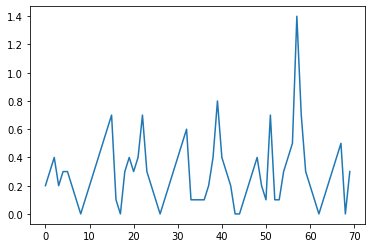

20.300000000000075


In [199]:
import time

base_file = 'figures/' + str(99) + '.jpg'
base_file = 'figures/office.jpg'
img_orig = cv2.imread(base_file)
(h, w) = img_orig.shape[:2]
center = (w / 2, h / 2)
img_base = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)

bins = 3600
thres = 50
# The translation angles
angle_limits = 15

error = np.array([])

plt.figure(figsize=(20, 10))
for rotate_angle in np.arange(1, 8, 0.1):
    print("-" * 50)
    M = cv2.getRotationMatrix2D(center, rotate_angle, 1)
    img_rotate = cv2.warpAffine(img_base, M, (w, h))
    start = time.time()

    hist_base = HoG_cal(img_base, mag_thres= thres, bin_num= bins)
    hist_rotate = HoG_cal(img_rotate, mag_thres= thres, bin_num= bins)
    plt.figure(figsize=(20, 10))
    plt.plot(hist_base, 'r')
    plt.plot(hist_rotate, 'g')
    plt.show()
    # Using HoG to calculate the angle
    angle = angle_HoG(hist_base, hist_rotate, limits = angle_limits)
    ## Correlation function finding the orientation
#     correlation = np.correlate(hist_base, hist_rotate, mode= 'same')  
#     angle_thres = np.max(correlation) * 0.95
#     results = np.nonzero(correlation > angle_thres)
#     print(results)
#     print(np.argmax(correlation))
#     angle = (np.argmax(correlation) + 1) * 360 / bins - 180
    
    error = np.append(error, abs(angle - rotate_angle))
    
    print("The HoG estimation when ({0:.1f}) is {1:.2f} in {2:.4f}s" \
        .format(rotate_angle ,angle, time.time() - start))
    
print(error.shape)
plt.plot(error)
plt.show()
print(np.sum(error))